# Codigo base

In [1]:
source("utils.r")

# Cargar datos

In [2]:
# Example of how to call the function
url <- "https://github.com/mbarrena/tesis/blob/main/data/Data%20trimestral%201950%20a%202023%20con%201%20DUMMY%20CORTA%20outliers%20(2q%203q%201989%201q1990)%20.xlsx?raw=true"
temp_file <- tempfile(fileext = ".xlsx")
GET(url, write_disk(temp_file, overwrite = TRUE))

# Read the `data` from the Excel file
df_trimestral_crudo <- read_excel(temp_file)

Response [https://raw.githubusercontent.com/mbarrena/tesis/refs/heads/main/data/Data%20trimestral%201950%20a%202023%20con%201%20DUMMY%20CORTA%20outliers%20(2q%203q%201989%201q1990)%20.xlsx]
  Date: 2025-03-29 21:35
  Status: 200
  Content-Type: application/octet-stream
  Size: 56.7 kB
<ON DISK>  /var/folders/59/6k0yx0n916gg1mdb04zs42rm0000gn/T//RtmpxHxvb5/filec375401222e.xlsxNULL

In [3]:
# Select specific columns and rows from df_trimestral_crudo
df_Arg <- df_trimestral_crudo |> 
  dplyr::slice(37:dplyr::n()) |>  # Equivalent to iloc[36:] (1-based index in R)
  dplyr::select(año, trimestre, ipc_ajust, E, Ebc, pbird, impp_usa, Psoja_USA, Pmaíz_USA, Ptrigo_USA, TOTfmi, D1) |>  # nolint
  as.data.frame()  # Convert to data frame (if needed)

# Rename "ipc_ajust" to "ipc"
df_Arg <- renameColumnOfDataframe(df_Arg, "ipc_ajust", "ipc")

# Display first 6 rows
print(head(df_Arg))

# Display first 65 rows
print(head(df_Arg, 65))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
    año trimestre          ipc            E          Ebc  pbird impp_usa
1  1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2  1959      2ºTr 3.074744e-11 8.556667e-12 8.317

In [4]:
# Copy df_Arg to df_ERPT_Arg1
df_ERPT_Arg1 <- df_Arg

# Display first rows
print(head(df_ERPT_Arg1))

# Apply logarithm to specific columns
df_ERPT_Arg1 <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg1) # nolint: line_length_linter.

# Display transformed dataframe
print(head(df_ERPT_Arg1))
print(tail(df_ERPT_Arg1))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.5127

In [5]:
# Create df_ERPT_Arg as a copy of df_Arg
df_ERPT_Arg <- df_Arg

# Display first rows
print(head(df_ERPT_Arg))

# Apply logarithm transformation
df_ERPT_Arg <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display transformed dataframe
print(head(df_ERPT_Arg))

# Apply differencing transformation
df_ERPT_Arg <- makeDiffColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display first and last rows
print(head(df_ERPT_Arg))
print(tail(df_ERPT_Arg, 90))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.5127

# Regresiones

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends
1 TRUE        NA     FALSE     FALSE      0          1      259 
  column_names            endog
1 impp_usa, E, ipc, pbird 4

Lags for Shock: impp_usa

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   1   2   1   1   1   2   1   1   1

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   1   2   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   1   2   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   1   2   1   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse  response horizon irf_value   lower_bound upper_bound
1  impp_usa E         1      -1.21088588 -1.2108859  -1.21088588
2  impp_usa E         2      -1.29853769 -2.0211892  -0.57588622
3  impp_usa E         3      -0.63807782 -1.3399822   0.06382652
4  impp_usa E         4      -1.10668513 -2.0352373  -0.17813291
5  impp_usa E         5      -0.09080255 -1.3202960   1.13869087
6  impp_usa E         6       0.84377879 -0.5693755   2.25693311
7  impp_usa E         7       0.11135822 -1.3717863   1.59450275
8  impp_usa E         8       1.85394874  0.6051674   3.10273010
9  impp_usa E         9       1.80126141  0.3513675   3.25115529
10 impp_usa E        10       0.69009600 -0.1241491   1.50434106
11 impp_usa E        11       1.51596971  0.1512863   2.88065312

impulse response horizon irf_value  lower_bound upper_bound
78 ipc     E         1       0.0000000  0.00000000  0.00000000
79 ipc     E         2      -0.3258261 -0.58235341 -0.06929885
80 ipc     E         3       0.2922717  0.08188573  0.50265771
81 ipc     E         4       0.2361735 -0.15107790  0.62342490
82 ipc     E         5       0.1303985 -0.13619300  0.39698992
83 ipc     E         6      -0.2333101 -0.51866335  0.05204323
84 ipc     E         7       0.2101999 -0.17983094  0.60023074
85 ipc     E         8       0.3209033 -0.08373124  0.72553793
86 ipc     E         9       0.2380420 -0.05747929  0.53356335
87 ipc     E        10       0.1142586 -0.21900689  0.44752411
88 ipc     E        11       0.3433137  0.05598226  0.63064507

impulse response horizon irf_value   lower_bound upper_bound
111 pbird   E         1       0.00000000  0.0000000  0.0000000  
112 pbird   E         2      -0.39449644 -1.4882613  0.6992684  
113 pbird   E         3      -0.23097334 -1.1883141  0.7263674  
114 pbird   E         4      -0.01926975 -0.9037455  0.8652060  
115 pbird   E         5      -0.49529300 -1.3233501  0.3327641  
116 pbird   E         6       0.54092943 -0.4852543  1.5671132  
117 pbird   E         7      -0.31909613 -1.4177028  0.7795106  
118 pbird   E         8      -0.09620860 -0.9385037  0.7460865  
119 pbird   E         9       0.98126586 -0.4361912  2.3987229  
120 pbird   E        10      -0.07872455 -1.0236322  0.8661831  
121 pbird   E        11      -0.19830800 -1.3540320  0.9574160

impulse response horizon irf_value     lower_bound upper_bound
34 E       impp_usa  1       0.0000000000  0.00000000 0.00000000 
35 E       impp_usa  2      -0.0048677185 -0.03408842 0.02435299 
36 E       impp_usa  3      -0.0072935434 -0.04132067 0.02673359 
37 E       impp_usa  4      -0.0034614328 -0.04564293 0.03872006 
38 E       impp_usa  5      -0.0137385846 -0.07163434 0.04415717 
39 E       impp_usa  6      -0.0093102788 -0.07018638 0.05156582 
40 E       impp_usa  7      -0.0035722319 -0.06043918 0.05329471 
41 E       impp_usa  8      -0.0089724980 -0.06213869 0.04419370 
42 E       impp_usa  9      -0.0005201358 -0.05703467 0.05599440 
43 E       impp_usa 10       0.0043195209 -0.03468365 0.04332269 
44 E       impp_usa 11       0.0091882707 -0.02629238 0.04466892

impulse response horizon irf_value  lower_bound  upper_bound
67 ipc     impp_usa  1      0.00000000  0.000000000 0.00000000 
68 ipc     impp_usa  2      0.01389493 -0.015278879 0.04306874 
69 ipc     impp_usa  3      0.03971624  0.008476486 0.07095600 
70 ipc     impp_usa  4      0.02460093 -0.013258712 0.06246058 
71 ipc     impp_usa  5      0.03687946 -0.007582818 0.08134174 
72 ipc     impp_usa  6      0.05374338  0.004165847 0.10332091 
73 ipc     impp_usa  7      0.02063097 -0.027783167 0.06904510 
74 ipc     impp_usa  8      0.02915737 -0.012966420 0.07128116 
75 ipc     impp_usa  9      0.03038767 -0.013798149 0.07457348 
76 ipc     impp_usa 10      0.03034192 -0.001333767 0.06201761 
77 ipc     impp_usa 11      0.01156594 -0.015854066 0.03898595

impulse response horizon irf_value    lower_bound upper_bound
100 pbird   impp_usa  1       0.000000000  0.00000000 0.00000000 
101 pbird   impp_usa  2      -0.003950216 -0.13711053 0.12921010 
102 pbird   impp_usa  3       0.008251408 -0.10626369 0.12276651 
103 pbird   impp_usa  4      -0.017989320 -0.13876487 0.10278623 
104 pbird   impp_usa  5       0.026155916 -0.15334853 0.20566036 
105 pbird   impp_usa  6       0.080266244 -0.05051023 0.21104272 
106 pbird   impp_usa  7       0.038400589 -0.08452473 0.16132591 
107 pbird   impp_usa  8      -0.029160796 -0.15960250 0.10128091 
108 pbird   impp_usa  9      -0.130414082 -0.31225812 0.05142995 
109 pbird   impp_usa 10      -0.089389517 -0.24028532 0.06150628 
110 pbird   impp_usa 11       0.061467029 -0.07559526 0.19852931

impulse response horizon irf_value lower_bound  upper_bound
45 E       ipc       1      0.4502318  0.450231825 0.4502318  
46 E       ipc       2      0.3951704  0.004998316 0.7853424  
47 E       ipc       3      0.2989325  0.044215130 0.5536499  
48 E       ipc       4      0.3734511  0.054303672 0.6925985  
49 E       ipc       5      0.2451047 -0.023260051 0.5134695  
50 E       ipc       6      0.1828354 -0.056252504 0.4219233  
51 E       ipc       7      0.2049956 -0.110634011 0.5206252  
52 E       ipc       8      0.2621828 -0.058494169 0.5828598  
53 E       ipc       9      0.1758446 -0.082073687 0.4337628  
54 E       ipc      10      0.2009539 -0.125876018 0.5277838  
55 E       ipc      11      0.2247207 -0.110557262 0.5599987

impulse  response horizon irf_value   lower_bound upper_bound
12 impp_usa ipc       1      -0.37884564 -0.37884564 -0.37884564
13 impp_usa ipc       2      -0.35027204 -0.36036879 -0.34017530
14 impp_usa ipc       3      -0.18467779 -0.38504287  0.01568728
15 impp_usa ipc       4      -0.73114691 -1.21624589 -0.24604793
16 impp_usa ipc       5      -0.23472769 -0.83066949  0.36121412
17 impp_usa ipc       6       0.14489908 -0.41204211  0.70184028
18 impp_usa ipc       7       0.07301414 -0.91006540  1.05609367
19 impp_usa ipc       8       0.38618097 -0.27000474  1.04236668
20 impp_usa ipc       9       1.18480450  0.20941032  2.16019868
21 impp_usa ipc      10       0.73869655 -0.27426789  1.75166099
22 impp_usa ipc      11       0.73908210  0.08180396  1.39636025

impulse response horizon irf_value   lower_bound upper_bound
122 pbird   ipc       1       0.00000000  0.00000000 0.0000000  
123 pbird   ipc       2       0.41421237  0.09411757 0.7343072  
124 pbird   ipc       3       0.38481417 -0.08559920 0.8552275  
125 pbird   ipc       4       0.30742892 -0.21692519 0.8317830  
126 pbird   ipc       5       0.15580446 -0.34079287 0.6524018  
127 pbird   ipc       6       0.29002565 -0.26321131 0.8432626  
128 pbird   ipc       7       0.02727637 -0.77803566 0.8325884  
129 pbird   ipc       8      -0.46391621 -1.17392083 0.2460884  
130 pbird   ipc       9       0.67363034 -0.32356289 1.6708236  
131 pbird   ipc      10       0.09807382 -0.74332737 0.9394750  
132 pbird   ipc      11      -0.18003799 -0.83652567 0.4764497

impulse response horizon irf_value    lower_bound upper_bound
56 E       pbird     1      -0.029752025 -0.02975203 -0.02975203
57 E       pbird     2      -0.019405332 -0.06297746  0.02416680
58 E       pbird     3      -0.008648934 -0.05343916  0.03614129
59 E       pbird     4      -0.018960786 -0.05870237  0.02078079
60 E       pbird     5      -0.001832332 -0.03929267  0.03562800
61 E       pbird     6       0.015121979 -0.02151555  0.05175951
62 E       pbird     7       0.001287233 -0.03022552  0.03279998
63 E       pbird     8      -0.005028218 -0.04741094  0.03735450
64 E       pbird     9       0.009783203 -0.01762200  0.03718840
65 E       pbird    10       0.002729665 -0.02904096  0.03450029
66 E       pbird    11      -0.004207974 -0.03902441  0.03060846

impulse  response horizon irf_value   lower_bound  upper_bound
23 impp_usa pbird     1       0.30286330  0.302863303  0.30286330
24 impp_usa pbird     2       0.09094902 -0.036758207  0.21865625
25 impp_usa pbird     3       0.09111882 -0.005159779  0.18739741
26 impp_usa pbird     4       0.10861409 -0.056620354  0.27384854
27 impp_usa pbird     5      -0.14361588 -0.244972118 -0.04225964
28 impp_usa pbird     6      -0.13207431 -0.225401833 -0.03874679
29 impp_usa pbird     7      -0.04414363 -0.168264102  0.07997683
30 impp_usa pbird     8       0.01144418 -0.060607014  0.08349536
31 impp_usa pbird     9      -0.12884025 -0.246803826 -0.01087668
32 impp_usa pbird    10      -0.01028528 -0.115311807  0.09474126
33 impp_usa pbird    11       0.02253488 -0.066947790  0.11201756

impulse response horizon irf_value     lower_bound upper_bound  
89 ipc     pbird     1      -0.0404428026 -0.04044280 -0.0404428026
90 ipc     pbird     2       0.0233909177 -0.01819258  0.0649744151
91 ipc     pbird     3      -0.0117178968 -0.05120128  0.0277654893
92 ipc     pbird     4       0.0007546781 -0.03242500  0.0339343542
93 ipc     pbird     5       0.0091160392 -0.02279852  0.0410305985
94 ipc     pbird     6      -0.0094848413 -0.03906158  0.0200918988
95 ipc     pbird     7      -0.0295712372 -0.05901076 -0.0001317096
96 ipc     pbird     8      -0.0229266902 -0.06349541  0.0176420318
97 ipc     pbird     9      -0.0229043967 -0.04483309 -0.0009757069
98 ipc     pbird    10      -0.0119655746 -0.04037223  0.0164410816
99 ipc     pbird    11      -0.0203592614 -0.04687079  0.0061522657

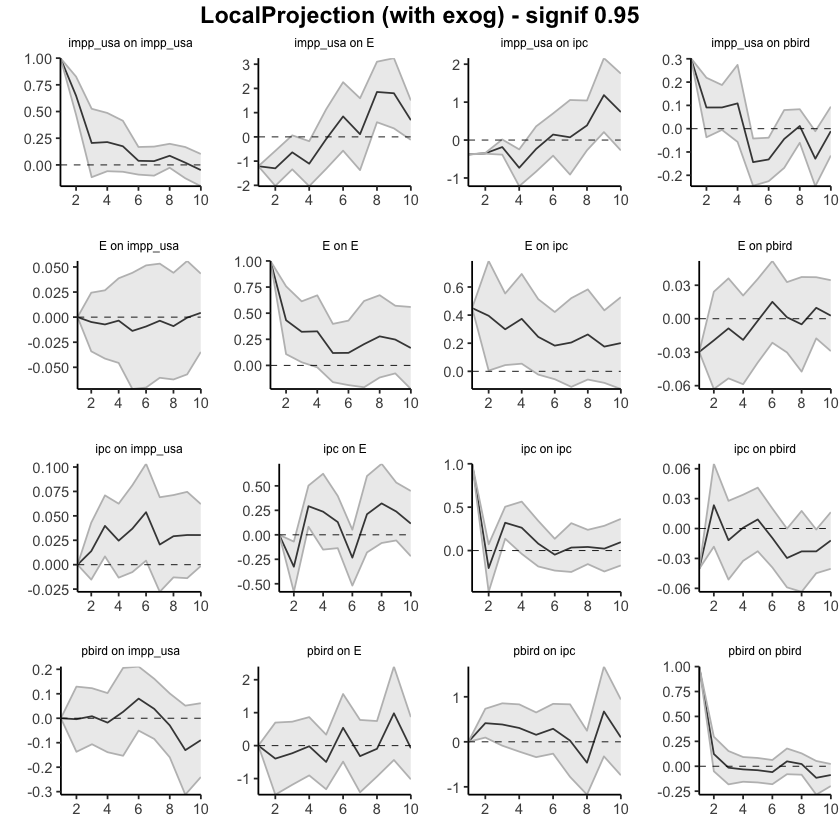

In [13]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 6, horizons=10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends
1 TRUE        NA     FALSE     FALSE      0          1      259 
  column_names            endog
1 impp_usa, E, ipc, pbird 4

Lags for Shock: impp_usa

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   1   2   1   1   1   2   1   1   1

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   1   2   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   1   2   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   1   2   1   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse  response horizon irf_value  lower_bound upper_bound
1  impp_usa E         1      -1.2108859 -1.210886   -1.2108859 
2  impp_usa E         2      -2.5094236 -3.232075   -1.7867721 
3  impp_usa E         3      -3.1475014 -4.572057   -1.7229456 
4  impp_usa E         4      -4.2541865 -6.607295   -1.9010785 
5  impp_usa E         5      -4.3449891 -7.927591   -0.7623876 
6  impp_usa E         6      -3.5012103 -8.496966    1.4945455 
7  impp_usa E         7      -3.3898521 -9.868752    3.0890482 
8  impp_usa E         8      -1.5359033 -9.263585    6.1917783 
9  impp_usa E         9       0.2653581 -8.912217    9.4429336 
10 impp_usa E        10       0.9554541 -9.036367   10.9472747 
11 impp_usa E        11       2.4714238 -8.885080   13.8279278

impulse response horizon irf_value   lower_bound upper_bound
78 ipc     E         1       0.00000000  0.0000000   0.00000000
79 ipc     E         2      -0.32582613 -0.5823534  -0.06929885
80 ipc     E         3      -0.03355441 -0.5004677   0.43335885
81 ipc     E         4       0.20261908 -0.6515456   1.05678375
82 ipc     E         5       0.33301754 -0.7877386   1.45377367
83 ipc     E         6       0.09970749 -1.3064019   1.50581690
84 ipc     E         7       0.30990738 -1.4862329   2.10604764
85 ipc     E         8       0.63081073 -1.5699641   2.83158557
86 ipc     E         9       0.86885276 -1.6274434   3.36514892
87 ipc     E        10       0.98311137 -1.8464503   3.81267303
88 ipc     E        11       1.32642503 -1.7904680   4.44331810

impulse response horizon irf_value   lower_bound upper_bound
111 pbird   E         1       0.00000000   0.000000  0.0000000  
112 pbird   E         2      -0.39449644  -1.488261  0.6992684  
113 pbird   E         3      -0.62546978  -2.676575  1.4256358  
114 pbird   E         4      -0.64473953  -3.580321  2.2908418  
115 pbird   E         5      -1.14003253  -4.903671  2.6236059  
116 pbird   E         6      -0.59910310  -5.388925  4.1907190  
117 pbird   E         7      -0.91819923  -6.806628  4.9702296  
118 pbird   E         8      -1.01440782  -7.745132  5.7163161  
119 pbird   E         9      -0.03314196  -8.181323  8.1150390  
120 pbird   E        10      -0.11186651  -9.204955  8.9812221  
121 pbird   E        11      -0.31017452 -10.558987  9.9386381

impulse response horizon irf_value    lower_bound upper_bound
34 E       impp_usa  1       0.000000000  0.00000000 0.00000000 
35 E       impp_usa  2      -0.004867718 -0.03408842 0.02435299 
36 E       impp_usa  3      -0.012161262 -0.07540910 0.05108657 
37 E       impp_usa  4      -0.015622695 -0.12105202 0.08980663 
38 E       impp_usa  5      -0.029361279 -0.19268637 0.13396381 
39 E       impp_usa  6      -0.038671558 -0.26287274 0.18552963 
40 E       impp_usa  7      -0.042243790 -0.32331192 0.23882434 
41 E       impp_usa  8      -0.051216288 -0.38545062 0.28301804 
42 E       impp_usa  9      -0.051736424 -0.44248529 0.33901244 
43 E       impp_usa 10      -0.047416903 -0.47716894 0.38233514 
44 E       impp_usa 11      -0.038228632 -0.50346132 0.42700406

impulse response horizon irf_value  lower_bound  upper_bound
67 ipc     impp_usa  1      0.00000000  0.000000000 0.00000000 
68 ipc     impp_usa  2      0.01389493 -0.015278879 0.04306874 
69 ipc     impp_usa  3      0.05361117 -0.006802394 0.11402474 
70 ipc     impp_usa  4      0.07821210 -0.020061106 0.17648531 
71 ipc     impp_usa  5      0.11509157 -0.027643923 0.25782705 
72 ipc     impp_usa  6      0.16883495 -0.023478077 0.36114797 
73 ipc     impp_usa  7      0.18946591 -0.051261244 0.43019307 
74 ipc     impp_usa  8      0.21862329 -0.064227663 0.50147423 
75 ipc     impp_usa  9      0.24901095 -0.078025813 0.57604772 
76 ipc     impp_usa 10      0.27935287 -0.079359580 0.63806533 
77 ipc     impp_usa 11      0.29091882 -0.095213646 0.67705128

impulse response horizon irf_value    lower_bound upper_bound
100 pbird   impp_usa  1       0.000000000  0.0000000  0.0000000  
101 pbird   impp_usa  2      -0.003950216 -0.1371105  0.1292101  
102 pbird   impp_usa  3       0.004301192 -0.2433742  0.2519766  
103 pbird   impp_usa  4      -0.013688128 -0.3821391  0.3547628  
104 pbird   impp_usa  5       0.012467788 -0.5354876  0.5604232  
105 pbird   impp_usa  6       0.092734032 -0.5859979  0.7714659  
106 pbird   impp_usa  7       0.131134621 -0.6705226  0.9327918  
107 pbird   impp_usa  8       0.101973825 -0.8301251  1.0340727  
108 pbird   impp_usa  9      -0.028440257 -1.1423832  1.0855027  
109 pbird   impp_usa 10      -0.117829774 -1.3826685  1.1470090  
110 pbird   impp_usa 11      -0.056362745 -1.4582638  1.3455383

impulse response horizon irf_value lower_bound upper_bound
45 E       ipc       1      0.4502318  0.45023183 0.4502318  
46 E       ipc       2      0.8454022  0.45523014 1.2355742  
47 E       ipc       3      1.1443347  0.49944527 1.7892242  
48 E       ipc       4      1.5177858  0.55374894 2.4818226  
49 E       ipc       5      1.7628905  0.53048889 2.9952921  
50 E       ipc       6      1.9457259  0.47423639 3.4172154  
51 E       ipc       7      2.1507215  0.36360238 3.9378406  
52 E       ipc       8      2.4129043  0.30510821 4.5207004  
53 E       ipc       9      2.5887489  0.22303452 4.9544632  
54 E       ipc      10      2.7897027  0.09715850 5.4822470  
55 E       ipc      11      3.0144235 -0.01339876 6.0422457

impulse  response horizon irf_value   lower_bound upper_bound
12 impp_usa ipc       1      -0.37884564 -0.3788456  -0.3788456 
13 impp_usa ipc       2      -0.72911768 -0.7392144  -0.7190209 
14 impp_usa ipc       3      -0.91379548 -1.1242573  -0.7033337 
15 impp_usa ipc       4      -1.64494239 -2.3405032  -0.9493816 
16 impp_usa ipc       5      -1.87967008 -3.1711727  -0.5881675 
17 impp_usa ipc       6      -1.73477099 -3.5832148   0.1136728 
18 impp_usa ipc       7      -1.66175686 -4.4932802   1.1697665 
19 impp_usa ipc       8      -1.27557589 -4.7632849   2.2121332 
20 impp_usa ipc       9      -0.09077139 -4.5538746   4.3723318 
21 impp_usa ipc      10       0.64792515 -4.8281425   6.1239928 
22 impp_usa ipc      11       1.38700726 -4.7463386   7.5203531

impulse response horizon irf_value lower_bound  upper_bound
122 pbird   ipc       1      0.0000000  0.000000000 0.0000000  
123 pbird   ipc       2      0.4142124  0.094117571 0.7343072  
124 pbird   ipc       3      0.7990265  0.008518373 1.5895347  
125 pbird   ipc       4      1.1064555 -0.208406819 2.4213177  
126 pbird   ipc       5      1.2622599 -0.549199688 3.0737195  
127 pbird   ipc       6      1.5522856 -0.812410996 3.9169821  
128 pbird   ipc       7      1.5795619 -1.590446661 4.7495705  
129 pbird   ipc       8      1.1156457 -2.764367494 4.9956589  
130 pbird   ipc       9      1.7892761 -3.087930379 6.6664825  
131 pbird   ipc      10      1.8873499 -3.831257748 7.6059575  
132 pbird   ipc      11      1.7073119 -4.667783420 8.0824072

impulse response horizon irf_value   lower_bound upper_bound 
56 E       pbird     1      -0.02975203 -0.02975203 -0.029752025
57 E       pbird     2      -0.04915736 -0.09272949 -0.005585226
58 E       pbird     3      -0.05780629 -0.14616865  0.030556068
59 E       pbird     4      -0.07676708 -0.20487102  0.051336861
60 E       pbird     5      -0.07859941 -0.24416368  0.086964863
61 E       pbird     6      -0.06347743 -0.26567923  0.138724374
62 E       pbird     7      -0.06219020 -0.29590475  0.171524359
63 E       pbird     8      -0.06721842 -0.34331569  0.208878860
64 E       pbird     9      -0.05743521 -0.36093769  0.246067263
65 E       pbird    10      -0.05470555 -0.38997865  0.280567551
66 E       pbird    11      -0.05891352 -0.42900306  0.311176016

impulse  response horizon irf_value lower_bound upper_bound
23 impp_usa pbird     1      0.3028633  0.30286330 0.3028633  
24 impp_usa pbird     2      0.3938123  0.26610510 0.5215196  
25 impp_usa pbird     3      0.4849311  0.26094532 0.7089170  
26 impp_usa pbird     4      0.5935452  0.20432496 0.9827655  
27 impp_usa pbird     5      0.4499294 -0.04064716 0.9405059  
28 impp_usa pbird     6      0.3178550 -0.26604899 0.9017591  
29 impp_usa pbird     7      0.2737114 -0.43431309 0.9817359  
30 impp_usa pbird     8      0.2851556 -0.49492011 1.0652313  
31 impp_usa pbird     9      0.1563153 -0.74172393 1.0543546  
32 impp_usa pbird    10      0.1460301 -0.85703574 1.1490958  
33 impp_usa pbird    11      0.1685649 -0.92398353 1.2611134

impulse response horizon irf_value   lower_bound upper_bound
89 ipc     pbird     1      -0.04044280 -0.04044280 -0.04044280
90 ipc     pbird     2      -0.01705188 -0.05863538  0.02453161
91 ipc     pbird     3      -0.02876978 -0.10983667  0.05229710
92 ipc     pbird     4      -0.02801510 -0.14226166  0.08623146
93 ipc     pbird     5      -0.01889906 -0.16506018  0.12726205
94 ipc     pbird     6      -0.02838391 -0.20412176  0.14735395
95 ipc     pbird     7      -0.05795514 -0.26313253  0.14722224
96 ipc     pbird     8      -0.08088183 -0.32662794  0.16486428
97 ipc     pbird     9      -0.10378623 -0.37146103  0.16388857
98 ipc     pbird    10      -0.11575180 -0.41183326  0.18032965
99 ipc     pbird    11      -0.13611107 -0.45870405  0.18648192

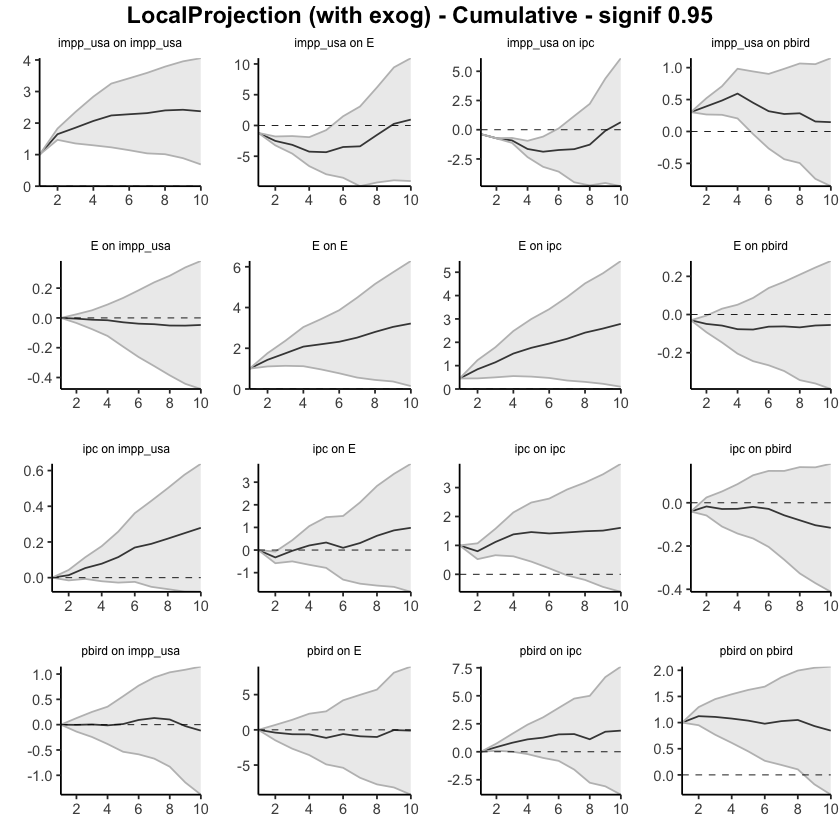

In [14]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 6, horizons=10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        0     1          0.68    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends
1 TRUE        NA     FALSE     FALSE      0          1      259 
  column_names            endog
1 impp_usa, E, ipc, pbird 4

Lags for Shock: impp_usa

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   1   2   1   1   1   2   1   1   1

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   1   2   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   1   2   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   1   2   1   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.68

impulse  response horizon irf_value  lower_bound upper_bound
1  impp_usa E         1      -1.2108859 -1.210886   -1.21088588
2  impp_usa E         2      -2.5094236 -2.878123   -2.14072384
3  impp_usa E         3      -3.1475014 -3.874316   -2.42068721
4  impp_usa E         4      -4.2541865 -5.454752   -3.05362121
5  impp_usa E         5      -4.3449891 -6.172847   -2.51713119
6  impp_usa E         6      -3.5012103 -6.050065   -0.95235530
7  impp_usa E         7      -3.3898521 -6.695413   -0.08429069
8  impp_usa E         8      -1.5359033 -5.478598    2.40679139
9  impp_usa E         9       0.2653581 -4.417078    4.94779458
10 impp_usa E        10       0.9554541 -4.142414    6.05332173
11 impp_usa E        11       2.4714238 -3.322711    8.26555849

impulse response horizon irf_value   lower_bound upper_bound
78 ipc     E         1       0.00000000  0.0000000   0.0000000 
79 ipc     E         2      -0.32582613 -0.4567074  -0.1949449 
80 ipc     E         3      -0.03355441 -0.2717755   0.2046666 
81 ipc     E         4       0.20261908 -0.2331792   0.6384174 
82 ipc     E         5       0.33301754 -0.2387968   0.9048319 
83 ipc     E         6       0.09970749 -0.6176953   0.8171102 
84 ipc     E         7       0.30990738 -0.6064907   1.2263055 
85 ipc     E         8       0.63081073 -0.4920336   1.7536550 
86 ipc     E         9       0.86885276 -0.4047677   2.1424733 
87 ipc     E        10       0.98311137 -0.4605425   2.4267653 
88 ipc     E        11       1.32642503 -0.2638265   2.9166766

impulse response horizon irf_value   lower_bound upper_bound
111 pbird   E         1       0.00000000  0.0000000  0.0000000  
112 pbird   E         2      -0.39449644 -0.9525397  0.1635468  
113 pbird   E         3      -0.62546978 -1.6719522  0.4210127  
114 pbird   E         4      -0.64473953 -2.1424851  0.8530060  
115 pbird   E         5      -1.14003253 -3.0602562  0.7801911  
116 pbird   E         6      -0.59910310 -3.0428899  1.8446837  
117 pbird   E         7      -0.91819923 -3.9224996  2.0861012  
118 pbird   E         8      -1.01440782 -4.4484506  2.4196350  
119 pbird   E         9      -0.03314196 -4.1903771  4.1240932  
120 pbird   E        10      -0.11186651 -4.7511974  4.5274644  
121 pbird   E        11      -0.31017452 -5.5391605  4.9188115

impulse response horizon irf_value    lower_bound upper_bound
34 E       impp_usa  1       0.000000000  0.00000000 0.00000000 
35 E       impp_usa  2      -0.004867718 -0.01977624 0.01004080 
36 E       impp_usa  3      -0.012161262 -0.04443057 0.02010804 
37 E       impp_usa  4      -0.015622695 -0.06941317 0.03816778 
38 E       impp_usa  5      -0.029361279 -0.11269040 0.05396785 
39 E       impp_usa  6      -0.038671558 -0.15305992 0.07571680 
40 E       impp_usa  7      -0.042243790 -0.18564590 0.10115832 
41 E       impp_usa  8      -0.051216288 -0.22174401 0.11931143 
42 E       impp_usa  9      -0.051736424 -0.25109809 0.14762524 
43 E       impp_usa 10      -0.047416903 -0.26667815 0.17184434 
44 E       impp_usa 11      -0.038228632 -0.27559225 0.19913499

impulse response horizon irf_value  lower_bound   upper_bound
67 ipc     impp_usa  1      0.00000000  0.0000000000 0.00000000 
68 ipc     impp_usa  2      0.01389493 -0.0009896674 0.02877952 
69 ipc     impp_usa  3      0.05361117  0.0227879239 0.08443442 
70 ipc     impp_usa  4      0.07821210  0.0280727115 0.12835150 
71 ipc     impp_usa  5      0.11509157  0.0422673364 0.18791579 
72 ipc     impp_usa  6      0.16883495  0.0707160565 0.26695383 
73 ipc     impp_usa  7      0.18946591  0.0666459359 0.31228589 
74 ipc     impp_usa  8      0.21862329  0.0743115766 0.36293499 
75 ipc     impp_usa  9      0.24901095  0.0821554597 0.41586644 
76 ipc     impp_usa 10      0.27935287  0.0963363161 0.46236943 
77 ipc     impp_usa 11      0.29091882  0.0939124581 0.48792517

impulse response horizon irf_value    lower_bound upper_bound
100 pbird   impp_usa  1       0.000000000  0.00000000 0.00000000 
101 pbird   impp_usa  2      -0.003950216 -0.07188915 0.06398872 
102 pbird   impp_usa  3       0.004301192 -0.12206381 0.13066620 
103 pbird   impp_usa  4      -0.013688128 -0.20167331 0.17429706 
104 pbird   impp_usa  5       0.012467788 -0.26710130 0.29203687 
105 pbird   impp_usa  6       0.092734032 -0.25355775 0.43902581 
106 pbird   impp_usa  7       0.131134621 -0.27787416 0.54014340 
107 pbird   impp_usa  8       0.101973825 -0.37358684 0.57753449 
108 pbird   impp_usa  9      -0.028440257 -0.59677849 0.53989798 
109 pbird   impp_usa 10      -0.117829774 -0.76315566 0.52749612 
110 pbird   impp_usa 11      -0.056362745 -0.77161837 0.65889288

impulse response horizon irf_value lower_bound upper_bound
45 E       ipc       1      0.4502318 0.4502318   0.4502318  
46 E       ipc       2      0.8454022 0.6463348   1.0444696  
47 E       ipc       3      1.1443347 0.8153095   1.4733599  
48 E       ipc       4      1.5177858 1.0259303   2.0096413  
49 E       ipc       5      1.7628905 1.1341142   2.3916668  
50 E       ipc       6      1.9457259 1.1949659   2.6964858  
51 E       ipc       7      2.1507215 1.2389260   3.0625169  
52 E       ipc       8      2.4129043 1.3374981   3.4883105  
53 E       ipc       9      2.5887489 1.3817517   3.7957460  
54 E       ipc      10      2.7897027 1.4159557   4.1634498  
55 E       ipc      11      3.0144235 1.4696162   4.5592307

impulse  response horizon irf_value   lower_bound upper_bound
12 impp_usa ipc       1      -0.37884564 -0.3788456  -0.3788456 
13 impp_usa ipc       2      -0.72911768 -0.7342691  -0.7239663 
14 impp_usa ipc       3      -0.91379548 -1.0211740  -0.8064170 
15 impp_usa ipc       4      -1.64494239 -1.9998203  -1.2900644 
16 impp_usa ipc       5      -1.87967008 -2.5386000  -1.2207402 
17 impp_usa ipc       6      -1.73477099 -2.6778546  -0.7916874 
18 impp_usa ipc       7      -1.66175686 -3.1064116  -0.2171021 
19 impp_usa ipc       8      -1.27557589 -3.0550193   0.5038675 
20 impp_usa ipc       9      -0.09077139 -2.3678649   2.1863221 
21 impp_usa ipc      10       0.64792515 -2.1459869   3.4418372 
22 impp_usa ipc      11       1.38700726 -1.7422508   4.5162653

impulse response horizon irf_value lower_bound upper_bound
122 pbird   ipc       1      0.0000000  0.00000000 0.000000   
123 pbird   ipc       2      0.4142124  0.25089870 0.577526   
124 pbird   ipc       3      0.7990265  0.39570604 1.202347   
125 pbird   ipc       4      1.1064555  0.43560736 1.777304   
126 pbird   ipc       5      1.2622599  0.33804583 2.186474   
127 pbird   ipc       6      1.5522856  0.34580773 2.758763   
128 pbird   ipc       7      1.5795619 -0.03778939 3.196913   
129 pbird   ipc       8      1.1156457 -0.86395286 3.095244   
130 pbird   ipc       9      1.7892761 -0.69909457 4.277647   
131 pbird   ipc      10      1.8873499 -1.03030707 4.805007   
132 pbird   ipc      11      1.7073119 -1.54528775 4.959912

impulse response horizon irf_value   lower_bound upper_bound 
56 E       pbird     1      -0.02975203 -0.02975203 -0.029752025
57 E       pbird     2      -0.04915736 -0.07138804 -0.026926678
58 E       pbird     3      -0.05780629 -0.10288913 -0.012723455
59 E       pbird     4      -0.07676708 -0.14212623 -0.011407925
60 E       pbird     5      -0.07859941 -0.16307098  0.005872158
61 E       pbird     6      -0.06347743 -0.16664162  0.039686755
62 E       pbird     7      -0.06219020 -0.18143232  0.057051923
63 E       pbird     8      -0.06721842 -0.20808437  0.073647541
64 E       pbird     9      -0.05743521 -0.21228341  0.097412990
65 E       pbird    10      -0.05470555 -0.22576325  0.116352156
66 E       pbird    11      -0.05891352 -0.24773471  0.129907671

impulse  response horizon irf_value lower_bound upper_bound
23 impp_usa pbird     1      0.3028633  0.30286330 0.3028633  
24 impp_usa pbird     2      0.3938123  0.32865557 0.4589691  
25 impp_usa pbird     3      0.4849311  0.37065266 0.5992096  
26 impp_usa pbird     4      0.5935452  0.39496346 0.7921270  
27 impp_usa pbird     5      0.4499294  0.19963521 0.7002235  
28 impp_usa pbird     6      0.3178550  0.01994482 0.6157653  
29 impp_usa pbird     7      0.2737114 -0.08752558 0.6349484  
30 impp_usa pbird     8      0.2851556 -0.11284222 0.6831534  
31 impp_usa pbird     9      0.1563153 -0.30186797 0.6144986  
32 impp_usa pbird    10      0.1460301 -0.36573821 0.6577983  
33 impp_usa pbird    11      0.1685649 -0.38885775 0.7259876

impulse response horizon irf_value   lower_bound upper_bound 
89 ipc     pbird     1      -0.04044280 -0.04044280 -0.040442803
90 ipc     pbird     2      -0.01705188 -0.03826796  0.004164185
91 ipc     pbird     3      -0.02876978 -0.07013044  0.012590873
92 ipc     pbird     4      -0.02801510 -0.08630416  0.030273957
93 ipc     pbird     5      -0.01889906 -0.09347106  0.055672935
94 ipc     pbird     6      -0.02838391 -0.11804608  0.061278267
95 ipc     pbird     7      -0.05795514 -0.16263748  0.046727197
96 ipc     pbird     8      -0.08088183 -0.20626250  0.044498835
97 ipc     pbird     9      -0.10378623 -0.24035500  0.032782545
98 ipc     pbird    10      -0.11575180 -0.26681377  0.035310162
99 ipc     pbird    11      -0.13611107 -0.30069932  0.028477190

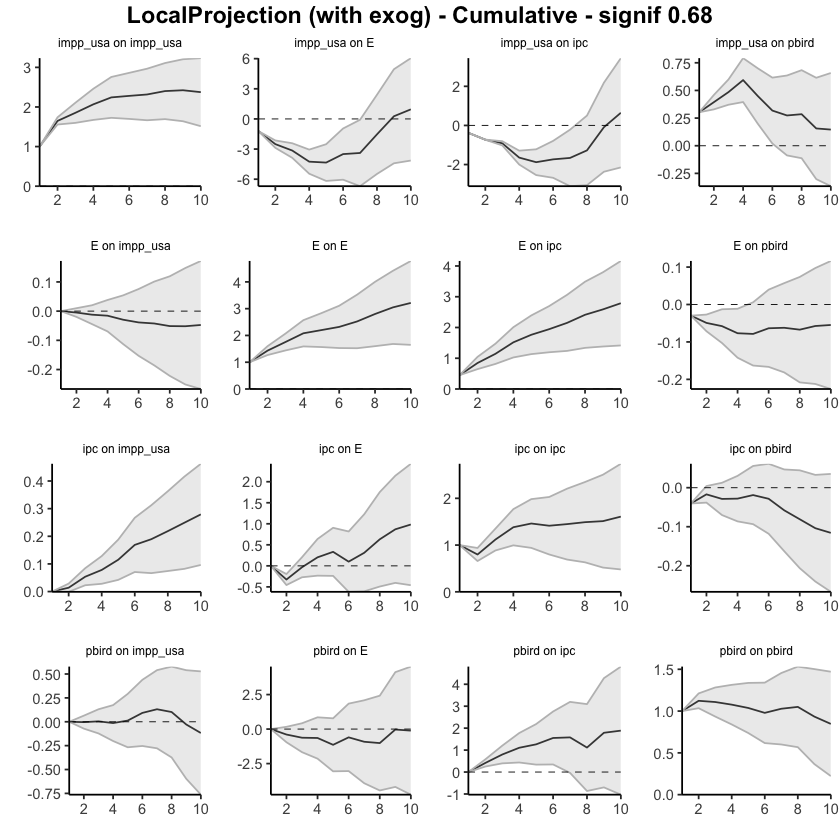

In [45]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 6, horizons=10, signif = 0.68, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        1     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends
1 TRUE        NA     FALSE     FALSE      0          1      259 
  column_names            endog
1 impp_usa, E, ipc, pbird 4

Lags for Shock: impp_usa

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse  response horizon irf_value   lower_bound upper_bound
1  impp_usa E         1      -1.22753558 -1.2275356  -1.2275356 
2  impp_usa E         2      -1.30606704 -2.0160426  -0.5960914 
3  impp_usa E         3      -0.62911863 -1.3228910   0.0646537 
4  impp_usa E         4      -1.10351759 -2.0411531  -0.1658821 
5  impp_usa E         5      -0.07043373 -1.2996249   1.1587574 
6  impp_usa E         6       0.86221358 -0.5490077   2.2734349 
7  impp_usa E         7       0.10465315 -1.2804265   1.4897329 
8  impp_usa E         8       1.81355874  0.5877880   3.0393295 
9  impp_usa E         9       1.75830858  0.3185403   3.1980769 
10 impp_usa E        10       0.67317685 -0.1094790   1.4558327 
11 impp_usa E        11       1.46145193  0.0875627   2.8353412

impulse response horizon irf_value  lower_bound upper_bound
78 ipc     E         1       0.0000000  0.00000000  0.00000000
79 ipc     E         2      -0.3260473 -0.58170240 -0.07039216
80 ipc     E         3       0.2923672  0.08350091  0.50123352
81 ipc     E         4       0.2362320 -0.14501379  0.61747777
82 ipc     E         5       0.1313364 -0.13350661  0.39617949
83 ipc     E         6      -0.2309494 -0.51405436  0.05215547
84 ipc     E         7       0.2084057 -0.18475794  0.60156939
85 ipc     E         8       0.3118480 -0.09305014  0.71674607
86 ipc     E         9       0.2310911 -0.06444439  0.52662657
87 ipc     E        10       0.1107219 -0.21604885  0.43749261
88 ipc     E        11       0.3311657  0.04991613  0.61241520

impulse response horizon irf_value   lower_bound upper_bound
111 pbird   E         1       0.00000000  0.0000000  0.0000000  
112 pbird   E         2      -0.39553534 -1.4917878  0.7007171  
113 pbird   E         3      -0.22009861 -1.1815784  0.7413811  
114 pbird   E         4      -0.01341664 -0.9032087  0.8763755  
115 pbird   E         5      -0.47507654 -1.3134573  0.3633043  
116 pbird   E         6       0.56879505 -0.4735955  1.6111856  
117 pbird   E         7      -0.32498964 -1.4253747  0.7753954  
118 pbird   E         8      -0.12074659 -0.9657029  0.7242097  
119 pbird   E         9       0.96070979 -0.4425078  2.3639274  
120 pbird   E        10      -0.09104545 -1.0196510  0.8375601  
121 pbird   E        11      -0.23352423 -1.4069909  0.9399424

impulse response horizon irf_value    lower_bound upper_bound
34 E       impp_usa  1       0.000000000  0.00000000 0.00000000 
35 E       impp_usa  2      -0.005414970 -0.03462510 0.02379516 
36 E       impp_usa  3      -0.008765412 -0.04337486 0.02584403 
37 E       impp_usa  4      -0.005063816 -0.04423976 0.03411212 
38 E       impp_usa  5      -0.015531010 -0.07396372 0.04290170 
39 E       impp_usa  6      -0.011212021 -0.07216033 0.04973628 
40 E       impp_usa  7      -0.005693668 -0.06182519 0.05043786 
41 E       impp_usa  8      -0.011133086 -0.06256664 0.04030047 
42 E       impp_usa  9      -0.002770277 -0.05567253 0.05013197 
43 E       impp_usa 10       0.002000810 -0.03269542 0.03669704 
44 E       impp_usa 11       0.006952115 -0.02763267 0.04153690

impulse response horizon irf_value   lower_bound  upper_bound
67 ipc     impp_usa  1      0.000000000  0.000000000 0.00000000 
68 ipc     impp_usa  2      0.013919292 -0.015423864 0.04326245 
69 ipc     impp_usa  3      0.036342796  0.004389018 0.06829657 
70 ipc     impp_usa  4      0.020703876 -0.012766346 0.05417410 
71 ipc     impp_usa  5      0.032526578 -0.011013214 0.07606637 
72 ipc     impp_usa  6      0.049111478  0.001596514 0.09662644 
73 ipc     impp_usa  7      0.015063774 -0.029851105 0.05997865 
74 ipc     impp_usa  8      0.023150348 -0.014973969 0.06127467 
75 ipc     impp_usa  9      0.023778609 -0.015179867 0.06273708 
76 ipc     impp_usa 10      0.023272159 -0.002606033 0.04915035 
77 ipc     impp_usa 11      0.004652865 -0.021767699 0.03107343

impulse response horizon irf_value    lower_bound upper_bound
100 pbird   impp_usa  1       0.000000000  0.00000000 0.00000000 
101 pbird   impp_usa  2      -0.008278826 -0.14107118 0.12451352 
102 pbird   impp_usa  3      -0.003837975 -0.12219389 0.11451794 
103 pbird   impp_usa  4      -0.029907300 -0.15417347 0.09435887 
104 pbird   impp_usa  5       0.012236551 -0.17381542 0.19828853 
105 pbird   impp_usa  6       0.066671312 -0.07467366 0.20801628 
106 pbird   impp_usa  7       0.022884326 -0.10924250 0.15501115 
107 pbird   impp_usa  8      -0.045490799 -0.18150998 0.09052839 
108 pbird   impp_usa  9      -0.148342587 -0.34086013 0.04417496 
109 pbird   impp_usa 10      -0.109327806 -0.27582369 0.05716808 
110 pbird   impp_usa 11       0.041143846 -0.08739041 0.16967810

impulse response horizon irf_value lower_bound  upper_bound
45 E       ipc       1      0.4504711  0.450471078 0.4504711  
46 E       ipc       2      0.3952515  0.005207178 0.7852958  
47 E       ipc       3      0.2990609  0.041008861 0.5571129  
48 E       ipc       4      0.3736989  0.054673674 0.6927241  
49 E       ipc       5      0.2451762 -0.023347700 0.5137001  
50 E       ipc       6      0.1830196 -0.055208927 0.4212480  
51 E       ipc       7      0.2035124 -0.116179605 0.5232044  
52 E       ipc       8      0.2622360 -0.057308816 0.5817808  
53 E       ipc       9      0.1737954 -0.093933552 0.4415244  
54 E       ipc      10      0.1961875 -0.140508269 0.5328832  
55 E       ipc      11      0.2199640 -0.114650476 0.5545784

impulse  response horizon irf_value   lower_bound upper_bound 
12 impp_usa ipc       1      -0.38043891 -0.38043891 -0.380438909
13 impp_usa ipc       2      -0.35648203 -0.35962682 -0.353337250
14 impp_usa ipc       3      -0.18805118 -0.37264215 -0.003460204
15 impp_usa ipc       4      -0.73375608 -1.23760242 -0.229909745
16 impp_usa ipc       5      -0.23790270 -0.82589282  0.350087415
17 impp_usa ipc       6       0.14359329 -0.40238927  0.689575843
18 impp_usa ipc       7       0.05690983 -0.92832331  1.042142977
19 impp_usa ipc       8       0.38427633 -0.24443808  1.012990733
20 impp_usa ipc       9       1.15932929  0.15400783  2.164650758
21 impp_usa ipc      10       0.70026757 -0.27386376  1.674398897
22 impp_usa ipc      11       0.70188077  0.03269323  1.371068304

impulse response horizon irf_value   lower_bound upper_bound
122 pbird   ipc       1       0.00000000  0.00000000 0.0000000  
123 pbird   ipc       2       0.41820469  0.09882449 0.7375849  
124 pbird   ipc       3       0.38719374 -0.07849333 0.8528808  
125 pbird   ipc       4       0.31123319 -0.21003552 0.8325019  
126 pbird   ipc       5       0.15750646 -0.34667952 0.6616924  
127 pbird   ipc       6       0.29443085 -0.25393613 0.8427978  
128 pbird   ipc       7       0.01769105 -0.81580272 0.8511848  
129 pbird   ipc       8      -0.46541027 -1.16784802 0.2370275  
130 pbird   ipc       9       0.66133051 -0.33620730 1.6588683  
131 pbird   ipc      10       0.07004038 -0.77255313 0.9126339  
132 pbird   ipc      11      -0.21148551 -0.88498538 0.4620144

impulse response horizon irf_value    lower_bound upper_bound
56 E       pbird     1      -0.030045040 -0.03004504 -0.03004504
57 E       pbird     2      -0.019984113 -0.06496985  0.02500163
58 E       pbird     3      -0.012023941 -0.04328149  0.01923361
59 E       pbird     4      -0.019995959 -0.05872476  0.01873285
60 E       pbird     5      -0.002744027 -0.04046326  0.03497521
61 E       pbird     6       0.014353721 -0.02279833  0.05150577
62 E       pbird     7       0.000360684 -0.03074227  0.03146363
63 E       pbird     8      -0.006166901 -0.04687485  0.03454104
64 E       pbird     9       0.008710767 -0.01800687  0.03542841
65 E       pbird    10       0.001704480 -0.02927862  0.03268758
66 E       pbird    11      -0.005269731 -0.04076307  0.03022360

impulse  response horizon irf_value    lower_bound upper_bound
23 impp_usa pbird     1       0.296129282  0.29612928  0.29612928
24 impp_usa pbird     2       0.082631654 -0.03700967  0.20227297
25 impp_usa pbird     3       0.127170451 -0.01442587  0.26876677
26 impp_usa pbird     4       0.100883717 -0.06663846  0.26840590
27 impp_usa pbird     5      -0.154526357 -0.25201184 -0.05704087
28 impp_usa pbird     6      -0.140980681 -0.23234883 -0.04961253
29 impp_usa pbird     7      -0.054704372 -0.18106115  0.07165241
30 impp_usa pbird     8       0.004257898 -0.07208329  0.08059909
31 impp_usa pbird     9      -0.142282914 -0.26141626 -0.02314956
32 impp_usa pbird    10      -0.023829502 -0.13373552  0.08607652
33 impp_usa pbird    11       0.007670422 -0.08346051  0.09880135

impulse response horizon irf_value     lower_bound upper_bound 
89 ipc     pbird     1      -0.0398885689 -0.03988857 -0.039888569
90 ipc     pbird     2       0.0220982657 -0.02173415  0.065930681
91 ipc     pbird     3      -0.0138159363 -0.03630673  0.008674861
92 ipc     pbird     4      -0.0005131037 -0.03268635  0.031660139
93 ipc     pbird     5       0.0068416877 -0.02497938  0.038662754
94 ipc     pbird     6      -0.0114519546 -0.04110720  0.018203286
95 ipc     pbird     7      -0.0319360543 -0.06066095 -0.003211155
96 ipc     pbird     8      -0.0246310164 -0.06287925  0.013617221
97 ipc     pbird     9      -0.0261021472 -0.04751719 -0.004687103
98 ipc     pbird    10      -0.0151407661 -0.04237298  0.012091448
99 ipc     pbird    11      -0.0236691932 -0.04999661  0.002658221

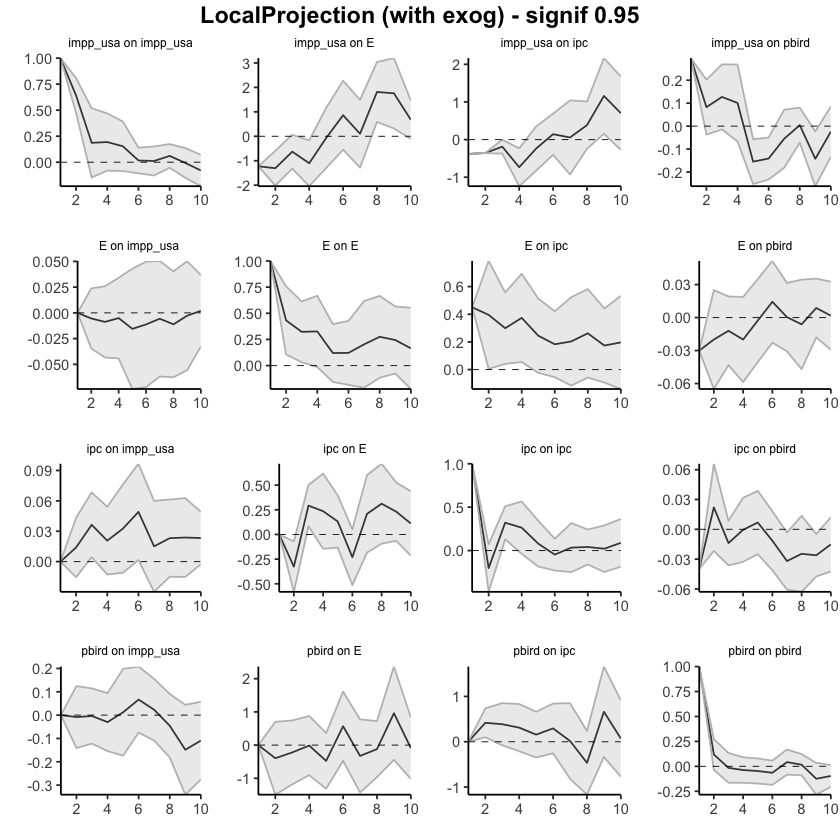

In [73]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 6, horizons=10, signif = 0.95, trend=1)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        1     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends
1 TRUE        NA     FALSE     FALSE      0          1      259 
  column_names            endog
1 impp_usa, E, ipc, pbird 4

Lags for Shock: impp_usa

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse  response horizon irf_value  lower_bound upper_bound
1  impp_usa E         1      -1.2275356 -1.227536   -1.227536  
2  impp_usa E         2      -2.5336026 -3.243578   -1.823627  
3  impp_usa E         3      -3.1627212 -4.566469   -1.758973  
4  impp_usa E         4      -4.2662388 -6.607622   -1.924855  
5  impp_usa E         5      -4.3366726 -7.907247   -0.766098  
6  impp_usa E         6      -3.4744590 -8.456255    1.507337  
7  impp_usa E         7      -3.3698058 -9.736681    2.997070  
8  impp_usa E         8      -1.5562471 -9.148893    6.036399  
9  impp_usa E         9       0.2020615 -8.830353    9.234476  
10 impp_usa E        10       0.8752383 -8.939832   10.690309  
11 impp_usa E        11       2.3366903 -8.852269   13.525650

impulse response horizon irf_value   lower_bound upper_bound
78 ipc     E         1       0.00000000  0.0000000   0.00000000
79 ipc     E         2      -0.32604728 -0.5817024  -0.07039216
80 ipc     E         3      -0.03368006 -0.4982015   0.43084136
81 ipc     E         4       0.20255193 -0.6432153   1.04831913
82 ipc     E         5       0.33388836 -0.7767219   1.44449862
83 ipc     E         6       0.10293892 -1.2907763   1.49665408
84 ipc     E         7       0.31134464 -1.4755342   2.09822348
85 ipc     E         8       0.62319261 -1.5685843   2.81496955
86 ipc     E         9       0.85428369 -1.6330287   3.34159611
87 ipc     E        10       0.96500558 -1.8490776   3.77908873
88 ipc     E        11       1.29617125 -1.7991614   4.39150393

impulse response horizon irf_value   lower_bound upper_bound
111 pbird   E         1       0.00000000   0.000000  0.0000000  
112 pbird   E         2      -0.39553534  -1.491788  0.7007171  
113 pbird   E         3      -0.61563396  -2.673366  1.4420983  
114 pbird   E         4      -0.62905059  -3.576575  2.3184737  
115 pbird   E         5      -1.10412713  -4.890032  2.6817780  
116 pbird   E         6      -0.53533209  -5.363628  4.2929636  
117 pbird   E         7      -0.86032172  -6.789002  5.0683590  
118 pbird   E         8      -0.98106831  -7.754705  5.7925687  
119 pbird   E         9      -0.02035852  -8.197213  8.1564961  
120 pbird   E        10      -0.11140397  -9.216864  8.9940562  
121 pbird   E        11      -0.34492821 -10.623855  9.9339985

impulse response horizon irf_value   lower_bound upper_bound
34 E       impp_usa  1       0.00000000  0.00000000 0.00000000 
35 E       impp_usa  2      -0.00541497 -0.03462510 0.02379516 
36 E       impp_usa  3      -0.01418038 -0.07799996 0.04963920 
37 E       impp_usa  4      -0.01924420 -0.12223972 0.08375132 
38 E       impp_usa  5      -0.03477521 -0.19620344 0.12665302 
39 E       impp_usa  6      -0.04598723 -0.26836376 0.17638931 
40 E       impp_usa  7      -0.05168090 -0.33018895 0.22682716 
41 E       impp_usa  8      -0.06281398 -0.39275560 0.26712763 
42 E       impp_usa  9      -0.06558426 -0.44842812 0.31725961 
43 E       impp_usa 10      -0.06358345 -0.48112354 0.35395665 
44 E       impp_usa 11      -0.05663133 -0.50875621 0.39549355

impulse response horizon irf_value  lower_bound upper_bound
67 ipc     impp_usa  1      0.00000000  0.00000000 0.00000000 
68 ipc     impp_usa  2      0.01391929 -0.01542386 0.04326245 
69 ipc     impp_usa  3      0.05026209 -0.01103485 0.11155902 
70 ipc     impp_usa  4      0.07096596 -0.02380119 0.16573312 
71 ipc     impp_usa  5      0.10349254 -0.03481441 0.24179949 
72 ipc     impp_usa  6      0.15260402 -0.03321789 0.33842593 
73 ipc     impp_usa  7      0.16766779 -0.06306900 0.39840458 
74 ipc     impp_usa  8      0.19081814 -0.07804297 0.45967925 
75 ipc     impp_usa  9      0.21459675 -0.09322283 0.52241633 
76 ipc     impp_usa 10      0.23786891 -0.09582886 0.57156669 
77 ipc     impp_usa 11      0.24252178 -0.11759656 0.60264011

impulse response horizon irf_value    lower_bound upper_bound
100 pbird   impp_usa  1       0.000000000  0.0000000  0.0000000  
101 pbird   impp_usa  2      -0.008278826 -0.1410712  0.1245135  
102 pbird   impp_usa  3      -0.012116801 -0.2632651  0.2390315  
103 pbird   impp_usa  4      -0.042024101 -0.4174385  0.3333903  
104 pbird   impp_usa  5      -0.029787550 -0.5912540  0.5316789  
105 pbird   impp_usa  6       0.036883762 -0.6659276  0.7396951  
106 pbird   impp_usa  7       0.059768089 -0.7751701  0.8947063  
107 pbird   impp_usa  8       0.014277290 -0.9566801  0.9852347  
108 pbird   impp_usa  9      -0.134065297 -1.2975402  1.0294096  
109 pbird   impp_usa 10      -0.243393103 -1.5733639  1.0865777  
110 pbird   impp_usa 11      -0.202249256 -1.6607543  1.2562558

impulse response horizon irf_value lower_bound upper_bound
45 E       ipc       1      0.4504711  0.45047108 0.4504711  
46 E       ipc       2      0.8457226  0.45567826 1.2357669  
47 E       ipc       3      1.1447835  0.49668712 1.7928798  
48 E       ipc       4      1.5184824  0.55136079 2.4856039  
49 E       ipc       5      1.7636585  0.52801309 2.9993040  
50 E       ipc       6      1.9466781  0.47280416 3.4205520  
51 E       ipc       7      2.1501905  0.35662456 3.9437564  
52 E       ipc       8      2.4124265  0.29931574 4.5255372  
53 E       ipc       9      2.5862219  0.20538219 4.9670616  
54 E       ipc      10      2.7824094  0.06487392 5.4999448  
55 E       ipc      11      3.0023733 -0.04977655 6.0545232

impulse  response horizon irf_value  lower_bound upper_bound
12 impp_usa ipc       1      -0.3804389 -0.3804389  -0.38043891
13 impp_usa ipc       2      -0.7369209 -0.7400657  -0.73377616
14 impp_usa ipc       3      -0.9249721 -1.1127079  -0.73723636
15 impp_usa ipc       4      -1.6587282 -2.3503103  -0.96714611
16 impp_usa ipc       5      -1.8966309 -3.1762031  -0.61705869
17 impp_usa ipc       6      -1.7530376 -3.5785924   0.07251715
18 impp_usa ipc       7      -1.6961278 -4.5069157   1.11466013
19 impp_usa ipc       8      -1.3118515 -4.7513538   2.12765086
20 impp_usa ipc       9      -0.1525222 -4.5973459   4.29230162
21 impp_usa ipc      10       0.5477454 -4.8712097   5.96670052
22 impp_usa ipc      11       1.2496262 -4.8385165   7.33776882

impulse response horizon irf_value lower_bound upper_bound
122 pbird   ipc       1      0.0000000  0.00000000 0.0000000  
123 pbird   ipc       2      0.4182047  0.09882449 0.7375849  
124 pbird   ipc       3      0.8053984  0.02033116 1.5904657  
125 pbird   ipc       4      1.1166316 -0.18970436 2.4229676  
126 pbird   ipc       5      1.2741381 -0.53638388 3.0846600  
127 pbird   ipc       6      1.5685689 -0.79032002 3.9274579  
128 pbird   ipc       7      1.5862600 -1.60612273 4.7786427  
129 pbird   ipc       8      1.1208497 -2.77397075 5.0156702  
130 pbird   ipc       9      1.7821802 -3.11017805 6.6745385  
131 pbird   ipc      10      1.8522206 -3.88273118 7.5871724  
132 pbird   ipc      11      1.6407351 -4.76771656 8.0491867

impulse response horizon irf_value   lower_bound upper_bound 
56 E       pbird     1      -0.03004504 -0.03004504 -0.030045040
57 E       pbird     2      -0.05002915 -0.09501489 -0.005043414
58 E       pbird     3      -0.06205309 -0.13829638  0.014190196
59 E       pbird     4      -0.08204905 -0.19702115  0.032923043
60 E       pbird     5      -0.08479308 -0.23748441  0.067898250
61 E       pbird     6      -0.07043936 -0.26028274  0.119404022
62 E       pbird     7      -0.07007867 -0.29102501  0.150867655
63 E       pbird     8      -0.07624558 -0.33789985  0.185408700
64 E       pbird     9      -0.06753481 -0.35590672  0.220837105
65 E       pbird    10      -0.06583033 -0.38518534  0.253524683
66 E       pbird    11      -0.07110006 -0.42594841  0.283748288

impulse  response horizon irf_value  lower_bound upper_bound
23 impp_usa pbird     1      0.29612928  0.29612928 0.2961293  
24 impp_usa pbird     2      0.37876094  0.25911962 0.4984023  
25 impp_usa pbird     3      0.50593139  0.24469375 0.7671690  
26 impp_usa pbird     4      0.60681510  0.17805528 1.0355749  
27 impp_usa pbird     5      0.45228875 -0.07395656 0.9785341  
28 impp_usa pbird     6      0.31130807 -0.30630539 0.9289215  
29 impp_usa pbird     7      0.25660369 -0.48736654 1.0005739  
30 impp_usa pbird     8      0.26086159 -0.55944984 1.0811730  
31 impp_usa pbird     9      0.11857868 -0.82086610 1.0580235  
32 impp_usa pbird    10      0.09474918 -0.95460162 1.1441000  
33 impp_usa pbird    11      0.10241960 -1.03806213 1.2429013

impulse response horizon irf_value   lower_bound upper_bound
89 ipc     pbird     1      -0.03988857 -0.03988857 -0.03988857
90 ipc     pbird     2      -0.01779030 -0.06162272  0.02604211
91 ipc     pbird     3      -0.03160624 -0.09792945  0.03471697
92 ipc     pbird     4      -0.03211934 -0.13061580  0.06637711
93 ipc     pbird     5      -0.02527766 -0.15559518  0.10503987
94 ipc     pbird     6      -0.03672961 -0.19670237  0.12324315
95 ipc     pbird     7      -0.06866566 -0.25736333  0.12003200
96 ipc     pbird     8      -0.09329668 -0.32024258  0.13364922
97 ipc     pbird     9      -0.11939883 -0.36775977  0.12896211
98 ipc     pbird    10      -0.13453959 -0.41013275  0.14105356
99 ipc     pbird    11      -0.15820879 -0.46012936  0.14371178

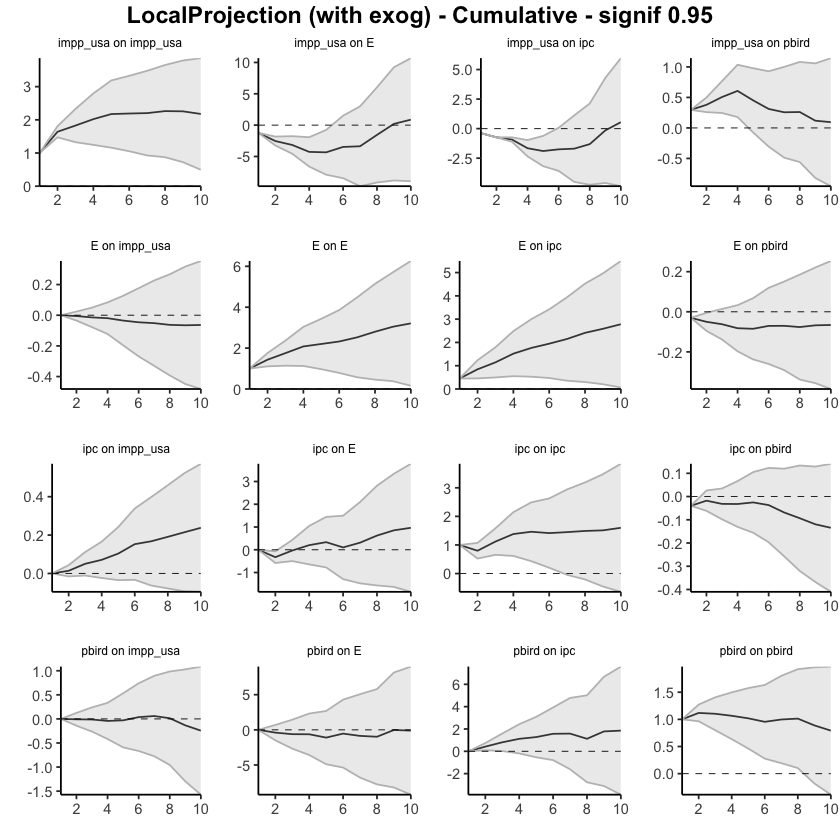

In [74]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 6, horizons=10, signif = 0.95, cumulative=TRUE, trend=1)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        1     1          0.68    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends
1 TRUE        NA     FALSE     FALSE      0          1      259 
  column_names            endog
1 impp_usa, E, ipc, pbird 4

Lags for Shock: impp_usa

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   3   6   3   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.68

impulse  response horizon irf_value  lower_bound upper_bound
1  impp_usa E         1      -1.2275356 -1.227536   -1.2275356 
2  impp_usa E         2      -2.5336026 -2.895835   -2.1713702 
3  impp_usa E         3      -3.1627212 -3.878919   -2.4465233 
4  impp_usa E         4      -4.2662388 -5.460822   -3.0716555 
5  impp_usa E         5      -4.3366726 -6.158394   -2.5149508 
6  impp_usa E         6      -3.4744590 -6.016192   -0.9327264 
7  impp_usa E         7      -3.3698058 -6.618212   -0.1213999 
8  impp_usa E         8      -1.5562471 -5.430046    2.3175520 
9  impp_usa E         9       0.2020615 -4.406313    4.8104363 
10 impp_usa E        10       0.8752383 -4.132451    5.8829274 
11 impp_usa E        11       2.3366903 -3.371963    8.0453432

impulse response horizon irf_value   lower_bound upper_bound
78 ipc     E         1       0.00000000  0.0000000   0.0000000 
79 ipc     E         2      -0.32604728 -0.4564836  -0.1956110 
80 ipc     E         3      -0.03368006 -0.2706808   0.2033207 
81 ipc     E         4       0.20255193 -0.2289620   0.6340658 
82 ipc     E         5       0.33388836 -0.2327495   0.9005262 
83 ipc     E         6       0.10293892 -0.6081403   0.8140181 
84 ipc     E         7       0.31134464 -0.6003282   1.2230175 
85 ipc     E         8       0.62319261 -0.4950609   1.7414461 
86 ipc     E         9       0.85428369 -0.4147533   2.1233206 
87 ipc     E        10       0.96500558 -0.4707511   2.4007623 
88 ipc     E        11       1.29617125 -0.2830801   2.8754226

impulse response horizon irf_value   lower_bound upper_bound
111 pbird   E         1       0.00000000  0.0000000  0.0000000  
112 pbird   E         2      -0.39553534 -0.9548478  0.1637771  
113 pbird   E         3      -0.61563396 -1.6654973  0.4342294  
114 pbird   E         4      -0.62905059 -2.1328895  0.8747883  
115 pbird   E         5      -1.10412713 -3.0357114  0.8274571  
116 pbird   E         6      -0.53533209 -2.9987482  1.9280841  
117 pbird   E         7      -0.86032172 -3.8851588  2.1645154  
118 pbird   E         8      -0.98106831 -4.4370056  2.4748690  
119 pbird   E         9      -0.02035852 -4.1922231  4.1515061  
120 pbird   E        10      -0.11140397 -4.7570469  4.5342390  
121 pbird   E        11      -0.34492821 -5.5892786  4.8994222

impulse response horizon irf_value   lower_bound upper_bound
34 E       impp_usa  1       0.00000000  0.00000000 0.00000000 
35 E       impp_usa  2      -0.00541497 -0.02031810 0.00948816 
36 E       impp_usa  3      -0.01418038 -0.04674139 0.01838063 
37 E       impp_usa  4      -0.01924420 -0.07179293 0.03330454 
38 E       impp_usa  5      -0.03477521 -0.11713655 0.04758613 
39 E       impp_usa  6      -0.04598723 -0.15944464 0.06747019 
40 E       impp_usa  7      -0.05168090 -0.19377684 0.09041505 
41 E       impp_usa  8      -0.06281398 -0.23115154 0.10552358 
42 E       impp_usa  9      -0.06558426 -0.26091276 0.12974424 
43 E       impp_usa 10      -0.06358345 -0.27661411 0.14944721 
44 E       impp_usa 11      -0.05663133 -0.28730729 0.17404463

impulse response horizon irf_value  lower_bound  upper_bound
67 ipc     impp_usa  1      0.00000000  0.000000000 0.00000000 
68 ipc     impp_usa  2      0.01391929 -0.001051706 0.02889029 
69 ipc     impp_usa  3      0.05026209  0.018988143 0.08153603 
70 ipc     impp_usa  4      0.07096596  0.022615375 0.11931655 
71 ipc     impp_usa  5      0.10349254  0.032927773 0.17405731 
72 ipc     impp_usa  6      0.15260402  0.057796922 0.24741112 
73 ipc     impp_usa  7      0.16766779  0.049944942 0.28539065 
74 ipc     impp_usa  8      0.19081814  0.053644108 0.32799218 
75 ipc     impp_usa  9      0.21459675  0.057545943 0.37164756 
76 ipc     impp_usa 10      0.23786891  0.067614944 0.40812288 
77 ipc     impp_usa 11      0.24252178  0.058787929 0.42625562

impulse response horizon irf_value    lower_bound upper_bound
100 pbird   impp_usa  1       0.000000000  0.00000000 0.00000000 
101 pbird   impp_usa  2      -0.008278826 -0.07603003 0.05947237 
102 pbird   impp_usa  3      -0.012116801 -0.14025367 0.11602007 
103 pbird   impp_usa  4      -0.042024101 -0.23356208 0.14951388 
104 pbird   impp_usa  5      -0.029787550 -0.31625000 0.25667490 
105 pbird   impp_usa  6       0.036883762 -0.32169347 0.39546100 
106 pbird   impp_usa  7       0.059768089 -0.36622079 0.48575697 
107 pbird   impp_usa  8       0.014277290 -0.48110913 0.50966371 
108 pbird   impp_usa  9      -0.134065297 -0.72767496 0.45954436 
109 pbird   impp_usa 10      -0.243393103 -0.92194964 0.43516344 
110 pbird   impp_usa 11      -0.202249256 -0.94638450 0.54188599

impulse response horizon irf_value lower_bound upper_bound
45 E       ipc       1      0.4504711 0.4504711   0.4504711  
46 E       ipc       2      0.8457226 0.6467204   1.0447248  
47 E       ipc       3      1.1447835 0.8141221   1.4754449  
48 E       ipc       4      1.5184824 1.0250530   2.0119117  
49 E       ipc       5      1.7636585 1.1332272   2.3940899  
50 E       ipc       6      1.9466781 1.1947016   2.6986546  
51 E       ipc       7      2.1501905 1.2351058   3.0652751  
52 E       ipc       8      2.4124265 1.3343088   3.4905442  
53 E       ipc       9      2.5862219 1.3715078   3.8009361  
54 E       ipc      10      2.7824094 1.3959117   4.1689071  
55 E       ipc      11      3.0023733 1.4451540   4.5595927

impulse  response horizon irf_value  lower_bound upper_bound
12 impp_usa ipc       1      -0.3804389 -0.3804389  -0.3804389 
13 impp_usa ipc       2      -0.7369209 -0.7385254  -0.7353165 
14 impp_usa ipc       3      -0.9249721 -1.0207557  -0.8291886 
15 impp_usa ipc       4      -1.6587282 -2.0115762  -1.3058802 
16 impp_usa ipc       5      -1.8966309 -2.5494739  -1.2437879 
17 impp_usa ipc       6      -1.7530376 -2.6844431  -0.8216321 
18 impp_usa ipc       7      -1.6961278 -3.1302033  -0.2620523 
19 impp_usa ipc       8      -1.3118515 -3.0666996   0.4429967 
20 impp_usa ipc       9      -0.1525222 -2.4202894   2.1152451 
21 impp_usa ipc      10       0.5477454 -2.2170276   3.3125184 
22 impp_usa ipc      11       1.2496262 -1.8565691   4.3558214

impulse response horizon irf_value lower_bound upper_bound
122 pbird   ipc       1      0.0000000  0.00000000 0.0000000  
123 pbird   ipc       2      0.4182047  0.25525561 0.5811538  
124 pbird   ipc       3      0.8053984  0.40485390 1.2059430  
125 pbird   ipc       4      1.1166316  0.45013367 1.7831296  
126 pbird   ipc       5      1.2741381  0.35040238 2.1978738  
127 pbird   ipc       6      1.5685689  0.36505416 2.7720837  
128 pbird   ipc       7      1.5862600 -0.04250671 3.2150267  
129 pbird   ipc       8      1.1208497 -0.86630359 3.1080030  
130 pbird   ipc       9      1.7821802 -0.71392094 4.2782814  
131 pbird   ipc      10      1.8522206 -1.07377521 4.7782164  
132 pbird   ipc      11      1.6407351 -1.62888310 4.9103533

impulse response horizon irf_value   lower_bound upper_bound
56 E       pbird     1      -0.03004504 -0.03004504 -0.03004504
57 E       pbird     2      -0.05002915 -0.07298106 -0.02707725
58 E       pbird     3      -0.06205309 -0.10095273 -0.02315346
59 E       pbird     4      -0.08204905 -0.14070828 -0.02338982
60 E       pbird     5      -0.08479308 -0.16269682 -0.00688934
61 E       pbird     6      -0.07043936 -0.16729823  0.02641951
62 E       pbird     7      -0.07007867 -0.18280639  0.04264904
63 E       pbird     8      -0.07624558 -0.20974266  0.05725150
64 E       pbird     9      -0.06753481 -0.21466334  0.07959372
65 E       pbird    10      -0.06583033 -0.22876656  0.09710590
66 E       pbird    11      -0.07110006 -0.25214513  0.10994502

impulse  response horizon irf_value  lower_bound upper_bound
23 impp_usa pbird     1      0.29612928  0.29612928 0.2961293  
24 impp_usa pbird     2      0.37876094  0.31771945 0.4398024  
25 impp_usa pbird     3      0.50593139  0.37264688 0.6392159  
26 impp_usa pbird     4      0.60681510  0.38806009 0.8255701  
27 impp_usa pbird     5      0.45228875  0.18379624 0.7207812  
28 impp_usa pbird     6      0.31130807 -0.00380084 0.6264170  
29 impp_usa pbird     7      0.25660369 -0.12297296 0.6361803  
30 impp_usa pbird     8      0.26086159 -0.15766465 0.6793878  
31 impp_usa pbird     9      0.11857868 -0.36072988 0.5978872  
32 impp_usa pbird    10      0.09474918 -0.44063389 0.6301322  
33 impp_usa pbird    11      0.10241960 -0.47945883 0.6842980

impulse response horizon irf_value   lower_bound upper_bound 
89 ipc     pbird     1      -0.03988857 -0.03988857 -0.039888569
90 ipc     pbird     2      -0.01779030 -0.04015378  0.004573174
91 ipc     pbird     3      -0.03160624 -0.06544461  0.002232135
92 ipc     pbird     4      -0.03211934 -0.08237264  0.018133951
93 ipc     pbird     5      -0.02527766 -0.09176619  0.041210876
94 ipc     pbird     6      -0.03672961 -0.11834837  0.044889146
95 ipc     pbird     7      -0.06866566 -0.16493998  0.027608653
96 ipc     pbird     8      -0.09329668 -0.20908540  0.022492043
97 ipc     pbird     9      -0.11939883 -0.24611359  0.007315939
98 ipc     pbird    10      -0.13453959 -0.27514835  0.006069160
99 ipc     pbird    11      -0.15820879 -0.31224990 -0.004167679

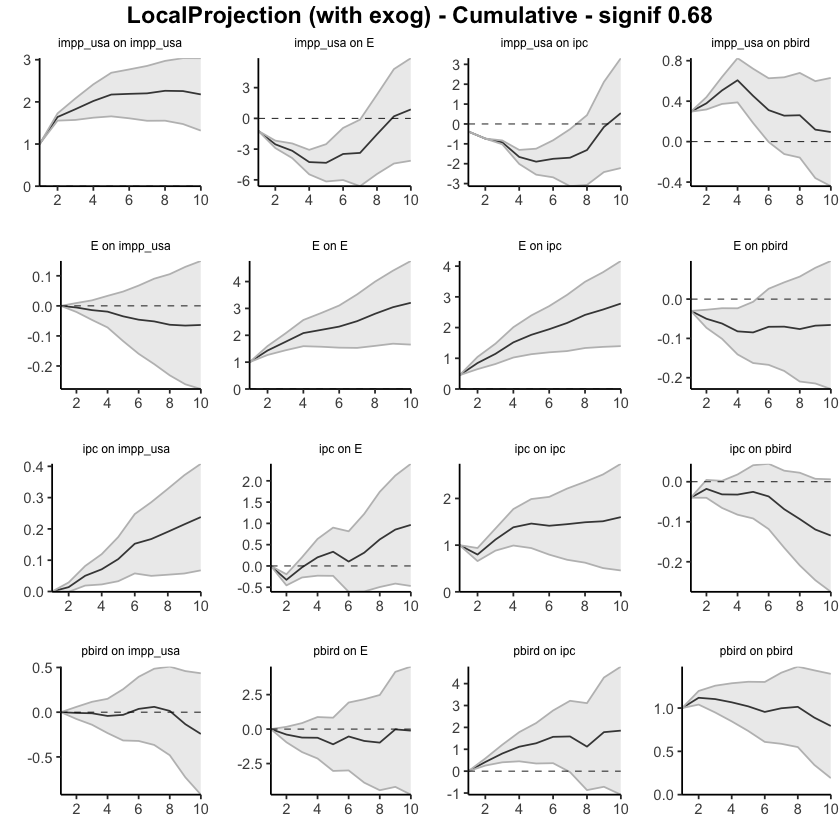

In [75]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 6, horizons=10, signif = 0.68, cumulative=TRUE, trend=1)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        2     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends
1 TRUE        NA     FALSE     FALSE      0          1      259 
  column_names            endog
1 impp_usa, E, ipc, pbird 4

Lags for Shock: impp_usa

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   2   6   1   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   2   6   1   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   2   6   1   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   2   6   1   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse  response horizon irf_value   lower_bound upper_bound
1  impp_usa E         1      -1.24696884 -1.24696884 -1.24696884
2  impp_usa E         2      -1.32565305 -2.03709330 -0.61421279
3  impp_usa E         3      -0.64125755 -1.32984732  0.04733221
4  impp_usa E         4      -1.12692898 -2.08739046 -0.16646749
5  impp_usa E         5      -0.07334616 -1.32839303  1.18170071
6  impp_usa E         6       0.85207737 -0.57778601  2.28194075
7  impp_usa E         7       0.09106919 -1.31864613  1.50078452
8  impp_usa E         8       1.75406378  0.51426115  2.99386641
9  impp_usa E         9       1.66166835  0.27441194  3.04892476
10 impp_usa E        10       0.62358814 -0.16117769  1.40835398
11 impp_usa E        11       1.34675728 -0.02312227  2.71663682

impulse response horizon irf_value  lower_bound upper_bound
78 ipc     E         1       0.0000000  0.00000000  0.00000000
79 ipc     E         2      -0.3198334 -0.57396807 -0.06569876
80 ipc     E         3       0.2970952  0.07769024  0.51650026
81 ipc     E         4       0.2441690 -0.13912168  0.62745962
82 ipc     E         5       0.1322000 -0.12638841  0.39078841
83 ipc     E         6      -0.2273829 -0.50795766  0.05319182
84 ipc     E         7       0.2074818 -0.18287742  0.59784098
85 ipc     E         8       0.2957324 -0.09520887  0.68667367
86 ipc     E         9       0.2079415 -0.07048393  0.48636701
87 ipc     E        10       0.1036274 -0.22022396  0.42747872
88 ipc     E        11       0.3039916  0.03429790  0.57368527

impulse response horizon irf_value   lower_bound upper_bound
111 pbird   E         1       0.00000000  0.0000000  0.0000000  
112 pbird   E         2      -0.39210309 -1.4642503  0.6800441  
113 pbird   E         3      -0.22033092 -1.1816446  0.7409827  
114 pbird   E         4      -0.01224491 -0.9017946  0.8773048  
115 pbird   E         5      -0.47541346 -1.3203915  0.3695646  
116 pbird   E         6       0.56893107 -0.4990926  1.6369547  
117 pbird   E         7      -0.32973435 -1.4270584  0.7675897  
118 pbird   E         8      -0.14670994 -0.9905568  0.6971369  
119 pbird   E         9       0.92019189 -0.4818930  2.3222768  
120 pbird   E        10      -0.11531154 -1.0460003  0.8153772  
121 pbird   E        11      -0.29505386 -1.5120294  0.9219217

impulse response horizon irf_value    lower_bound upper_bound
34 E       impp_usa  1       0.000000000  0.00000000 0.00000000 
35 E       impp_usa  2      -0.005729118 -0.03483842 0.02338018 
36 E       impp_usa  3      -0.009447290 -0.04429061 0.02539603 
37 E       impp_usa  4      -0.005754038 -0.04474727 0.03323919 
38 E       impp_usa  5      -0.016430066 -0.07496253 0.04210239 
39 E       impp_usa  6      -0.012046832 -0.07304353 0.04894987 
40 E       impp_usa  7      -0.006650836 -0.06259955 0.04929788 
41 E       impp_usa  8      -0.011876688 -0.06367299 0.03991961 
42 E       impp_usa  9      -0.003246567 -0.05666716 0.05017403 
43 E       impp_usa 10       0.001760933 -0.03244412 0.03596599 
44 E       impp_usa 11       0.006842309 -0.02748306 0.04116768

impulse response horizon irf_value   lower_bound  upper_bound
67 ipc     impp_usa  1      0.000000000  0.000000000 0.00000000 
68 ipc     impp_usa  2      0.014453257 -0.014683035 0.04358955 
69 ipc     impp_usa  3      0.036095829  0.004063261 0.06812840 
70 ipc     impp_usa  4      0.020358242 -0.012397693 0.05311418 
71 ipc     impp_usa  5      0.032017516 -0.011237372 0.07527240 
72 ipc     impp_usa  6      0.048566882  0.001136033 0.09599773 
73 ipc     impp_usa  7      0.014338621 -0.029875600 0.05855284 
74 ipc     impp_usa  8      0.022489779 -0.015472397 0.06045196 
75 ipc     impp_usa  9      0.023294015 -0.015696300 0.06228433 
76 ipc     impp_usa 10      0.022987482 -0.002080497 0.04805546 
77 ipc     impp_usa 11      0.004531397 -0.021385897 0.03044869

impulse response horizon irf_value    lower_bound upper_bound
100 pbird   impp_usa  1       0.000000000  0.00000000 0.00000000 
101 pbird   impp_usa  2      -0.008322555 -0.14257442 0.12592931 
102 pbird   impp_usa  3      -0.005066151 -0.12591517 0.11578287 
103 pbird   impp_usa  4      -0.030661434 -0.15393121 0.09260834 
104 pbird   impp_usa  5       0.010818765 -0.17684195 0.19847948 
105 pbird   impp_usa  6       0.065689941 -0.07759779 0.20897767 
106 pbird   impp_usa  7       0.021731142 -0.11280493 0.15626721 
107 pbird   impp_usa  8      -0.046550678 -0.18368431 0.09058296 
108 pbird   impp_usa  9      -0.149171201 -0.34021373 0.04187133 
109 pbird   impp_usa 10      -0.109891622 -0.27480756 0.05502431 
110 pbird   impp_usa 11       0.040862453 -0.08879589 0.17052080

impulse response horizon irf_value lower_bound  upper_bound
45 E       ipc       1      0.4519498  0.451949767 0.4519498  
46 E       ipc       2      0.3952319  0.005330152 0.7851336  
47 E       ipc       3      0.2990574  0.022803031 0.5753119  
48 E       ipc       4      0.3739717  0.051322109 0.6966213  
49 E       ipc       5      0.2446834 -0.021830900 0.5111976  
50 E       ipc       6      0.1830737 -0.047926426 0.4140739  
51 E       ipc       7      0.2130277 -2.139308570 2.5653640  
52 E       ipc       8      0.2603189 -0.072604640 0.5932425  
53 E       ipc       9      0.2176141 -0.160149883 0.5953781  
54 E       ipc      10      0.1772627 -0.166357848 0.5208832  
55 E       ipc      11      0.2014543 -0.152873614 0.5557821

impulse  response horizon irf_value   lower_bound upper_bound
12 impp_usa ipc       1      -0.38182766  -0.3818277 -0.38182766
13 impp_usa ipc       2      -0.36490384  -0.3624692 -0.36733845
14 impp_usa ipc       3      -0.19280718  -0.3664633 -0.01915104
15 impp_usa ipc       4      -0.73941801  -1.2809742 -0.19786186
16 impp_usa ipc       5      -0.24353240  -0.8880694  0.40100457
17 impp_usa ipc       6       0.13991270  -0.4304804  0.71030582
18 impp_usa ipc       7      -0.05094335 -11.7742884 11.67240173
19 impp_usa ipc       8       0.37809707  -0.2951208  1.05131492
20 impp_usa ipc       9       1.35783242  -1.0170987  3.73276351
21 impp_usa ipc      10       0.65734197  -0.4716562  1.78634013
22 impp_usa ipc      11       0.66109335  -2.2990206  3.62120732

impulse response horizon irf_value   lower_bound upper_bound
122 pbird   ipc       1       0.00000000   0.0000000  0.0000000 
123 pbird   ipc       2       0.41789012   0.1000401  0.7357401 
124 pbird   ipc       3       0.38715783  -0.1118474  0.8861631 
125 pbird   ipc       4       0.31130535  -0.2167061  0.8393168 
126 pbird   ipc       5       0.15720990  -0.4143473  0.7287672 
127 pbird   ipc       6       0.29442475  -0.2613965  0.8502460 
128 pbird   ipc       7       0.07154947 -15.2234356 15.3665346 
129 pbird   ipc       8      -0.46670271  -1.3652118  0.4318064 
130 pbird   ipc       9       0.83520457  -1.3612864  3.0316955 
131 pbird   ipc      10       0.04960917  -0.9424101  1.0416284 
132 pbird   ipc      11      -0.23975260  -1.1278186  0.6483134

impulse response horizon irf_value     lower_bound upper_bound
56 E       pbird     1      -0.0301357485 -0.03013575 -0.03013575
57 E       pbird     2      -0.0198757750 -0.06574036  0.02598881
58 E       pbird     3      -0.0120114547 -0.04439173  0.02036882
59 E       pbird     4      -0.0201514319 -0.05897673  0.01867386
60 E       pbird     5      -0.0027488264 -0.04046710  0.03496945
61 E       pbird     6       0.0147623055 -0.02268013  0.05220474
62 E       pbird     7       0.0006480505 -0.03102953  0.03232563
63 E       pbird     8      -0.0062603660 -0.04743946  0.03491873
64 E       pbird     9       0.0091741344 -0.01771289  0.03606116
65 E       pbird    10       0.0026406112 -0.02864430  0.03392552
66 E       pbird    11      -0.0045173152 -0.04010247  0.03106784

impulse  response horizon irf_value    lower_bound upper_bound
23 impp_usa pbird     1       0.296261332  0.29626133  0.29626133
24 impp_usa pbird     2       0.083482100 -0.04080726  0.20777146
25 impp_usa pbird     3       0.127456881 -0.01223241  0.26714617
26 impp_usa pbird     4       0.100926204 -0.06693164  0.26878405
27 impp_usa pbird     5      -0.154468890 -0.25040628 -0.05853150
28 impp_usa pbird     6      -0.140142138 -0.22880879 -0.05147549
29 impp_usa pbird     7      -0.054152931 -0.17757692  0.06927105
30 impp_usa pbird     8       0.004135949 -0.07113866  0.07941056
31 impp_usa pbird     9      -0.140781063 -0.25998243 -0.02157969
32 impp_usa pbird    10      -0.020009250 -0.12994566  0.08992716
33 impp_usa pbird    11       0.011114500 -0.08066208  0.10289108

impulse response horizon irf_value     lower_bound upper_bound 
89 ipc     pbird     1      -0.0398220657 -0.03982207 -0.039822066
90 ipc     pbird     2       0.0221315181 -0.02181052  0.066073553
91 ipc     pbird     3      -0.0138975181 -0.03701437  0.009219332
92 ipc     pbird     4      -0.0004767304 -0.03263859  0.031685129
93 ipc     pbird     5       0.0068297373 -0.02503720  0.038696679
94 ipc     pbird     6      -0.0111994183 -0.04109199  0.018693156
95 ipc     pbird     7      -0.0316837920 -0.06015676 -0.003210819
96 ipc     pbird     8      -0.0246392797 -0.06309074  0.013812177
97 ipc     pbird     9      -0.0256523943 -0.04702498 -0.004279810
98 ipc     pbird    10      -0.0141929452 -0.04096315  0.012577263
99 ipc     pbird    11      -0.0228228781 -0.04938049  0.003734734

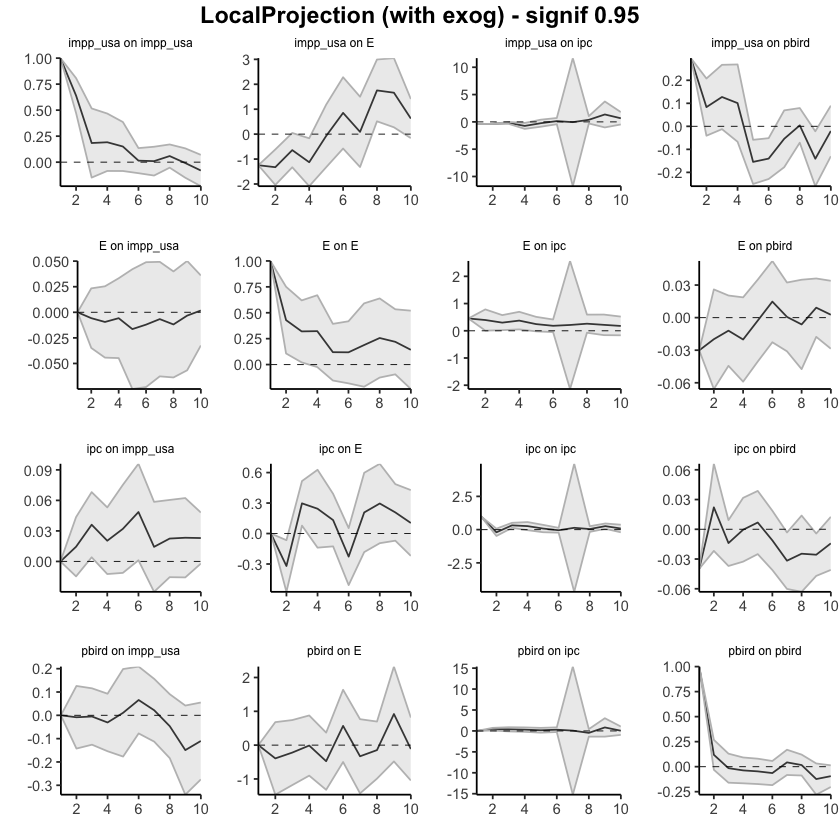

In [76]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 6, horizons=10, signif = 0.95, trend=2)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        2     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends
1 TRUE        NA     FALSE     FALSE      0          1      259 
  column_names            endog
1 impp_usa, E, ipc, pbird 4

Lags for Shock: impp_usa

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   2   6   1   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   2   6   1   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   2   6   1   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   2   6   1   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse  response horizon irf_value   lower_bound upper_bound
1  impp_usa E         1      -1.24696884 -1.246969   -1.2469688 
2  impp_usa E         2      -2.57262189 -3.284062   -1.8611816 
3  impp_usa E         3      -3.21387945 -4.613909   -1.8138494 
4  impp_usa E         4      -4.34080842 -6.701300   -1.9803169 
5  impp_usa E         5      -4.41415458 -8.029693   -0.7986162 
6  impp_usa E         6      -3.56207721 -8.607479    1.4833245 
7  impp_usa E         7      -3.47100801 -9.926125    2.9841091 
8  impp_usa E         8      -1.71694423 -9.411864    5.9779755 
9  impp_usa E         9      -0.05527589 -9.137452    9.0269002 
10 impp_usa E        10       0.56831226 -9.298630   10.4352542 
11 impp_usa E        11       1.91506953 -9.321752   13.1518910

impulse response horizon irf_value   lower_bound upper_bound
78 ipc     E         1       0.00000000  0.0000000   0.00000000
79 ipc     E         2      -0.31983341 -0.5739681  -0.06569876
80 ipc     E         3      -0.02273817 -0.4962778   0.45080150
81 ipc     E         4       0.22143081 -0.6353995   1.07826112
82 ipc     E         5       0.35363081 -0.7617879   1.46904954
83 ipc     E         6       0.12624789 -1.2697456   1.52224136
84 ipc     E         7       0.33372967 -1.4526230   2.12008234
85 ipc     E         8       0.62946207 -1.5478319   2.80675601
86 ipc     E         9       0.83740362 -1.6183158   3.29312303
87 ipc     E        10       0.94103100 -1.8385398   3.72060175
88 ipc     E        11       1.24502259 -1.8042419   4.29428702

impulse response horizon irf_value   lower_bound upper_bound
111 pbird   E         1       0.00000000   0.000000  0.0000000  
112 pbird   E         2      -0.39210309  -1.464250  0.6800441  
113 pbird   E         3      -0.61243402  -2.645895  1.4210268  
114 pbird   E         4      -0.62467893  -3.547689  2.2983316  
115 pbird   E         5      -1.10009239  -4.868081  2.6678962  
116 pbird   E         6      -0.53116132  -5.367174  4.3048509  
117 pbird   E         7      -0.86089567  -6.794232  5.0724406  
118 pbird   E         8      -1.00760561  -7.784789  5.7695776  
119 pbird   E         9      -0.08741372  -8.266682  8.0918544  
120 pbird   E        10      -0.20272526  -9.312682  8.9072316  
121 pbird   E        11      -0.49777912 -10.824711  9.8291533

impulse response horizon irf_value    lower_bound upper_bound
34 E       impp_usa  1       0.000000000  0.00000000 0.00000000 
35 E       impp_usa  2      -0.005729118 -0.03483842 0.02338018 
36 E       impp_usa  3      -0.015176408 -0.07912903 0.04877621 
37 E       impp_usa  4      -0.020930446 -0.12387630 0.08201540 
38 E       impp_usa  5      -0.037360512 -0.19883882 0.12411780 
39 E       impp_usa  6      -0.049407344 -0.27188236 0.17306767 
40 E       impp_usa  7      -0.056058180 -0.33448190 0.22236555 
41 E       impp_usa  8      -0.067934868 -0.39815489 0.26228516 
42 E       impp_usa  9      -0.071181435 -0.45482205 0.31245918 
43 E       impp_usa 10      -0.069420502 -0.48726618 0.34842517 
44 E       impp_usa 11      -0.062578193 -0.51474924 0.38959285

impulse response horizon irf_value  lower_bound upper_bound
67 ipc     impp_usa  1      0.00000000  0.00000000 0.00000000 
68 ipc     impp_usa  2      0.01445326 -0.01468304 0.04358955 
69 ipc     impp_usa  3      0.05054909 -0.01061977 0.11171795 
70 ipc     impp_usa  4      0.07090733 -0.02301747 0.16483212 
71 ipc     impp_usa  5      0.10292484 -0.03425484 0.24010453 
72 ipc     impp_usa  6      0.15149173 -0.03311881 0.33610226 
73 ipc     impp_usa  7      0.16583035 -0.06299441 0.39465510 
74 ipc     impp_usa  8      0.18832013 -0.07846680 0.45510706 
75 ipc     impp_usa  9      0.21161414 -0.09416310 0.51739139 
76 ipc     impp_usa 10      0.23460162 -0.09624360 0.56544685 
77 ipc     impp_usa 11      0.23913302 -0.11762950 0.59589554

impulse response horizon irf_value    lower_bound upper_bound
100 pbird   impp_usa  1       0.000000000  0.0000000  0.0000000  
101 pbird   impp_usa  2      -0.008322555 -0.1425744  0.1259293  
102 pbird   impp_usa  3      -0.013388705 -0.2684896  0.2417122  
103 pbird   impp_usa  4      -0.044050140 -0.4224208  0.3343205  
104 pbird   impp_usa  5      -0.033231375 -0.5992627  0.5328000  
105 pbird   impp_usa  6       0.032458566 -0.6768605  0.7417777  
106 pbird   impp_usa  7       0.054189707 -0.7896655  0.8980449  
107 pbird   impp_usa  8       0.007639029 -0.9733498  0.9886278  
108 pbird   impp_usa  9      -0.141532172 -1.3135635  1.0304992  
109 pbird   impp_usa 10      -0.251423795 -1.5883711  1.0855235  
110 pbird   impp_usa 11      -0.210561341 -1.6771670  1.2560443

impulse response horizon irf_value lower_bound upper_bound
45 E       ipc       1      0.4519498  0.4519498  0.4519498  
46 E       ipc       2      0.8471816  0.4572799  1.2370834  
47 E       ipc       3      1.1462391  0.4800830  1.8123952  
48 E       ipc       4      1.5202108  0.5314051  2.5090165  
49 E       ipc       5      1.7648942  0.5095742  3.0202142  
50 E       ipc       6      1.9479679  0.4616477  3.4342880  
51 E       ipc       7      2.1609956 -1.6776608  5.9996521  
52 E       ipc       8      2.4213145 -1.7502655  6.5928945  
53 E       ipc       9      2.6389286 -1.9104154  7.1882726  
54 E       ipc      10      2.8161913 -2.0767732  7.7091559  
55 E       ipc      11      3.0176456 -2.2296468  8.2649380

impulse  response horizon irf_value   lower_bound upper_bound
12 impp_usa ipc       1      -0.38182766  -0.3818277 -0.3818277 
13 impp_usa ipc       2      -0.74673149  -0.7442969 -0.7491661 
14 impp_usa ipc       3      -0.93953868  -1.1107602 -0.7683171 
15 impp_usa ipc       4      -1.67895669  -2.3917344 -0.9661790 
16 impp_usa ipc       5      -1.92248909  -3.2798037 -0.5651744 
17 impp_usa ipc       6      -1.78257639  -3.7102842  0.1451314 
18 impp_usa ipc       7      -1.83351973 -15.4845726 11.8175331 
19 impp_usa ipc       8      -1.45542266 -15.7796934 12.8688480 
20 impp_usa ipc       9      -0.09759024 -16.7967920 16.6016115 
21 impp_usa ipc      10       0.55975173 -17.2684482 18.3879517 
22 impp_usa ipc      11       1.22084508 -19.5674688 22.0091590

impulse response horizon irf_value lower_bound  upper_bound
122 pbird   ipc       1      0.0000000   0.00000000  0.0000000 
123 pbird   ipc       2      0.4178901   0.10004010  0.7357401 
124 pbird   ipc       3      0.8050479  -0.01180735  1.6219032 
125 pbird   ipc       4      1.1163533  -0.22851349  2.4612201 
126 pbird   ipc       5      1.2735632  -0.64286084  3.1899872 
127 pbird   ipc       6      1.5679879  -0.90425734  4.0402332 
128 pbird   ipc       7      1.6395374 -16.12769295 19.4067678 
129 pbird   ipc       8      1.1728347 -17.49290477 19.8385742 
130 pbird   ipc       9      2.0080393 -18.85419114 22.8702697 
131 pbird   ipc      10      2.0576484 -19.79660124 23.9118981 
132 pbird   ipc      11      1.8178958 -20.92441985 24.5602115

impulse response horizon irf_value   lower_bound upper_bound 
56 E       pbird     1      -0.03013575 -0.03013575 -0.030135749
57 E       pbird     2      -0.05001152 -0.09587611 -0.004146935
58 E       pbird     3      -0.06202298 -0.14026784  0.016221887
59 E       pbird     4      -0.08217441 -0.19924457  0.034895749
60 E       pbird     5      -0.08492324 -0.23971167  0.069865196
61 E       pbird     6      -0.07016093 -0.26239180  0.122069935
62 E       pbird     7      -0.06951288 -0.29342133  0.154395569
63 E       pbird     8      -0.07577325 -0.34086079  0.189314300
64 E       pbird     9      -0.06659911 -0.35857368  0.225375458
65 E       pbird    10      -0.06395850 -0.38721798  0.259300982
66 E       pbird    11      -0.06847582 -0.42732045  0.290368822

impulse  response horizon irf_value lower_bound upper_bound
23 impp_usa pbird     1      0.2962613  0.29626133 0.2962613  
24 impp_usa pbird     2      0.3797434  0.25545408 0.5040328  
25 impp_usa pbird     3      0.5072003  0.24322167 0.7711790  
26 impp_usa pbird     4      0.6081265  0.17629002 1.0399630  
27 impp_usa pbird     5      0.4536576 -0.07411625 0.9814315  
28 impp_usa pbird     6      0.3135155 -0.30292504 0.9299560  
29 impp_usa pbird     7      0.2593626 -0.48050196 0.9992271  
30 impp_usa pbird     8      0.2634985 -0.55164062 1.0786376  
31 impp_usa pbird     9      0.1227174 -0.81162305 1.0570579  
32 impp_usa pbird    10      0.1027082 -0.94156871 1.1469851  
33 impp_usa pbird    11      0.1138227 -1.02223079 1.2498762

impulse response horizon irf_value   lower_bound upper_bound
89 ipc     pbird     1      -0.03982207 -0.03982207 -0.03982207
90 ipc     pbird     2      -0.01769055 -0.06163258  0.02625149
91 ipc     pbird     3      -0.03158807 -0.09864695  0.03547082
92 ipc     pbird     4      -0.03206480 -0.13128554  0.06715595
93 ipc     pbird     5      -0.02523506 -0.15632274  0.10585263
94 ipc     pbird     6      -0.03643448 -0.19741474  0.12454578
95 ipc     pbird     7      -0.06811827 -0.25757150  0.12133496
96 ipc     pbird     8      -0.09275755 -0.32066224  0.13514714
97 ipc     pbird     9      -0.11840994 -0.36768722  0.13086733
98 ipc     pbird    10      -0.13260289 -0.40865037  0.14344459
99 ipc     pbird    11      -0.15542577 -0.45803086  0.14717933

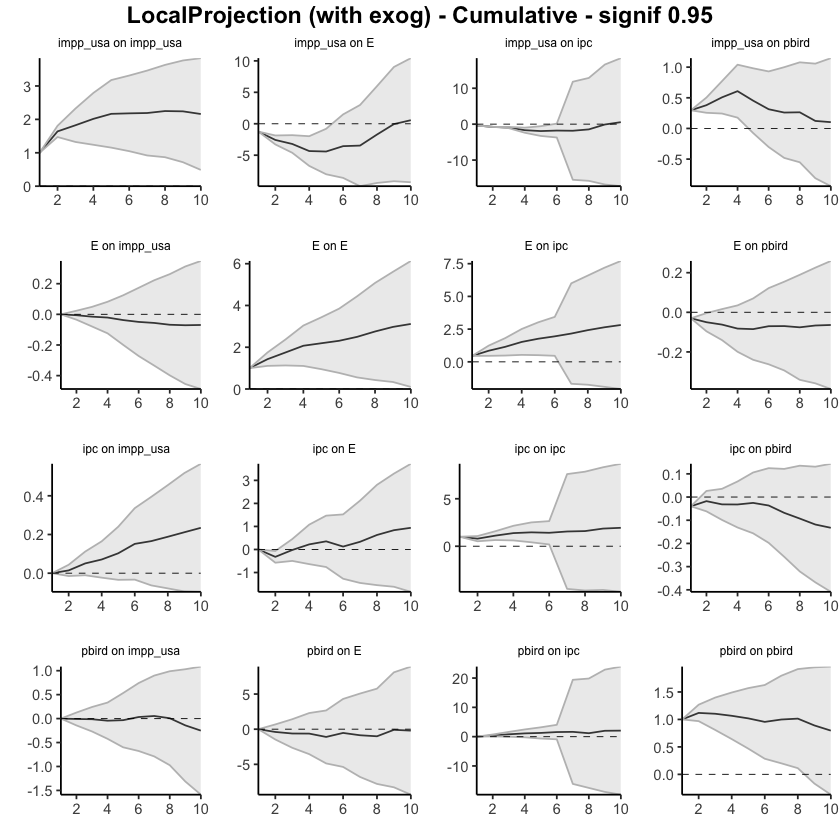

In [77]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 6, horizons=10, signif = 0.95, cumulative=TRUE, trend=2)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        2     1          0.68    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends
1 TRUE        NA     FALSE     FALSE      0          1      259 
  column_names            endog
1 impp_usa, E, ipc, pbird 4

Lags for Shock: impp_usa

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   2   6   1   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   2   6   1   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   2   6   1   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 impp_usa 3   1   1   1   1   1   1   1   1   1   
2 E        6   6   5   6   6   2   1   1   2   1   
3 ipc      6   6   6   6   6   2   6   1   2   2   
4 pbird    1   4   2   1   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.68

impulse  response horizon irf_value   lower_bound upper_bound
1  impp_usa E         1      -1.24696884 -1.246969   -1.2469688 
2  impp_usa E         2      -2.57262189 -2.935602   -2.2096422 
3  impp_usa E         3      -3.21387945 -3.928180   -2.4995784 
4  impp_usa E         4      -4.34080842 -5.545141   -3.1364760 
5  impp_usa E         5      -4.41415458 -6.258817   -2.5694921 
6  impp_usa E         6      -3.56207721 -6.136262   -0.9878926 
7  impp_usa E         7      -3.47100801 -6.764435   -0.1775809 
8  impp_usa E         8      -1.71694423 -5.642924    2.2090352 
9  impp_usa E         9      -0.05527589 -4.689039    4.5784874 
10 impp_usa E        10       0.56831226 -4.465842    5.6024663 
11 impp_usa E        11       1.91506953 -3.818003    7.6481417

impulse response horizon irf_value   lower_bound upper_bound
78 ipc     E         1       0.00000000  0.0000000   0.0000000 
79 ipc     E         2      -0.31983341 -0.4494940  -0.1901729 
80 ipc     E         3      -0.02273817 -0.2643400   0.2188637 
81 ipc     E         4       0.22143081 -0.2157275   0.6585891 
82 ipc     E         5       0.35363081 -0.2154604   0.9227220 
83 ipc     E         6       0.12624789 -0.5859937   0.8384895 
84 ipc     E         7       0.33372967 -0.5776748   1.2451341 
85 ipc     E         8       0.62946207 -0.4814022   1.7403263 
86 ipc     E         9       0.83740362 -0.4155145   2.0903217 
87 ipc     E        10       0.94103100 -0.4771173   2.3591793 
88 ipc     E        11       1.24502259 -0.3107246   2.8007697

impulse response horizon irf_value   lower_bound upper_bound
111 pbird   E         1       0.00000000  0.000000   0.0000000  
112 pbird   E         2      -0.39210309 -0.939117   0.1549108  
113 pbird   E         3      -0.61243402 -1.649914   0.4250460  
114 pbird   E         4      -0.62467893 -2.116011   0.8666530  
115 pbird   E         5      -1.10009239 -3.022536   0.8223507  
116 pbird   E         6      -0.53116132 -2.998514   1.9361918  
117 pbird   E         7      -0.86089567 -3.888108   2.1663167  
118 pbird   E         8      -1.00760561 -4.465352   2.4501409  
119 pbird   E         9      -0.08741372 -4.260510   4.0856823  
120 pbird   E        10      -0.20272526 -4.850662   4.4452119  
121 pbird   E        11      -0.49777912 -5.766622   4.7710639

impulse response horizon irf_value    lower_bound upper_bound
34 E       impp_usa  1       0.000000000  0.00000000 0.000000000
35 E       impp_usa  2      -0.005729118 -0.02058080 0.009122565
36 E       impp_usa  3      -0.015176408 -0.04780530 0.017452480
37 E       impp_usa  4      -0.020930446 -0.07345384 0.031592947
38 E       impp_usa  5      -0.037360512 -0.11974741 0.045026381
39 E       impp_usa  6      -0.049407344 -0.16291500 0.064100315
40 E       impp_usa  7      -0.056058180 -0.19811110 0.085994741
41 E       impp_usa  8      -0.067934868 -0.23641447 0.100544737
42 E       impp_usa  9      -0.071181435 -0.26691644 0.124553574
43 E       impp_usa 10      -0.069420502 -0.28260707 0.143766067
44 E       impp_usa 11      -0.062578193 -0.29327771 0.168121319

impulse response horizon irf_value  lower_bound   upper_bound
67 ipc     impp_usa  1      0.00000000  0.0000000000 0.00000000 
68 ipc     impp_usa  2      0.01445326 -0.0004121982 0.02931871 
69 ipc     impp_usa  3      0.05054909  0.0193404837 0.08175769 
70 ipc     impp_usa  4      0.07090733  0.0229865142 0.11882814 
71 ipc     impp_usa  5      0.10292484  0.0329352098 0.17291448 
72 ipc     impp_usa  6      0.15149173  0.0573026788 0.24568077 
73 ipc     impp_usa  7      0.16583035  0.0490830237 0.28257767 
74 ipc     impp_usa  8      0.18832013  0.0522043456 0.32443591 
75 ipc     impp_usa  9      0.21161414  0.0556053429 0.36762294 
76 ipc     impp_usa 10      0.23460162  0.0658030401 0.40340021 
77 ipc     impp_usa 11      0.23913302  0.0571113276 0.42115471

impulse response horizon irf_value    lower_bound upper_bound
100 pbird   impp_usa  1       0.000000000  0.0000000  0.0000000  
101 pbird   impp_usa  2      -0.008322555 -0.0768184  0.0601733  
102 pbird   impp_usa  3      -0.013388705 -0.1435422  0.1167648  
103 pbird   impp_usa  4      -0.044050140 -0.2370964  0.1489961  
104 pbird   impp_usa  5      -0.033231375 -0.3220229  0.2555601  
105 pbird   impp_usa  6       0.032458566 -0.3294389  0.3943561  
106 pbird   impp_usa  7       0.054189707 -0.3763486  0.4847281  
107 pbird   impp_usa  8       0.007639029 -0.4928655  0.5081435  
108 pbird   impp_usa  9      -0.141532172 -0.7395073  0.4564430  
109 pbird   impp_usa 10      -0.251423795 -0.9335397  0.4306922  
110 pbird   impp_usa 11      -0.210561341 -0.9588295  0.5377068

impulse response horizon irf_value lower_bound upper_bound
45 E       ipc       1      0.4519498 0.4519498   0.4519498  
46 E       ipc       2      0.8471816 0.6482522   1.0461111  
47 E       ipc       3      1.1462391 0.8063635   1.4861147  
48 E       ipc       4      1.5202108 1.0157181   2.0247035  
49 E       ipc       5      1.7648942 1.1244248   2.4053636  
50 E       ipc       6      1.9479679 1.1896413   2.7062945  
51 E       ipc       7      2.1609956 0.2024974   4.1194938  
52 E       ipc       8      2.4213145 0.2929574   4.5496717  
53 E       ipc       9      2.6389286 0.3178348   4.9600225  
54 E       ipc      10      2.8161913 0.3197808   5.3126018  
55 E       ipc      11      3.0176456 0.3404556   5.6948356

impulse  response horizon irf_value   lower_bound upper_bound
12 impp_usa ipc       1      -0.38182766 -0.3818277  -0.3818277 
13 impp_usa ipc       2      -0.74673149 -0.7454893  -0.7479736 
14 impp_usa ipc       3      -0.93953868 -1.0268966  -0.8521807 
15 impp_usa ipc       4      -1.67895669 -2.0426188  -1.3152946 
16 impp_usa ipc       5      -1.92248909 -2.6149966  -1.2299816 
17 impp_usa ipc       6      -1.78257639 -2.7661008  -0.7990520 
18 impp_usa ipc       7      -1.83351973 -8.7983426   5.1313032 
19 impp_usa ipc       8      -1.45542266 -8.7637240   5.8528787 
20 impp_usa ipc       9      -0.09759024 -8.6175912   8.4224107 
21 impp_usa ipc      10       0.55975173 -8.5362687   9.6557721 
22 impp_usa ipc      11       1.22084508 -9.3854375  11.8271277

impulse response horizon irf_value lower_bound upper_bound
122 pbird   ipc       1      0.0000000  0.0000000   0.0000000 
123 pbird   ipc       2      0.4178901  0.2557217   0.5800585 
124 pbird   ipc       3      0.8050479  0.3882850   1.2218108 
125 pbird   ipc       4      1.1163533  0.4301968   1.8025098 
126 pbird   ipc       5      1.2735632  0.2957958   2.2513306 
127 pbird   ipc       6      1.5679879  0.3066383   2.8293376 
128 pbird   ipc       7      1.6395374 -7.4253760  10.7044509 
129 pbird   ipc       8      1.1728347 -8.3505018  10.6961712 
130 pbird   ipc       9      2.0080393 -8.6359558  12.6520344 
131 pbird   ipc      10      2.0576484 -9.0924789  13.2077758 
132 pbird   ipc      11      1.8178958 -9.7853264  13.4211181

impulse response horizon irf_value   lower_bound upper_bound 
56 E       pbird     1      -0.03013575 -0.03013575 -0.030135749
57 E       pbird     2      -0.05001152 -0.07341182 -0.026611223
58 E       pbird     3      -0.06202298 -0.10194383 -0.022102129
59 E       pbird     4      -0.08217441 -0.14190408 -0.022444737
60 E       pbird     5      -0.08492324 -0.16389693 -0.005949547
61 E       pbird     6      -0.07016093 -0.16823790  0.027916041
62 E       pbird     7      -0.06951288 -0.18375189  0.044726124
63 E       pbird     8      -0.07577325 -0.21102199  0.059475501
64 E       pbird     9      -0.06659911 -0.21556573  0.082367505
65 E       pbird    10      -0.06395850 -0.22888681  0.100969806
66 E       pbird    11      -0.06847582 -0.25155982  0.114608183

impulse  response horizon irf_value lower_bound   upper_bound
23 impp_usa pbird     1      0.2962613  0.2962613320 0.2962613  
24 impp_usa pbird     2      0.3797434  0.3163304950 0.4431564  
25 impp_usa pbird     3      0.5072003  0.3725173310 0.6418833  
26 impp_usa pbird     4      0.6081265  0.3878017755 0.8284513  
27 impp_usa pbird     5      0.4536576  0.1843852389 0.7229300  
28 impp_usa pbird     6      0.3135155 -0.0009949859 0.6280260  
29 impp_usa pbird     7      0.2593626 -0.1181193375 0.6368445  
30 impp_usa pbird     8      0.2634985 -0.1523888021 0.6793858  
31 impp_usa pbird     9      0.1227174 -0.3539868896 0.5994218  
32 impp_usa pbird    10      0.1027082 -0.4300861429 0.6355025  
33 impp_usa pbird    11      0.1138227 -0.4657964284 0.6934418

impulse response horizon irf_value   lower_bound upper_bound 
89 ipc     pbird     1      -0.03982207 -0.03982207 -0.039822066
90 ipc     pbird     2      -0.01769055 -0.04010995  0.004728858
91 ipc     pbird     3      -0.03158807 -0.06580178  0.002625651
92 ipc     pbird     4      -0.03206480 -0.08268762  0.018558032
93 ipc     pbird     5      -0.02523506 -0.09211653  0.041646414
94 ipc     pbird     6      -0.03643448 -0.11856726  0.045698309
95 ipc     pbird     7      -0.06811827 -0.16477808  0.028541544
96 ipc     pbird     8      -0.09275755 -0.20903545  0.023520354
97 ipc     pbird     9      -0.11840994 -0.24559223  0.008772340
98 ipc     pbird    10      -0.13260289 -0.27344344  0.008237664
99 ipc     pbird    11      -0.15542577 -0.30981612 -0.001035412

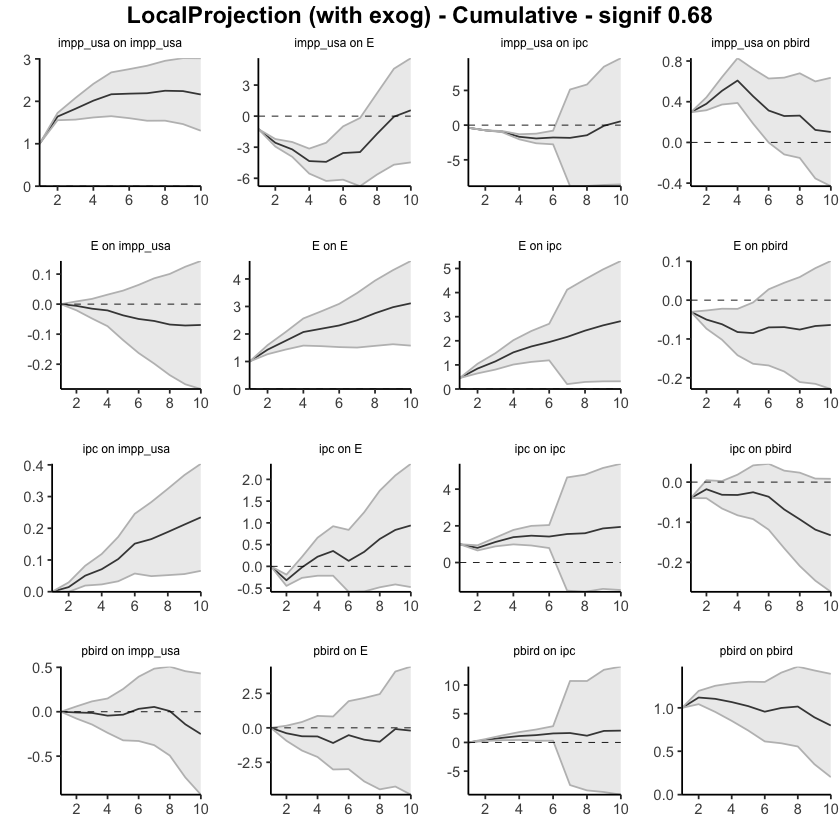

In [78]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 6, horizons=10, signif = 0.68, cumulative=TRUE, trend=2)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   2   1   1   2   1   
2 ipc      2   2   1   1   2   2   1   1   2   2   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   2   1   1   2   1   
2 ipc      2   2   1   1   2   2   1   1   2   2   
3 pbird    1   1   1   1   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   2   1   1   2   1   
2 ipc      2   2   1   1   2   2   1   1   2   2   
3 pbird    1   1   1   1   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.00000000 0.0000000  
24 ipc     E         2      -0.40051319 -0.95771381 0.1566874  
25 ipc     E         3       0.05883821 -0.33217316 0.4498496  
26 ipc     E         4       0.05598193 -0.47638477 0.5883486  
27 ipc     E         5       0.27160971 -0.10062614 0.6438456  
28 ipc     E         6      -0.11228784 -0.44904552 0.2244698  
29 ipc     E         7       0.19882722 -0.17099105 0.5686455  
30 ipc     E         8       0.27278000 -0.10951259 0.6550726  
31 ipc     E         9       0.19143905 -0.10157326 0.4844514  
32 ipc     E        10       0.07215637 -0.22683028 0.3711430  
33 ipc     E        11       0.29883812  0.05800689 0.5396694

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000  0.0000000  0.0000000  
46 pbird   E         2      -0.8077640 -1.8765052  0.2609773  
47 pbird   E         3      -0.4248277 -1.3462562  0.4966009  
48 pbird   E         4      -0.4101449 -1.5208803  0.7005905  
49 pbird   E         5      -0.6988815 -1.6324851  0.2347221  
50 pbird   E         6       0.3391636 -0.6805032  1.3588303  
51 pbird   E         7      -0.5053199 -1.5649207  0.5542809  
52 pbird   E         8      -0.1838465 -0.9188565  0.5511635  
53 pbird   E         9       0.7236151 -0.4742679  1.9214981  
54 pbird   E        10      -0.1743863 -1.0269768  0.6782042  
55 pbird   E        11      -0.1908284 -1.2852146  0.9035577

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4765955  0.47659554 0.4765955  
2  E       ipc       2      0.4907674 -0.23434174 1.2158764  
3  E       ipc       3      0.1880842 -0.34922566 0.7253941  
4  E       ipc       4      0.3391334 -0.17245094 0.8507177  
5  E       ipc       5      0.2158370 -0.13170643 0.5633805  
6  E       ipc       6      0.1487586 -0.19029324 0.4878105  
7  E       ipc       7      0.1548686 -0.14374522 0.4534824  
8  E       ipc       8      0.2315632 -0.06744696 0.5305734  
9  E       ipc       9      0.2104948 -0.02199667 0.4429863  
10 E       ipc      10      0.1681649 -0.14372120 0.4800509  
11 E       ipc      11      0.1892578 -0.14346000 0.5219757

impulse response horizon irf_value   lower_bound upper_bound
56 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.05880875 -0.3657259  0.4833434  
58 pbird   ipc       3       0.11252297 -0.3681450  0.5931910  
59 pbird   ipc       4       0.03541645 -0.5767574  0.6475903  
60 pbird   ipc       5      -0.12596953 -0.8767007  0.6247616  
61 pbird   ipc       6       0.09990296 -0.6472706  0.8470766  
62 pbird   ipc       7      -0.19351222 -0.8415211  0.4544966  
63 pbird   ipc       8      -0.17984861 -0.9153584  0.5556612  
64 pbird   ipc       9       0.63482397 -0.3312591  1.6009071  
65 pbird   ipc      10      -0.10284002 -0.8617566  0.6560765  
66 pbird   ipc      11      -0.29123343 -0.9473422  0.3648754

impulse response horizon irf_value     lower_bound upper_bound
12 E       pbird     1      -0.0426387857 -0.04263879 -0.04263879
13 E       pbird     2      -0.0209459831 -0.06020035  0.01830838
14 E       pbird     3      -0.0025164794 -0.05667307  0.05164012
15 E       pbird     4      -0.0133140718 -0.05217131  0.02554316
16 E       pbird     5       0.0023084711 -0.02786713  0.03248407
17 E       pbird     6       0.0124890415 -0.01829235  0.04327043
18 E       pbird     7       0.0003849714 -0.02733183  0.02810177
19 E       pbird     8      -0.0076131346 -0.04805040  0.03282413
20 E       pbird     9       0.0092151073 -0.01473190  0.03316212
21 E       pbird    10       0.0031118949 -0.02476340  0.03098719
22 E       pbird    11      -0.0030523462 -0.03032127  0.02421658

impulse response horizon irf_value    lower_bound  upper_bound 
34 ipc     pbird     1      -0.032975483 -0.032975483 -0.032975483
35 ipc     pbird     2       0.034196279 -0.004483153  0.072875710
36 ipc     pbird     3      -0.004229734 -0.046575209  0.038115741
37 ipc     pbird     4       0.014996205 -0.014771145  0.044763556
38 ipc     pbird     5       0.009698416 -0.018479485  0.037876317
39 ipc     pbird     6      -0.003605605 -0.032390249  0.025179039
40 ipc     pbird     7      -0.024019988 -0.052634021  0.004594046
41 ipc     pbird     8      -0.021654305 -0.063167657  0.019859046
42 ipc     pbird     9      -0.019728810 -0.043062287  0.003604667
43 ipc     pbird    10      -0.009817201 -0.037284528  0.017650125
44 ipc     pbird    11      -0.017246917 -0.040427428  0.005933593

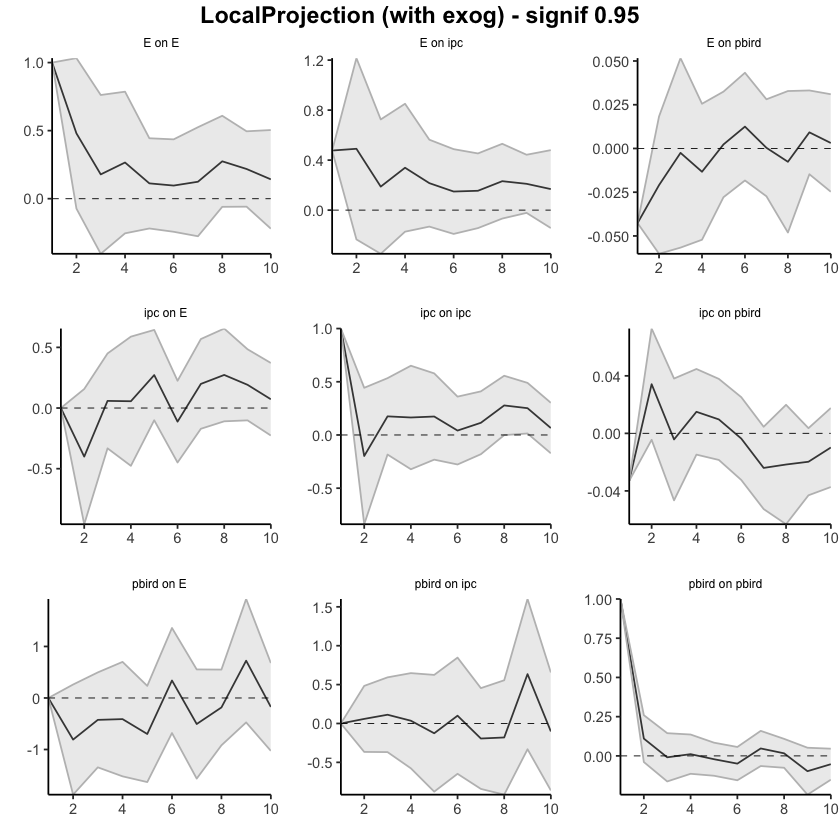

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 6, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   2   
2 ipc      6   6   6   6   6   2   6   6   2   3   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   2   
2 ipc      6   6   6   6   6   2   6   6   2   3   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   2   
2 ipc      6   6   6   6   6   2   6   6   2   3   
3 pbird    1   1   1   1   1   1   1   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.00000000
24 ipc     E         2      -0.32711765 -0.5872257  -0.06700957
25 ipc     E         3      -0.03560209 -0.5092303   0.43802614
26 ipc     E         4       0.20762882 -0.6504677   1.06572532
27 ipc     E         5       0.33640578 -0.7909931   1.46380465
28 ipc     E         6       0.10486663 -1.3112451   1.52097834
29 ipc     E         7       0.32207445 -1.5318312   2.17598011
30 ipc     E         8       0.63135931 -1.6173090   2.88002762
31 ipc     E         9       0.85776499 -1.6755172   3.39104721
32 ipc     E        10       0.96625178 -1.8989974   3.83150091
33 ipc     E        11       1.11634252 -2.0765480   4.30923303

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000   0.000000  0.0000000  
46 pbird   E         2      -0.3944964  -1.488261  0.6992684  
47 pbird   E         3      -0.6254698  -2.676575  1.4256358  
48 pbird   E         4      -0.6378602  -3.565654  2.2899340  
49 pbird   E         5      -1.1331532  -4.889004  2.6226980  
50 pbird   E         6      -0.5922238  -5.374259  4.1898112  
51 pbird   E         7      -0.8659548  -6.699483  4.9675732  
52 pbird   E         8      -0.8267938  -7.590445  5.9368569  
53 pbird   E         9       0.1483007  -7.904337  8.2009383  
54 pbird   E        10      -0.0462899  -8.999327  8.9067475  
55 pbird   E        11      -0.5261833 -10.617945  9.5655788

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4402139  0.44021392 0.4402139  
2  E       ipc       2      0.8349094  0.44940933 1.2204095  
3  E       ipc       3      1.1283117  0.49277662 1.7638469  
4  E       ipc       4      1.4972738  0.54876680 2.4457809  
5  E       ipc       5      1.7406414  0.52939575 2.9518871  
6  E       ipc       6      1.9222038  0.47704045 3.3673672  
7  E       ipc       7      2.1428587  0.34022632 3.9454911  
8  E       ipc       8      2.4074225  0.29037026 4.5244747  
9  E       ipc       9      2.5966313  0.17166751 5.0215951  
10 E       ipc      10      2.8040652  0.02893376 5.5791966  
11 E       ipc      11      2.9836584 -0.08189266 6.0492095

impulse response horizon irf_value lower_bound  upper_bound
56 pbird   ipc       1      0.0000000  0.000000000 0.0000000  
57 pbird   ipc       2      0.4142124  0.094117571 0.7343072  
58 pbird   ipc       3      0.7990265  0.008518373 1.5895347  
59 pbird   ipc       4      1.1064555 -0.208406819 2.4213177  
60 pbird   ipc       5      1.2622599 -0.549199688 3.0737195  
61 pbird   ipc       6      1.5522856 -0.812410996 3.9169821  
62 pbird   ipc       7      1.6647703 -1.371992203 4.7015328  
63 pbird   ipc       8      1.2008541 -2.545913036 4.9476212  
64 pbird   ipc       9      1.8324595 -2.986288011 6.6512071  
65 pbird   ipc      10      1.8694304 -3.724482800 7.4633435  
66 pbird   ipc      11      1.6933603 -4.518042144 7.9047627

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.03537471 -0.03537471 -0.03537471
13 E       pbird     2      -0.05482257 -0.09776332 -0.01188182
14 E       pbird     3      -0.06376426 -0.14295457  0.01542605
15 E       pbird     4      -0.07725326 -0.19577103  0.04126451
16 E       pbird     5      -0.07636968 -0.22916161  0.07642226
17 E       pbird     6      -0.06289914 -0.25000958  0.12421130
18 E       pbird     7      -0.06261919 -0.27951330  0.15427492
19 E       pbird     8      -0.06202284 -0.32308844  0.19904277
20 E       pbird     9      -0.05529515 -0.34041927  0.22982897
21 E       pbird    10      -0.05338387 -0.37144529  0.26467755
22 E       pbird    11      -0.05557095 -0.41084426  0.29970236

impulse response horizon irf_value    lower_bound upper_bound
34 ipc     pbird     1      -0.037168975 -0.03716897 -0.03716897
35 ipc     pbird     2      -0.015974857 -0.05646402  0.02451431
36 ipc     pbird     3      -0.025223491 -0.09959290  0.04914592
37 ipc     pbird     4      -0.016851252 -0.12325321  0.08955071
38 ipc     pbird     5      -0.007123761 -0.14312153  0.12887401
39 ipc     pbird     6      -0.016983557 -0.18227788  0.14831077
40 ipc     pbird     7      -0.042725000 -0.23790700  0.15245700
41 ipc     pbird     8      -0.057793438 -0.29445572  0.17886885
42 ipc     pbird     9      -0.081456572 -0.34022118  0.17730804
43 ipc     pbird    10      -0.092831353 -0.38274785  0.19708514
44 ipc     pbird    11      -0.114861834 -0.43389984  0.20417617

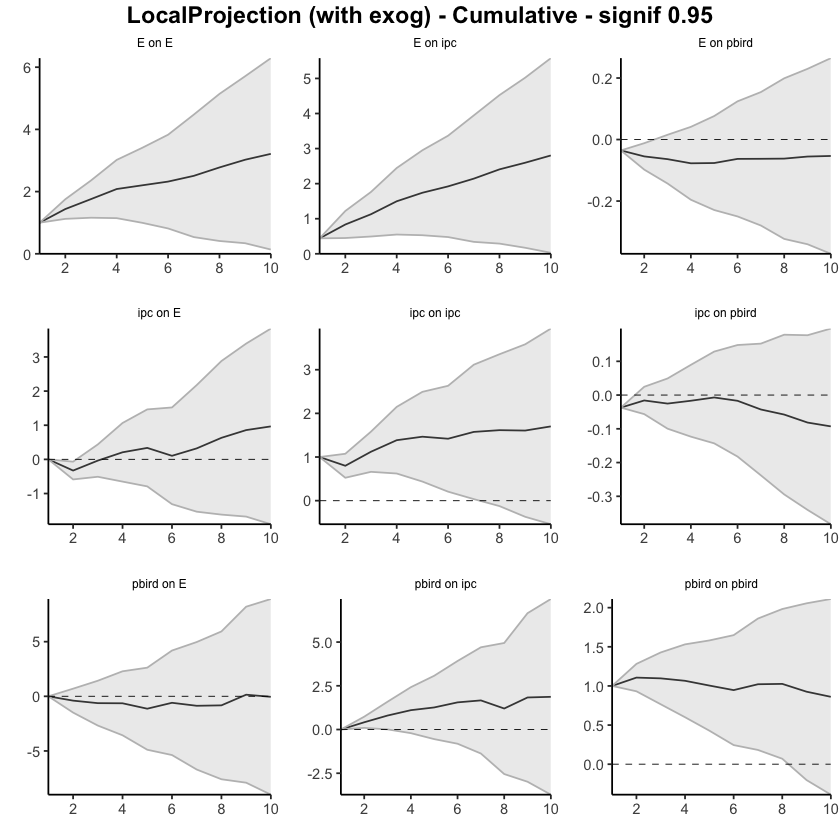

In [79]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 6, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        0     1          0.68    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   2   
2 ipc      6   6   6   6   6   2   6   6   2   3   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   2   
2 ipc      6   6   6   6   6   2   6   6   2   3   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   2   
2 ipc      6   6   6   6   6   2   6   6   2   3   
3 pbird    1   1   1   1   1   1   1   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.68

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.0000000 
24 ipc     E         2      -0.32711765 -0.4598258  -0.1944094 
25 ipc     E         3      -0.03560209 -0.2772492   0.2060450 
26 ipc     E         4       0.20762882 -0.2301755   0.6454332 
27 ipc     E         5       0.33640578 -0.2387977   0.9116093 
28 ipc     E         6       0.10486663 -0.6176393   0.8273726 
29 ipc     E         7       0.32207445 -0.6237958   1.2679447 
30 ipc     E         8       0.63135931 -0.5159204   1.7786391 
31 ipc     E         9       0.85776499 -0.4347259   2.1502559 
32 ipc     E        10       0.96625178 -0.4956100   2.4281136 
33 ipc     E        11       1.11634252 -0.5126832   2.7453683

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000  0.0000000  0.0000000  
46 pbird   E         2      -0.3944964 -0.9525397  0.1635468  
47 pbird   E         3      -0.6254698 -1.6719522  0.4210127  
48 pbird   E         4      -0.6378602 -2.1316327  0.8559123  
49 pbird   E         5      -1.1331532 -3.0494038  0.7830974  
50 pbird   E         6      -0.5922238 -3.0320375  1.8475900  
51 pbird   E         7      -0.8659548 -3.8422446  2.1103350  
52 pbird   E         8      -0.8267938 -4.2776360  2.6240484  
53 pbird   E         9       0.1483007 -3.9601879  4.2567893  
54 pbird   E        10      -0.0462899 -4.6141661  4.5215863  
55 pbird   E        11      -0.5261833 -5.6750416  4.6226749

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4402139 0.4402139   0.4402139  
2  E       ipc       2      0.8349094 0.6382257   1.0315931  
3  E       ipc       3      1.1283117 0.8040591   1.4525643  
4  E       ipc       4      1.4972738 1.0133417   1.9812060  
5  E       ipc       5      1.7406414 1.1226589   2.3586239  
6  E       ipc       6      1.9222038 1.1848756   2.6595321  
7  E       ipc       7      2.1428587 1.2231483   3.0625691  
8  E       ipc       8      2.4074225 1.3272938   3.4875512  
9  E       ipc       9      2.5966313 1.3594049   3.8338577  
10 E       ipc      10      2.8040652 1.3881818   4.2199486  
11 E       ipc      11      2.9836584 1.4196017   4.5477151

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.0000000  0.000000   
57 pbird   ipc       2      0.4142124  0.2508987  0.577526   
58 pbird   ipc       3      0.7990265  0.3957060  1.202347   
59 pbird   ipc       4      1.1064555  0.4356074  1.777304   
60 pbird   ipc       5      1.2622599  0.3380458  2.186474   
61 pbird   ipc       6      1.5522856  0.3458077  2.758763   
62 pbird   ipc       7      1.6647703  0.1154017  3.214139   
63 pbird   ipc       8      1.2008541 -0.7107618  3.112470   
64 pbird   ipc       9      1.8324595 -0.6260851  4.291004   
65 pbird   ipc      10      1.8694304 -0.9846070  4.723468   
66 pbird   ipc      11      1.6933603 -1.4757226  4.862443

impulse response horizon irf_value   lower_bound upper_bound 
12 E       pbird     1      -0.03537471 -0.03537471 -0.035374707
13 E       pbird     2      -0.05482257 -0.07673111 -0.032914023
14 E       pbird     3      -0.06376426 -0.10416748 -0.023361040
15 E       pbird     4      -0.07725326 -0.13772151 -0.016785010
16 E       pbird     5      -0.07636968 -0.15432475  0.001585395
17 E       pbird     6      -0.06289914 -0.15836365  0.032565368
18 E       pbird     7      -0.06261919 -0.17327945  0.048041073
19 E       pbird     8      -0.06202284 -0.19521957  0.071173900
20 E       pbird     9      -0.05529515 -0.20076664  0.090176343
21 E       pbird    10      -0.05338387 -0.21566010  0.108892366
22 E       pbird    11      -0.05557095 -0.23683284  0.125690946

impulse response horizon irf_value    lower_bound upper_bound
34 ipc     pbird     1      -0.037168975 -0.03716897 -0.03716897
35 ipc     pbird     2      -0.015974857 -0.03663259  0.00468288
36 ipc     pbird     3      -0.025223491 -0.06316707  0.01272009
37 ipc     pbird     4      -0.016851252 -0.07113796  0.03743546
38 ipc     pbird     5      -0.007123761 -0.07651038  0.06226286
39 ipc     pbird     6      -0.016983557 -0.10131740  0.06735028
40 ipc     pbird     7      -0.042725000 -0.14230765  0.05685765
41 ipc     pbird     8      -0.057793438 -0.17853950  0.06295263
42 ipc     pbird     9      -0.081456572 -0.21347933  0.05056619
43 ipc     pbird    10      -0.092831353 -0.24074793  0.05508522
44 ipc     pbird    11      -0.114861834 -0.27763632  0.04791266

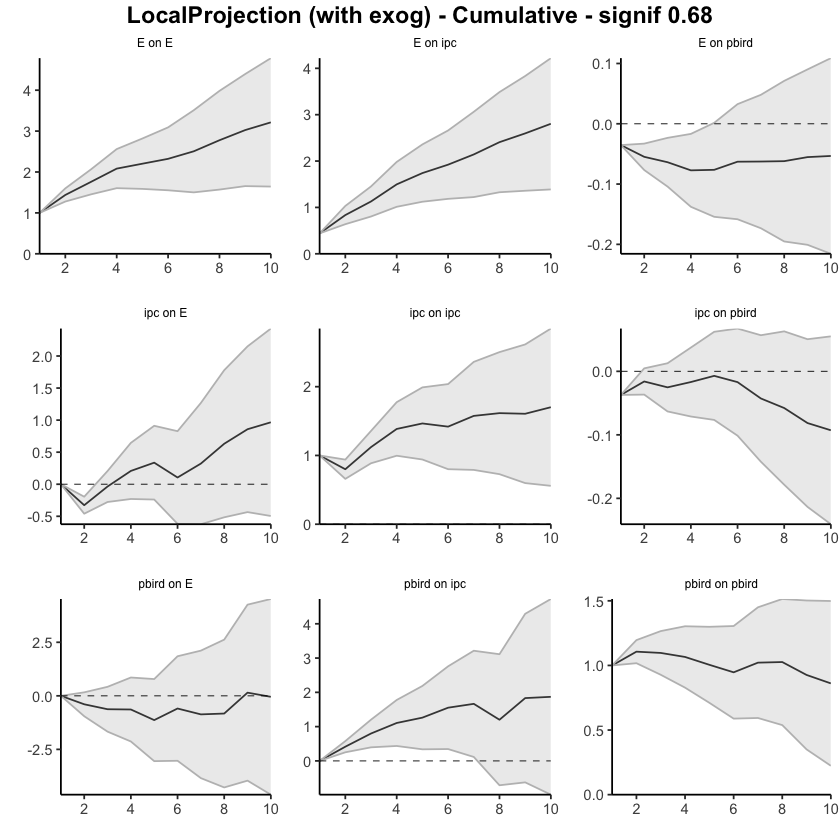

In [80]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 6, newey_lags = 10, signif = 0.68, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        1     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   6   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   6   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   6   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value  lower_bound upper_bound
23 ipc     E         1       0.0000000  0.00000000  0.00000000
24 ipc     E         2      -0.3272452 -0.58622045 -0.06826995
25 ipc     E         3       0.2917006  0.07992236  0.50347888
26 ipc     E         4       0.2435800 -0.13558102  0.62274093
27 ipc     E         5       0.1298976 -0.13748457  0.39727979
28 ipc     E         6      -0.2292268 -0.51548870  0.05703513
29 ipc     E         7       0.2190186 -0.22142545  0.65946259
30 ipc     E         8       0.3065963 -0.08600472  0.69919722
31 ipc     E         9       0.2248535 -0.06159311  0.51130004
32 ipc     E        10       0.1042825 -0.22351985  0.43208490
33 ipc     E        11       0.3046622  0.02351395  0.58581044

impulse response horizon irf_value    lower_bound upper_bound
45 pbird   E         1       0.000000000  0.0000000  0.0000000  
46 pbird   E         2      -0.395535343 -1.4917878  0.7007171  
47 pbird   E         3      -0.220098613 -1.1815784  0.7413811  
48 pbird   E         4      -0.005070505 -0.8853770  0.8752360  
49 pbird   E         5      -0.475076539 -1.3134573  0.3633043  
50 pbird   E         6       0.568795047 -0.4735955  1.6111856  
51 pbird   E         7      -0.266891555 -1.3208732  0.7870900  
52 pbird   E         8       0.030240395 -0.8866083  0.9470890  
53 pbird   E         9       0.968917022 -0.3036544  2.2414885  
54 pbird   E        10      -0.209164665 -1.1028399  0.6845106  
55 pbird   E        11      -0.309301086 -1.4606215  0.8420194

impulse response horizon irf_value lower_bound  upper_bound
1  E       ipc       1      0.4402329  0.440232923 0.4402329  
2  E       ipc       2      0.3948882  0.009502848 0.7802735  
3  E       ipc       3      0.2935297  0.040125061 0.5469343  
4  E       ipc       4      0.3691949  0.056282583 0.6821072  
5  E       ipc       5      0.2434446 -0.019452001 0.5063412  
6  E       ipc       6      0.1817913 -0.051380196 0.4149629  
7  E       ipc       7      0.2192323 -0.145447349 0.5839119  
8  E       ipc       8      0.2645171 -0.048890450 0.5779246  
9  E       ipc       9      0.1890490 -0.129362887 0.5074610  
10 E       ipc      10      0.2046573 -0.145729634 0.5550443  
11 E       ipc      11      0.2286211 -0.101257611 0.5584997

impulse response horizon irf_value    lower_bound upper_bound
56 pbird   ipc       1       0.000000000  0.00000000 0.0000000  
57 pbird   ipc       2       0.418204689  0.09882449 0.7375849  
58 pbird   ipc       3       0.387193741 -0.07849333 0.8528808  
59 pbird   ipc       4       0.311233189 -0.21003552 0.8325019  
60 pbird   ipc       5       0.157506456 -0.34667952 0.6616924  
61 pbird   ipc       6       0.294430850 -0.25393613 0.8427978  
62 pbird   ipc       7       0.099639910 -0.61553556 0.8148154  
63 pbird   ipc       8      -0.465410269 -1.16784802 0.2370275  
64 pbird   ipc       9       0.629153852 -0.43748556 1.6957933  
65 pbird   ipc      10       0.006613505 -0.76288685 0.7761139  
66 pbird   ipc      11      -0.227864103 -0.93359292 0.4778647

impulse response horizon irf_value     lower_bound upper_bound
12 E       pbird     1      -0.0354407429 -0.03544074 -0.03544074
13 E       pbird     2      -0.0199309322 -0.06464918  0.02478731
14 E       pbird     3      -0.0096483556 -0.04504179  0.02574508
15 E       pbird     4      -0.0142183615 -0.05286499  0.02442827
16 E       pbird     5       0.0002589930 -0.03394274  0.03446073
17 E       pbird     6       0.0128900991 -0.02149927  0.04727947
18 E       pbird     7      -0.0002992818 -0.02947663  0.02887807
19 E       pbird     8       0.0002177420 -0.04370090  0.04413639
20 E       pbird     9       0.0062248187 -0.01803143  0.03048106
21 E       pbird    10       0.0014142456 -0.03088370  0.03371219
22 E       pbird    11      -0.0026869565 -0.04003080  0.03465689

impulse response horizon irf_value    lower_bound upper_bound  
34 ipc     pbird     1      -0.036859952 -0.03685995 -0.0368599520
35 ipc     pbird     2       0.019442464 -0.02346457  0.0623494991
36 ipc     pbird     3      -0.011606551 -0.04432162  0.0211085198
37 ipc     pbird     4       0.005618935 -0.02549290  0.0367307738
38 ipc     pbird     5       0.007188937 -0.02206483  0.0364427039
39 ipc     pbird     6      -0.012233573 -0.04115734  0.0166901917
40 ipc     pbird     7      -0.028257625 -0.05745551  0.0009402562
41 ipc     pbird     8      -0.016924079 -0.05806772  0.0242195647
42 ipc     pbird     9      -0.026391698 -0.04811657 -0.0046668297
43 ipc     pbird    10      -0.014289936 -0.04462164  0.0160417649
44 ipc     pbird    11      -0.025173321 -0.05390436  0.0035577199

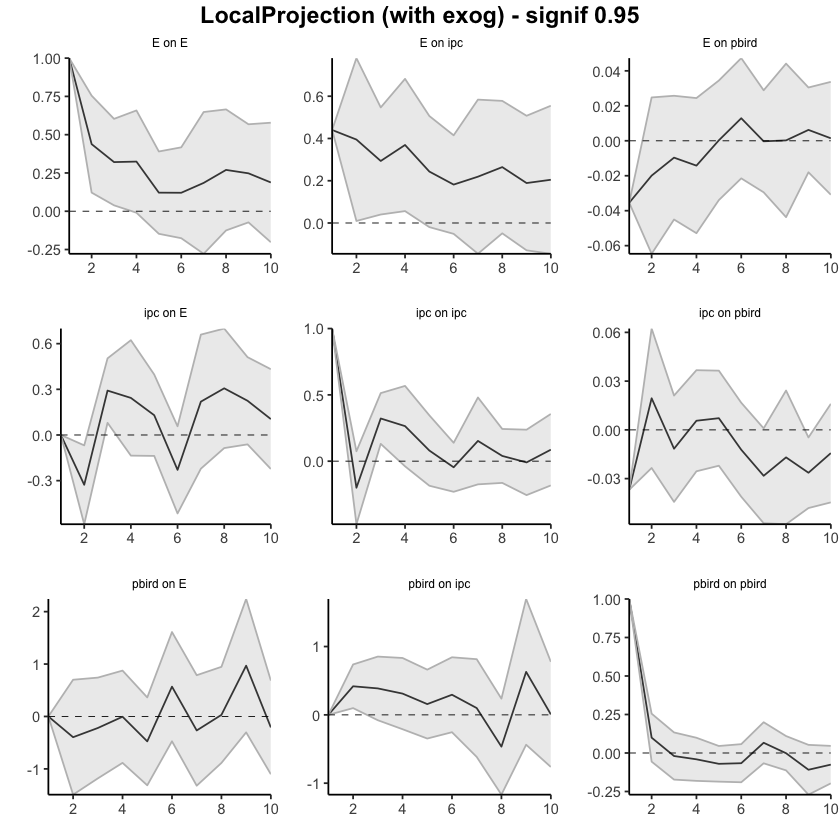

In [82]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 6, newey_lags = 10, signif = 0.95, trend=1)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        1     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   6   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   6   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   6   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.00000000
24 ipc     E         2      -0.32724520 -0.5862204  -0.06826995
25 ipc     E         3      -0.03554458 -0.5062981   0.43520892
26 ipc     E         4       0.20803537 -0.6418791   1.05794985
27 ipc     E         5       0.33793298 -0.7793637   1.45522965
28 ipc     E         6       0.10870620 -1.2948524   1.51226478
29 ipc     E         7       0.32772477 -1.5162778   2.17172736
30 ipc     E         8       0.63432102 -1.6022825   2.87092459
31 ipc     E         9       0.85917448 -1.6638757   3.38222463
32 ipc     E        10       0.96345701 -1.8873955   3.81430953
33 ipc     E        11       1.26811920 -1.8638816   4.40011997

impulse response horizon irf_value    lower_bound upper_bound
45 pbird   E         1       0.000000000   0.000000  0.0000000  
46 pbird   E         2      -0.395535343  -1.491788  0.7007171  
47 pbird   E         3      -0.615633956  -2.673366  1.4420983  
48 pbird   E         4      -0.620704460  -3.558743  2.3173343  
49 pbird   E         5      -1.095780999  -4.872201  2.6806385  
50 pbird   E         6      -0.526985952  -5.345796  4.2918241  
51 pbird   E         7      -0.793877507  -6.666669  5.0789141  
52 pbird   E         8      -0.763637112  -7.553277  6.0260032  
53 pbird   E         9       0.205279910  -7.856932  8.2674917  
54 pbird   E        10      -0.003884756  -8.959772  8.9520023  
55 pbird   E        11      -0.313185842 -10.420393  9.7940216

impulse response horizon irf_value lower_bound  upper_bound
1  E       ipc       1      0.4402329  0.440232923 0.4402329  
2  E       ipc       2      0.8351211  0.449735771 1.2205064  
3  E       ipc       3      1.1286508  0.489860832 1.7674407  
4  E       ipc       4      1.4978457  0.546143415 2.4495479  
5  E       ipc       5      1.7412903  0.526691414 2.9558891  
6  E       ipc       6      1.9230816  0.475311218 3.3708520  
7  E       ipc       7      2.1423139  0.329863869 3.9547639  
8  E       ipc       8      2.4068309  0.280973419 4.5326885  
9  E       ipc       9      2.5958800  0.151610531 5.0401494  
10 E       ipc      10      2.8005373  0.005880897 5.5951937  
11 E       ipc      11      3.0291584 -0.095376714 6.1536934

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.00000000 0.0000000  
57 pbird   ipc       2      0.4182047  0.09882449 0.7375849  
58 pbird   ipc       3      0.8053984  0.02033116 1.5904657  
59 pbird   ipc       4      1.1166316 -0.18970436 2.4229676  
60 pbird   ipc       5      1.2741381 -0.53638388 3.0846600  
61 pbird   ipc       6      1.5685689 -0.79032002 3.9274579  
62 pbird   ipc       7      1.6682088 -1.40585558 4.7422732  
63 pbird   ipc       8      1.2027986 -2.57370360 4.9793007  
64 pbird   ipc       9      1.8319524 -3.01118916 6.6750940  
65 pbird   ipc      10      1.8385659 -3.77407600 7.4512078  
66 pbird   ipc      11      1.6107018 -4.70766893 7.9290726

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.03544074 -0.03544074 -0.03544074
13 E       pbird     2      -0.05537168 -0.10008992 -0.01065343
14 E       pbird     3      -0.06502003 -0.14513171  0.01509165
15 E       pbird     4      -0.07923839 -0.19799671  0.03951992
16 E       pbird     5      -0.07897940 -0.23193945  0.07398065
17 E       pbird     6      -0.06608930 -0.25343872  0.12126012
18 E       pbird     7      -0.06638858 -0.28291535  0.15013818
19 E       pbird     8      -0.06617084 -0.32661625  0.19427457
20 E       pbird     9      -0.05994602 -0.34464768  0.22475564
21 E       pbird    10      -0.05853178 -0.37553137  0.25846782
22 E       pbird    11      -0.06121873 -0.41556217  0.29312471

impulse response horizon irf_value   lower_bound upper_bound
34 ipc     pbird     1      -0.03685995 -0.03685995 -0.03685995
35 ipc     pbird     2      -0.01741749 -0.06032452  0.02548955
36 ipc     pbird     3      -0.02902404 -0.10464614  0.04659807
37 ipc     pbird     4      -0.02340510 -0.13013905  0.08332884
38 ipc     pbird     5      -0.01621617 -0.15220388  0.11977154
39 ipc     pbird     6      -0.02844974 -0.19336122  0.13646174
40 ipc     pbird     7      -0.05670737 -0.25081672  0.13740199
41 ipc     pbird     8      -0.07363144 -0.30888445  0.16162156
42 ipc     pbird     9      -0.10002314 -0.35700101  0.15695473
43 ipc     pbird    10      -0.11431308 -0.40162265  0.17299649
44 ipc     pbird    11      -0.13948640 -0.45552701  0.17655421

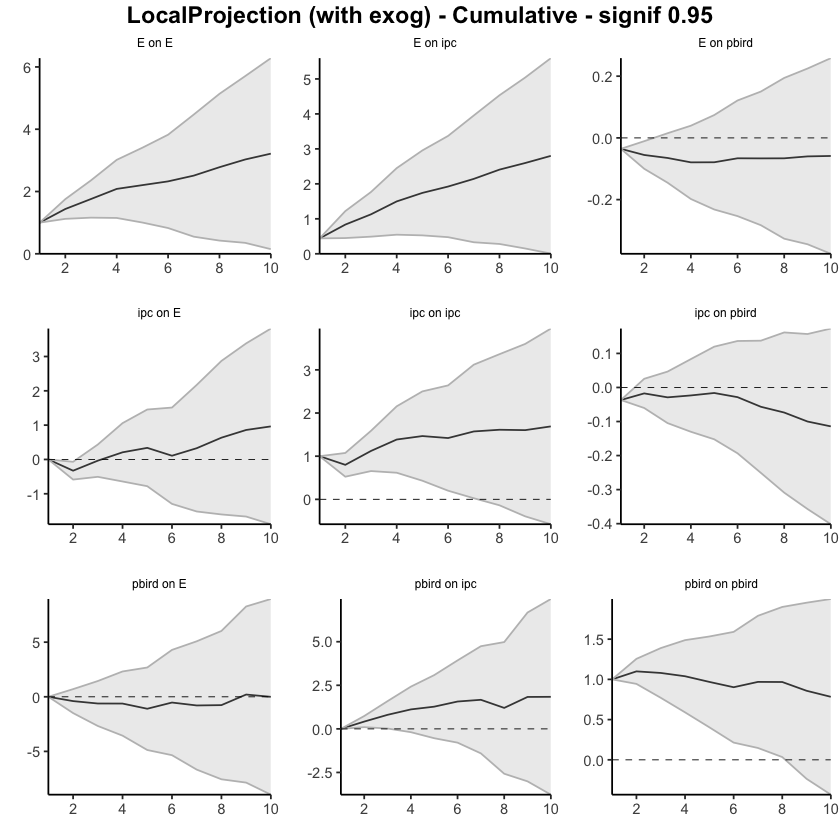

In [83]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 6, newey_lags = 10, signif = 0.95, cumulative=TRUE, trend=1)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        1     1          0.68    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   6   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   6   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   6   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.68

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.0000000 
24 ipc     E         2      -0.32724520 -0.4593754  -0.1951150 
25 ipc     E         3      -0.03554458 -0.2757249   0.2046358 
26 ipc     E         4       0.20803537 -0.2255945   0.6416652 
27 ipc     E         5       0.33793298 -0.2321163   0.9079823 
28 ipc     E         6       0.10870620 -0.6073951   0.8248075 
29 ipc     E         7       0.32772477 -0.6130929   1.2685424 
30 ipc     E         8       0.63432102 -0.5068033   1.7754453 
31 ipc     E         9       0.85917448 -0.4280960   2.1464450 
32 ipc     E        10       0.96345701 -0.4910596   2.4179736 
33 ipc     E        11       1.26811920 -0.3298404   2.8660788

impulse response horizon irf_value    lower_bound upper_bound
45 pbird   E         1       0.000000000  0.0000000  0.0000000  
46 pbird   E         2      -0.395535343 -0.9548478  0.1637771  
47 pbird   E         3      -0.615633956 -1.6654973  0.4342294  
48 pbird   E         4      -0.620704460 -2.1197038  0.8782949  
49 pbird   E         5      -1.095780999 -3.0225257  0.8309637  
50 pbird   E         6      -0.526985952 -2.9855625  1.9315906  
51 pbird   E         7      -0.793877507 -3.7901998  2.2024448  
52 pbird   E         8      -0.763637112 -4.2277393  2.7004651  
53 pbird   E         9       0.205279910 -3.9080934  4.3186533  
54 pbird   E        10      -0.003884756 -4.5732149  4.5654454  
55 pbird   E        11      -0.313185842 -5.4699243  4.8435527

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4402329 0.4402329   0.4402329  
2  E       ipc       2      0.8351211 0.6384959   1.0317462  
3  E       ipc       3      1.1286508 0.8027375   1.4545640  
4  E       ipc       4      1.4978457 1.0122833   1.9834080  
5  E       ipc       5      1.7412903 1.1215970   2.3609835  
6  E       ipc       6      1.9230816 1.1844232   2.6617400  
7  E       ipc       7      2.1423139 1.2175945   3.0670333  
8  E       ipc       8      2.4068309 1.3222098   3.4914521  
9  E       ipc       9      2.5958800 1.3488037   3.8429562  
10 E       ipc      10      2.8005373 1.3746922   4.2263824  
11 E       ipc      11      3.0291584 1.4350078   4.6233089

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.00000000 0.0000000  
57 pbird   ipc       2      0.4182047  0.25525561 0.5811538  
58 pbird   ipc       3      0.8053984  0.40485390 1.2059430  
59 pbird   ipc       4      1.1166316  0.45013367 1.7831296  
60 pbird   ipc       5      1.2741381  0.35040238 2.1978738  
61 pbird   ipc       6      1.5685689  0.36505416 2.7720837  
62 pbird   ipc       7      1.6682088  0.09980862 3.2366090  
63 pbird   ipc       8      1.2027986 -0.72398825 3.1295854  
64 pbird   ipc       9      1.8319524 -0.63903818 4.3029430  
65 pbird   ipc      10      1.8385659 -1.02502690 4.7021587  
66 pbird   ipc      11      1.6107018 -1.61295673 4.8343604

impulse response horizon irf_value   lower_bound upper_bound  
12 E       pbird     1      -0.03544074 -0.03544074 -0.0354407429
13 E       pbird     2      -0.05537168 -0.07818711 -0.0325562445
14 E       pbird     3      -0.06502003 -0.10589334 -0.0241467239
15 E       pbird     4      -0.07923839 -0.13982937 -0.0186474161
16 E       pbird     5      -0.07897940 -0.15702024 -0.0009385584
17 E       pbird     6      -0.06608930 -0.16167574  0.0294971379
18 E       pbird     7      -0.06638858 -0.17686142  0.0440842578
19 E       pbird     8      -0.06617084 -0.19905115  0.0667094720
20 E       pbird     9      -0.05994602 -0.20520197  0.0853099261
21 E       pbird    10      -0.05853178 -0.22026626  0.1032027128
22 E       pbird    11      -0.06121873 -0.24200620  0.1195687379

impulse response horizon irf_value   lower_bound upper_bound 
34 ipc     pbird     1      -0.03685995 -0.03685995 -0.036859952
35 ipc     pbird     2      -0.01741749 -0.03930883  0.004473857
36 ipc     pbird     3      -0.02902404 -0.06760675  0.009558668
37 ipc     pbird     4      -0.02340510 -0.07786120  0.031050991
38 ipc     pbird     5      -0.01621617 -0.08559765  0.053165319
39 ipc     pbird     6      -0.02844974 -0.11258825  0.055688768
40 ipc     pbird     7      -0.05670737 -0.15574275  0.042328021
41 ipc     pbird     8      -0.07363144 -0.19365849  0.046395597
42 ipc     pbird     9      -0.10002314 -0.23113430  0.031088015
43 ipc     pbird    10      -0.11431308 -0.26089960  0.032273437
44 ipc     pbird    11      -0.13948640 -0.30073161  0.021758810

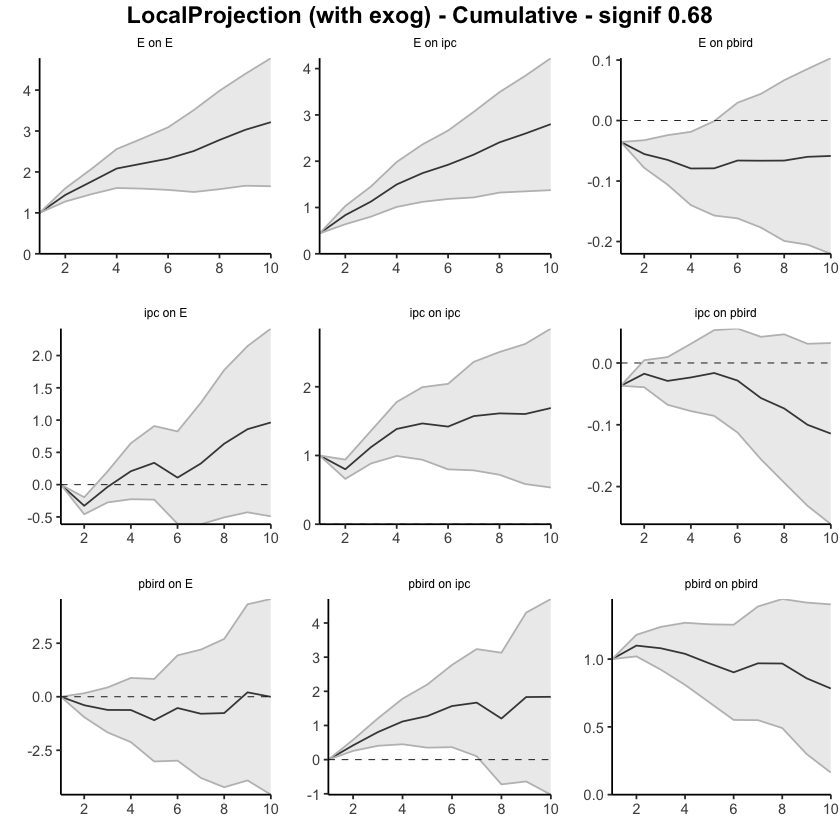

In [84]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 6, newey_lags = 10, signif = 0.68, cumulative=TRUE, trend=1)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        2     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   1   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   1   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   1   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound  upper_bound
23 ipc     E         1       0.00000000  0.000000000  0.00000000
24 ipc     E         2      -0.32114338 -0.578859964 -0.06342681
25 ipc     E         3       0.29635914  0.073742495  0.51897580
26 ipc     E         4       0.25099288 -0.130079552  0.63206532
27 ipc     E         5       0.13061170 -0.130799689  0.39202309
28 ipc     E         6      -0.22548219 -0.509625076  0.05866070
29 ipc     E         7       0.21610607 -0.216980349  0.64919250
30 ipc     E         8       0.29150295 -0.093698628  0.67670454
31 ipc     E         9       0.20232744 -0.066189324  0.47084420
32 ipc     E        10       0.09193998 -0.234327768  0.41820773
33 ipc     E        11       0.27618548  0.004978642  0.54739232

impulse response horizon irf_value    lower_bound upper_bound
45 pbird   E         1       0.000000000  0.0000000  0.0000000  
46 pbird   E         2      -0.392103095 -1.4642503  0.6800441  
47 pbird   E         3      -0.220330924 -1.1816446  0.7409827  
48 pbird   E         4      -0.004364283 -0.8863251  0.8775966  
49 pbird   E         5      -0.475413455 -1.3203915  0.3695646  
50 pbird   E         6       0.568931068 -0.4990926  1.6369547  
51 pbird   E         7      -0.276294381 -1.3224187  0.7698300  
52 pbird   E         8      -0.003850362 -0.9160171  0.9083163  
53 pbird   E         9       0.913386261 -0.3400651  2.1668376  
54 pbird   E        10      -0.248520463 -1.1604805  0.6634396  
55 pbird   E        11      -0.392500046 -1.6622514  0.8772513

impulse response horizon irf_value lower_bound  upper_bound
1  E       ipc       1      0.4412683  0.441268267 0.4412683  
2  E       ipc       2      0.3949111  0.009831686 0.7799905  
3  E       ipc       3      0.2933257  0.022061977 0.5645894  
4  E       ipc       4      0.3693081  0.053056273 0.6855600  
5  E       ipc       5      0.2428891 -0.017280721 0.5030589  
6  E       ipc       6      0.1818295 -0.043934002 0.4075929  
7  E       ipc       7      0.2076409 -0.233964491 0.6492464  
8  E       ipc       8      0.2626334 -0.062693758 0.5879606  
9  E       ipc       9      0.2211848 -0.083269186 0.5256389  
10 E       ipc      10      0.1875895 -0.250118336 0.6252973  
11 E       ipc      11      0.2121711 -0.159256022 0.5835983

impulse response horizon irf_value   lower_bound upper_bound
56 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.41789012  0.1000401  0.7357401  
58 pbird   ipc       3       0.38715783 -0.1118474  0.8861631  
59 pbird   ipc       4       0.31130535 -0.2167061  0.8393168  
60 pbird   ipc       5       0.15720990 -0.4143473  0.7287672  
61 pbird   ipc       6       0.29442475 -0.2613965  0.8502460  
62 pbird   ipc       7       0.09100004 -1.6199602  1.8019603  
63 pbird   ipc       8      -0.46670271 -1.3652118  0.4318064  
64 pbird   ipc       9       0.86841434 -0.5587237  2.2955523  
65 pbird   ipc      10      -0.02570729 -0.9366436  0.8852290  
66 pbird   ipc      11      -0.26813620 -1.4835424  0.9472700

impulse response horizon irf_value     lower_bound upper_bound
12 E       pbird     1      -3.564478e-02 -0.03564478 -0.03564478
13 E       pbird     2      -1.991838e-02 -0.06533132  0.02549456
14 E       pbird     3      -9.874297e-03 -0.04586017  0.02611158
15 E       pbird     4      -1.447940e-02 -0.05300024  0.02404143
16 E       pbird     5       2.534967e-04 -0.03383240  0.03433939
17 E       pbird     6       1.316098e-02 -0.02134284  0.04766481
18 E       pbird     7      -5.863224e-05 -0.02958594  0.02946868
19 E       pbird     8       4.705615e-04 -0.04431259  0.04525371
20 E       pbird     9       6.806932e-03 -0.01754699  0.03116085
21 E       pbird    10       2.353162e-03 -0.03013054  0.03483687
22 E       pbird    11      -1.914529e-03 -0.03969292  0.03586386

impulse response horizon irf_value    lower_bound upper_bound  
34 ipc     pbird     1      -0.036481179 -0.03648118 -0.0364811789
35 ipc     pbird     2       0.019482598 -0.02358805  0.0625532422
36 ipc     pbird     3      -0.011679119 -0.04437982  0.0210215780
37 ipc     pbird     4       0.005473217 -0.02565205  0.0365984864
38 ipc     pbird     5       0.007147614 -0.02214337  0.0364386002
39 ipc     pbird     6      -0.012074292 -0.04131626  0.0171676724
40 ipc     pbird     7      -0.028000476 -0.05692192  0.0009209656
41 ipc     pbird     8      -0.016660714 -0.05821013  0.0248887000
42 ipc     pbird     9      -0.025782825 -0.04777983 -0.0037858183
43 ipc     pbird    10      -0.013171831 -0.04331019  0.0169665250
44 ipc     pbird    11      -0.024145047 -0.05399345  0.0057033557

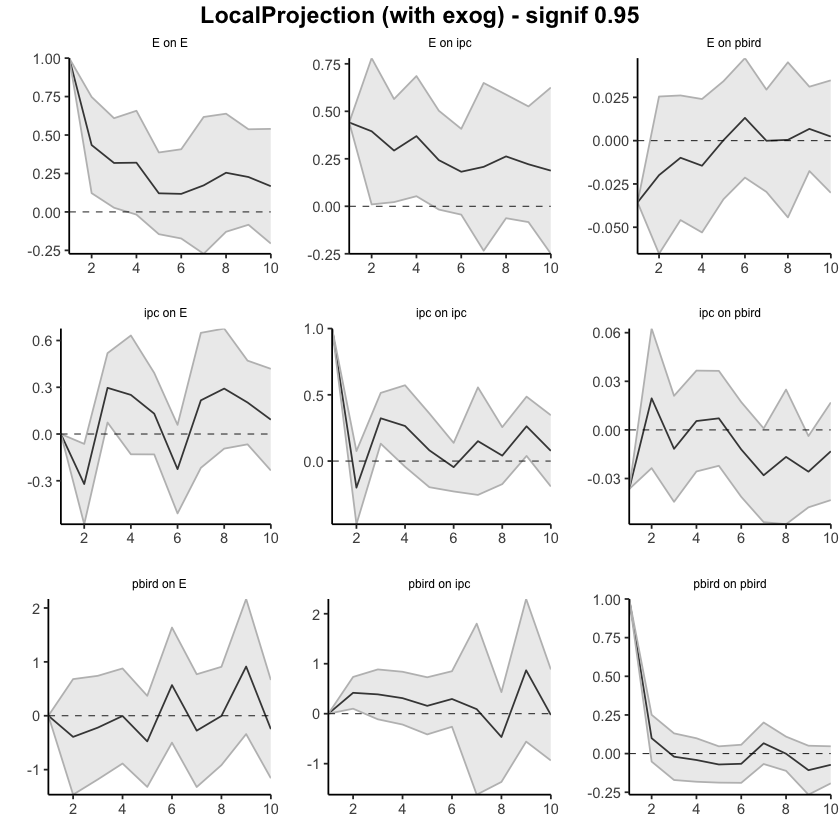

In [87]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 6, newey_lags = 10, signif = 0.95, trend=2)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        2     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   1   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   1   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   1   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.00000000
24 ipc     E         2      -0.32114338 -0.5788600  -0.06342681
25 ipc     E         3      -0.02478424 -0.5051175   0.45554899
26 ipc     E         4       0.22620864 -0.6351970   1.08761431
27 ipc     E         5       0.35682034 -0.7659967   1.47963739
28 ipc     E         6       0.13133815 -1.2756218   1.53829809
29 ipc     E         7       0.34744423 -1.4926021   2.18749059
30 ipc     E         8       0.63894718 -1.5863008   2.86419513
31 ipc     E         9       0.84127462 -1.6524901   3.33503933
32 ipc     E        10       0.93321460 -1.8868179   3.75324706
33 ipc     E        11       1.20940008 -1.8818392   4.30063938

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000   0.000000  0.0000000  
46 pbird   E         2      -0.3921031  -1.464250  0.6800441  
47 pbird   E         3      -0.6124340  -2.645895  1.4210268  
48 pbird   E         4      -0.6167983  -3.532220  2.2986234  
49 pbird   E         5      -1.0922118  -4.852612  2.6681880  
50 pbird   E         6      -0.5232807  -5.351704  4.3051427  
51 pbird   E         7      -0.7995751  -6.674123  5.0749727  
52 pbird   E         8      -0.8034254  -7.590140  5.9832891  
53 pbird   E         9       0.1099608  -7.930205  8.1501267  
54 pbird   E        10      -0.1385596  -9.090686  8.8135663  
55 pbird   E        11      -0.5310597 -10.752937  9.6908176

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4412683  0.44126827 0.4412683  
2  E       ipc       2      0.8361794  0.45109995 1.2212588  
3  E       ipc       3      1.1295051  0.47316193 1.7858482  
4  E       ipc       4      1.4988132  0.52621820 2.4714082  
5  E       ipc       5      1.7417023  0.50893748 2.9744671  
6  E       ipc       6      1.9235317  0.46500348 3.3820600  
7  E       ipc       7      2.1311727  0.23103899 4.0313064  
8  E       ipc       8      2.3938061  0.16834523 4.6192669  
9  E       ipc       9      2.6149909  0.08507605 5.1449058  
10 E       ipc      10      2.8025804 -0.16504229 5.7702031  
11 E       ipc      11      3.0147516 -0.32429831 6.3538014

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.00000000  0.0000000 
57 pbird   ipc       2      0.4178901  0.10004010  0.7357401 
58 pbird   ipc       3      0.8050479 -0.01180735  1.6219032 
59 pbird   ipc       4      1.1163533 -0.22851349  2.4612201 
60 pbird   ipc       5      1.2735632 -0.64286084  3.1899872 
61 pbird   ipc       6      1.5679879 -0.90425734  4.0402332 
62 pbird   ipc       7      1.6589880 -2.52421753  5.8421935 
63 pbird   ipc       8      1.1922853 -3.88942935  6.2739999 
64 pbird   ipc       9      2.0606996 -4.44815300  8.5695522 
65 pbird   ipc      10      2.0349923 -5.38479661  9.4547812 
66 pbird   ipc      11      1.7668561 -6.86833901 10.4020512

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.03564478 -0.03564478 -0.03564478
13 E       pbird     2      -0.05556316 -0.10097610 -0.01015022
14 E       pbird     3      -0.06543746 -0.14683627  0.01596136
15 E       pbird     4      -0.07991686 -0.19983651  0.04000280
16 E       pbird     5      -0.07966336 -0.23366891  0.07434218
17 E       pbird     6      -0.06650238 -0.25501175  0.12200699
18 E       pbird     7      -0.06656101 -0.28459769  0.15147567
19 E       pbird     8      -0.06609045 -0.32891028  0.19672938
20 E       pbird     9      -0.05928352 -0.34645727  0.22789023
21 E       pbird    10      -0.05693036 -0.37658781  0.26272710
22 E       pbird    11      -0.05884488 -0.41628074  0.29859097

impulse response horizon irf_value   lower_bound upper_bound
34 ipc     pbird     1      -0.03648118 -0.03648118 -0.03648118
35 ipc     pbird     2      -0.01699858 -0.06006922  0.02607206
36 ipc     pbird     3      -0.02867770 -0.10444904  0.04709364
37 ipc     pbird     4      -0.02320448 -0.13010109  0.08369213
38 ipc     pbird     5      -0.01605687 -0.15224446  0.12013073
39 ipc     pbird     6      -0.02813116 -0.19356072  0.13729840
40 ipc     pbird     7      -0.05613164 -0.25048264  0.13821937
41 ipc     pbird     8      -0.07279235 -0.30869277  0.16310807
42 ipc     pbird     9      -0.09857518 -0.35647260  0.15932225
43 ipc     pbird    10      -0.11174701 -0.39978279  0.17628877
44 ipc     pbird    11      -0.13589205 -0.45377624  0.18199213

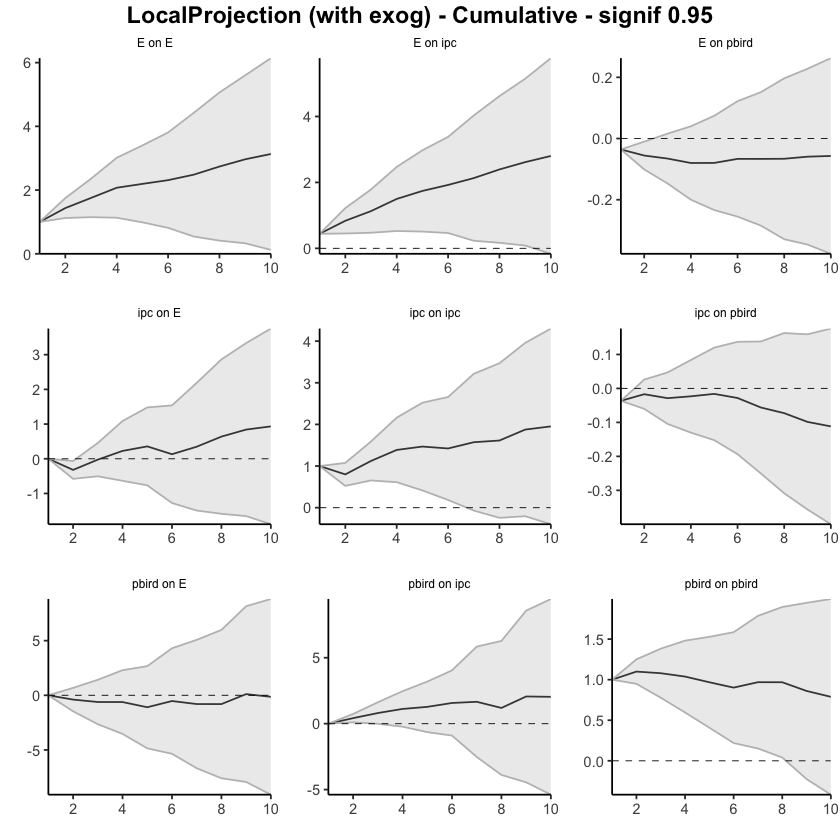

In [86]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 6, newey_lags = 10, signif = 0.95, cumulative=TRUE, trend=2)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            6        2     1          0.68    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   1   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   1   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        6   6   5   6   6   2   1   1   2   1   
2 ipc      6   6   6   6   6   2   6   1   2   2   
3 pbird    1   1   1   1   1   1   1   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.68

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.0000000 
24 ipc     E         2      -0.32114338 -0.4526314  -0.1896553 
25 ipc     E         3      -0.02478424 -0.2698522   0.2202837 
26 ipc     E         4       0.22620864 -0.2132840   0.6657013 
27 ipc     E         5       0.35682034 -0.2160455   0.9296862 
28 ipc     E         6       0.13133815 -0.5864986   0.8491749 
29 ipc     E         7       0.34744423 -0.5913549   1.2862434 
30 ipc     E         8       0.63894718 -0.4963834   1.7742778 
31 ipc     E         9       0.84127462 -0.4310543   2.1136036 
32 ipc     E        10       0.93321460 -0.5055775   2.3720067 
33 ipc     E        11       1.20940008 -0.3677628   2.7865630

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000  0.000000   0.0000000  
46 pbird   E         2      -0.3921031 -0.939117   0.1549108  
47 pbird   E         3      -0.6124340 -1.649914   0.4250460  
48 pbird   E         4      -0.6167983 -2.104258   0.8706618  
49 pbird   E         5      -1.0922118 -3.010783   0.8263595  
50 pbird   E         6      -0.5232807 -2.986762   1.9402006  
51 pbird   E         7      -0.7995751 -3.796793   2.1976432  
52 pbird   E         8      -0.8034254 -4.266035   2.6591840  
53 pbird   E         9       0.1099608 -3.992165   4.2120863  
54 pbird   E        10      -0.1385596 -4.705971   4.4288516  
55 pbird   E        11      -0.5310597 -5.746303   4.6841838

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4412683 0.4412683   0.4412683  
2  E       ipc       2      0.8361794 0.6397103   1.0326484  
3  E       ipc       3      1.1295051 0.7946361   1.4643740  
4  E       ipc       4      1.4988132 1.0025913   1.9950351  
5  E       ipc       5      1.7417023 1.1127406   2.3706639  
6  E       ipc       6      1.9235317 1.1793847   2.6676788  
7  E       ipc       7      2.1311727 1.1617167   3.1006286  
8  E       ipc       8      2.3938061 1.2583669   3.5292453  
9  E       ipc       9      2.6149909 1.3242180   3.9057638  
10 E       ipc      10      2.8025804 1.2884872   4.3166736  
11 E       ipc      11      3.0147516 1.3111547   4.7183484

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.0000000  0.0000000  
57 pbird   ipc       2      0.4178901  0.2557217  0.5800585  
58 pbird   ipc       3      0.8050479  0.3882850  1.2218108  
59 pbird   ipc       4      1.1163533  0.4301968  1.8025098  
60 pbird   ipc       5      1.2735632  0.2957958  2.2513306  
61 pbird   ipc       6      1.5679879  0.3066383  2.8293376  
62 pbird   ipc       7      1.6589880 -0.4753005  3.7932765  
63 pbird   ipc       8      1.1922853 -1.4004263  3.7849968  
64 pbird   ipc       9      2.0606996 -1.2601436  5.3815428  
65 pbird   ipc      10      2.0349923 -1.7506143  5.8205989  
66 pbird   ipc      11      1.7668561 -2.6388557  6.1725679

impulse response horizon irf_value   lower_bound upper_bound 
12 E       pbird     1      -0.03564478 -0.03564478 -0.035644783
13 E       pbird     2      -0.05556316 -0.07873303 -0.032393291
14 E       pbird     3      -0.06543746 -0.10696746 -0.023907447
15 E       pbird     4      -0.07991686 -0.14110035 -0.018733361
16 E       pbird     5      -0.07966336 -0.15823762 -0.001089103
17 E       pbird     6      -0.06650238 -0.16268063  0.029675871
18 E       pbird     7      -0.06656101 -0.17780421  0.044682192
19 E       pbird     8      -0.06609045 -0.20018220  0.068001300
20 E       pbird     9      -0.05928352 -0.20580074  0.087233703
21 E       pbird    10      -0.05693036 -0.22002090  0.106160184
22 E       pbird    11      -0.05884488 -0.24121011  0.123520345

impulse response horizon irf_value   lower_bound upper_bound 
34 ipc     pbird     1      -0.03648118 -0.03648118 -0.036481179
35 ipc     pbird     2      -0.01699858 -0.03897340  0.004976238
36 ipc     pbird     3      -0.02867770 -0.06733655  0.009981148
37 ipc     pbird     4      -0.02320448 -0.07774357  0.031334604
38 ipc     pbird     5      -0.01605687 -0.08554034  0.053426599
39 ipc     pbird     6      -0.02813116 -0.11253400  0.056271677
40 ipc     pbird     7      -0.05613164 -0.15529031  0.043027038
41 ipc     pbird     8      -0.07279235 -0.19314971  0.047565005
42 ipc     pbird     9      -0.09857518 -0.23015549  0.033005142
43 ipc     pbird    10      -0.11174701 -0.25870404  0.035210023
44 ipc     pbird    11      -0.13589205 -0.29807786  0.026293753

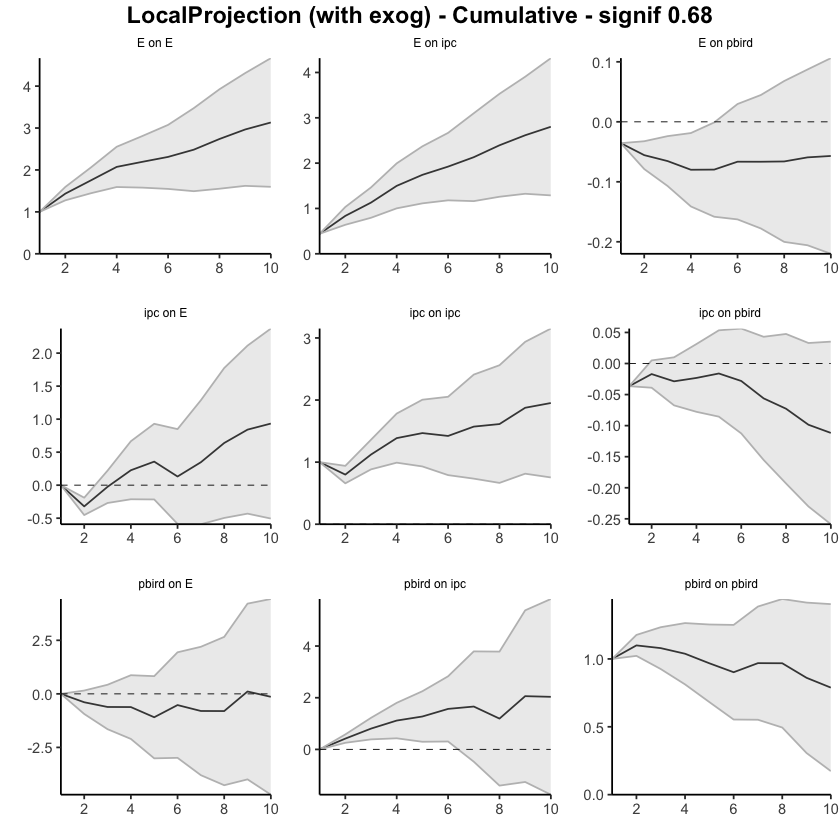

In [85]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 6, newey_lags = 10, signif = 0.68, cumulative=TRUE, trend=2)

COMMODITIES

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.00000000 0.0000000  
24 ipc     E         2      -0.36433683 -0.88783557 0.1591619  
25 ipc     E         3       0.09229701 -0.29918484 0.4837789  
26 ipc     E         4       0.07378982 -0.51211090 0.6596905  
27 ipc     E         5       0.29751258 -0.09175862 0.6867838  
28 ipc     E         6      -0.02674342 -0.32706741 0.2735806  
29 ipc     E         7       0.44406021  0.12964084 0.7584796  
30 ipc     E         8       0.31402835 -0.07446258 0.7025193  
31 ipc     E         9       0.21733808 -0.09145503 0.5261312  
32 ipc     E        10       0.30405193  0.02294567 0.5851582  
33 ipc     E        11       0.33845032  0.04573316 0.6311675

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000  0.0000000  0.0000000  
46 pbird   E         2      -0.6556098 -1.7457142  0.4344946  
47 pbird   E         3      -0.3104539 -1.1372502  0.5163423  
48 pbird   E         4      -0.4781158 -1.7023009  0.7460694  
49 pbird   E         5      -0.4665047 -1.3512618  0.4182523  
50 pbird   E         6       0.6212444 -0.3443537  1.5868425  
51 pbird   E         7      -0.2246808 -1.2821535  0.8327920  
52 pbird   E         8       0.1238200 -0.6014531  0.8490932  
53 pbird   E         9       0.9999125 -0.2396057  2.2394306  
54 pbird   E        10       0.2135590 -0.6246561  1.0517741  
55 pbird   E        11       0.1304085 -0.8463992  1.1072162

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4806049  0.48060491 0.4806049  
2  E       ipc       2      0.4743587 -0.19761872 1.1463361  
3  E       ipc       3      0.1701036 -0.48256365 0.8227708  
4  E       ipc       4      0.3512261 -0.18595099 0.8884031  
5  E       ipc       5      0.2130458 -0.12537763 0.5514692  
6  E       ipc       6      0.1474454 -0.19917143 0.4940622  
7  E       ipc       7      0.2084166 -0.06734166 0.4841748  
8  E       ipc       8      0.2185414 -0.09152020 0.5286031  
9  E       ipc       9      0.1909787 -0.06284255 0.4448000  
10 E       ipc      10      0.1733468 -0.14066107 0.4873546  
11 E       ipc      11      0.2026801 -0.08295659 0.4883167

impulse response horizon irf_value     lower_bound upper_bound
56 pbird   ipc       1       0.0000000000  0.00000000 0.0000000  
57 pbird   ipc       2       0.2239054154 -0.15846294 0.6062738  
58 pbird   ipc       3       0.2790224257 -0.09996911 0.6580140  
59 pbird   ipc       4       0.0315769553 -0.61286169 0.6760156  
60 pbird   ipc       5       0.0155471140 -0.71205483 0.7431491  
61 pbird   ipc       6       0.2646540109 -0.35132320 0.8806312  
62 pbird   ipc       7      -0.0009067183 -0.69060736 0.6887939  
63 pbird   ipc       8       0.0541628931 -0.71372010 0.8220459  
64 pbird   ipc       9       0.8948931787 -0.12752973 1.9173161  
65 pbird   ipc      10       0.0938268831 -0.68530352 0.8729573  
66 pbird   ipc      11       0.1278953036 -0.56199311 0.8177837

impulse response horizon irf_value     lower_bound upper_bound
12 E       pbird     1      -0.0418086053 -0.04180861 -0.04180861
13 E       pbird     2      -0.0180119464 -0.05704523  0.02102134
14 E       pbird     3      -0.0018596218 -0.05330261  0.04958337
15 E       pbird     4      -0.0138292795 -0.06154593  0.03388737
16 E       pbird     5      -0.0015058879 -0.03361778  0.03060600
17 E       pbird     6       0.0121174095 -0.01827641  0.04251123
18 E       pbird     7      -0.0024029741 -0.03056170  0.02575575
19 E       pbird     8      -0.0089047543 -0.04890898  0.03109947
20 E       pbird     9       0.0123622805 -0.01251210  0.03723667
21 E       pbird    10       0.0038805874 -0.02298046  0.03074164
22 E       pbird    11       0.0002293449 -0.02724019  0.02769888

impulse response horizon irf_value    lower_bound  upper_bound 
34 ipc     pbird     1      -0.029306513 -0.029306513 -0.029306513
35 ipc     pbird     2       0.033257529 -0.006291744  0.072806803
36 ipc     pbird     3      -0.007436385 -0.048650254  0.033777484
37 ipc     pbird     4       0.011326225 -0.023776521  0.046428972
38 ipc     pbird     5      -0.016046922 -0.046286026  0.014192182
39 ipc     pbird     6      -0.004196241 -0.031103490  0.022711007
40 ipc     pbird     7      -0.021102529 -0.048970048  0.006764989
41 ipc     pbird     8      -0.023569190 -0.063935283  0.016796903
42 ipc     pbird     9      -0.022260168 -0.046768074  0.002247738
43 ipc     pbird    10      -0.008670242 -0.034371887  0.017031403
44 ipc     pbird    11      -0.020427710 -0.043611695  0.002756275

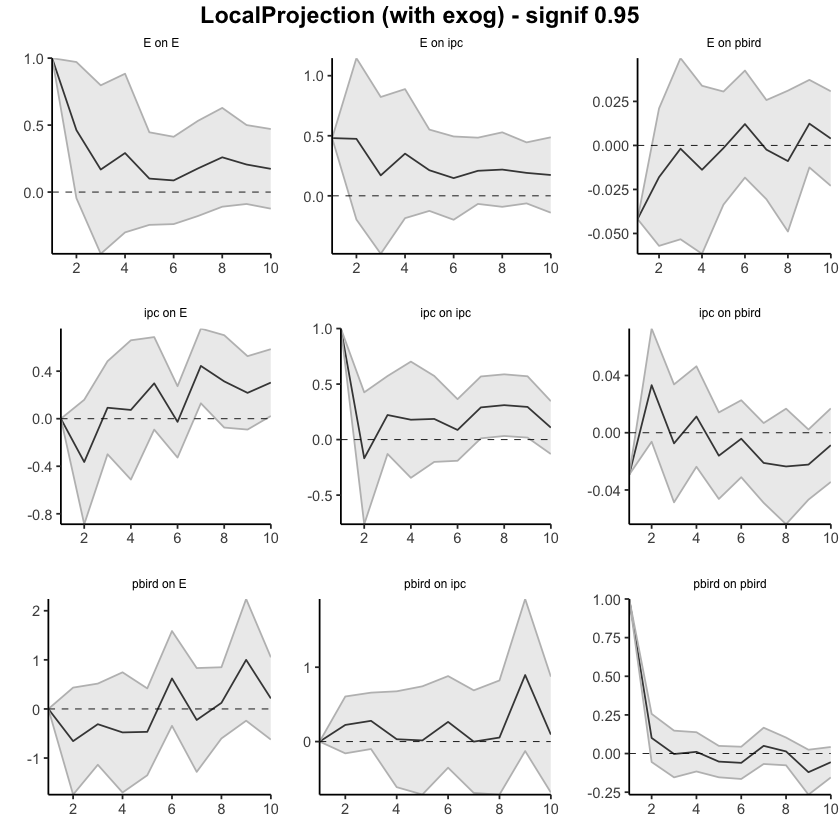

In [55]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000  0.0000000  
24 ipc     E         2      -0.36433683 -0.8878356  0.1591619  
25 ipc     E         3      -0.27203982 -1.1870204  0.6429408  
26 ipc     E         4      -0.19825000 -1.6991313  1.3026313  
27 ipc     E         5       0.09926257 -1.7908899  1.9894151  
28 ipc     E         6       0.07251915 -2.1179573  2.2629957  
29 ipc     E         7       0.51657937 -1.9883165  3.0214752  
30 ipc     E         8       0.83060771 -2.0627791  3.7239945  
31 ipc     E         9       1.04794579 -2.1542341  4.2501257  
32 ipc     E        10       1.35199772 -2.1312884  4.8352839  
33 ipc     E        11       1.69044804 -2.0855553  5.4664514

impulse response horizon irf_value   lower_bound upper_bound
45 pbird   E         1       0.00000000  0.000000   0.0000000  
46 pbird   E         2      -0.65560978 -1.745714   0.4344946  
47 pbird   E         3      -0.96606373 -2.882964   0.9508370  
48 pbird   E         4      -1.44417949 -4.585265   1.6969064  
49 pbird   E         5      -1.91068424 -5.936527   2.1151587  
50 pbird   E         6      -1.28943985 -6.280881   3.7020012  
51 pbird   E         7      -1.51412064 -7.563034   4.5347932  
52 pbird   E         8      -1.39030059 -8.164488   5.3838863  
53 pbird   E         9      -0.39038811 -8.404093   7.6233170  
54 pbird   E        10      -0.17682916 -9.028749   8.6750910  
55 pbird   E        11      -0.04642064 -9.875148   9.7823072

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4806049  0.4806049  0.4806049  
2  E       ipc       2      0.9549636  0.2829862  1.6269410  
3  E       ipc       3      1.1250672 -0.1995775  2.4497118  
4  E       ipc       4      1.4762932 -0.3855285  3.3381149  
5  E       ipc       5      1.6893390 -0.5109061  3.8895841  
6  E       ipc       6      1.8367844 -0.7100775  4.3836463  
7  E       ipc       7      2.0452010 -0.7774192  4.8678211  
8  E       ipc       8      2.2637424 -0.8689394  5.3964241  
9  E       ipc       9      2.4547211 -0.9317819  5.8412241  
10 E       ipc      10      2.6280678 -1.0724430  6.3285787  
11 E       ipc      11      2.8307479 -1.1553996  6.8168954

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.0000000  0.0000000  
57 pbird   ipc       2      0.2239054 -0.1584629  0.6062738  
58 pbird   ipc       3      0.5029278 -0.2584320  1.2642877  
59 pbird   ipc       4      0.5345048 -0.8712937  1.9403033  
60 pbird   ipc       5      0.5500519 -1.5833486  2.6834524  
61 pbird   ipc       6      0.8147059 -1.9346718  3.5640836  
62 pbird   ipc       7      0.8137992 -2.6252791  4.2528775  
63 pbird   ipc       8      0.8679621 -3.3389992  5.0749234  
64 pbird   ipc       9      1.7628553 -3.4665289  6.9922395  
65 pbird   ipc      10      1.8566822 -4.1518325  7.8651968  
66 pbird   ipc      11      1.9845775 -4.7138256  8.6829805

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04180861 -0.04180861 -0.04180861
13 E       pbird     2      -0.05982055 -0.09885384 -0.02078727
14 E       pbird     3      -0.06168017 -0.15215645  0.02879610
15 E       pbird     4      -0.07550945 -0.21370238  0.06268347
16 E       pbird     5      -0.07701534 -0.24732015  0.09328947
17 E       pbird     6      -0.06489793 -0.26559657  0.13580070
18 E       pbird     7      -0.06730091 -0.29615827  0.16155646
19 E       pbird     8      -0.07620566 -0.34506725  0.19265593
20 E       pbird     9      -0.06384338 -0.35757935  0.22989259
21 E       pbird    10      -0.05996279 -0.38055981  0.26063423
22 E       pbird    11      -0.05973345 -0.40780000  0.28833311

impulse response horizon irf_value    lower_bound upper_bound
34 ipc     pbird     1      -0.029306513 -0.02930651 -0.02930651
35 ipc     pbird     2       0.003951016 -0.03559826  0.04350029
36 ipc     pbird     3      -0.003485369 -0.08424851  0.07727777
37 ipc     pbird     4       0.007840857 -0.10802503  0.12370675
38 ipc     pbird     5      -0.008206066 -0.15431106  0.13789893
39 ipc     pbird     6      -0.012402307 -0.18541455  0.16060994
40 ipc     pbird     7      -0.033504836 -0.23438460  0.16737492
41 ipc     pbird     8      -0.057074026 -0.29831988  0.18417183
42 ipc     pbird     9      -0.079334194 -0.34508795  0.18641957
43 ipc     pbird    10      -0.088004436 -0.37945984  0.20345097
44 ipc     pbird    11      -0.108432146 -0.42307154  0.20620724

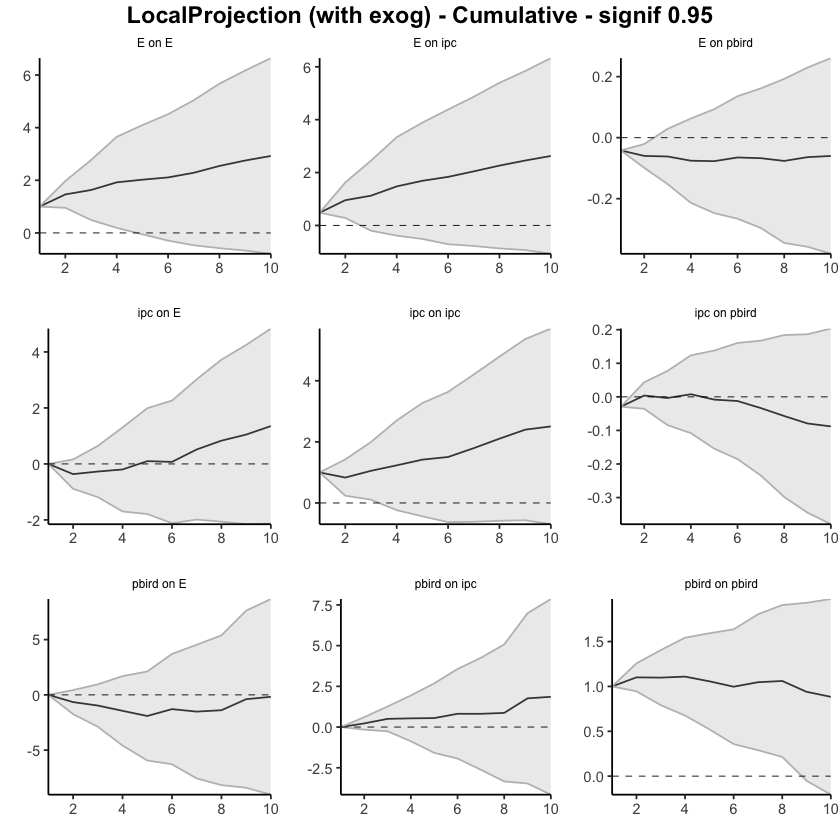

In [56]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.68    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.68

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.00000000
24 ipc     E         2      -0.36433683 -0.6314280  -0.09724563
25 ipc     E         3      -0.27203982 -0.7388667   0.19478701
26 ipc     E         4      -0.19825000 -0.9640058   0.56750576
27 ipc     E         5       0.09926257 -0.8651010   1.06362610
28 ipc     E         6       0.07251915 -1.0450709   1.19010920
29 ipc     E         7       0.51657937 -0.7614287   1.79458746
30 ipc     E         8       0.83060771 -0.6456100   2.30682547
31 ipc     E         9       1.04794579 -0.5858195   2.68171105
32 ipc     E        10       1.35199772 -0.4251891   3.12918453
33 ipc     E        11       1.69044804 -0.2360843   3.61698035

impulse response horizon irf_value   lower_bound upper_bound
45 pbird   E         1       0.00000000  0.000000    0.00000000
46 pbird   E         2      -0.65560978 -1.211786   -0.09943406
47 pbird   E         3      -0.96606373 -1.944074    0.01194683
48 pbird   E         4      -1.44417949 -3.046774    0.15841534
49 pbird   E         5      -1.91068424 -3.964686    0.14331727
50 pbird   E         6      -1.28943985 -3.836093    1.25721375
51 pbird   E         7      -1.51412064 -4.600301    1.57205987
52 pbird   E         8      -1.39030059 -4.846518    2.06591722
53 pbird   E         9      -0.39038811 -4.479013    3.69823693
54 pbird   E        10      -0.17682916 -4.693115    4.33945665
55 pbird   E        11      -0.04642064 -5.061078    4.96823644

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4806049 0.4806049   0.4806049  
2  E       ipc       2      0.9549636 0.6121180   1.2978092  
3  E       ipc       3      1.1250672 0.4492281   1.8009063  
4  E       ipc       4      1.4762932 0.5263842   2.4262023  
5  E       ipc       5      1.6893390 0.5667650   2.8119130  
6  E       ipc       6      1.8367844 0.5373651   3.1362037  
7  E       ipc       7      2.0452010 0.6050886   3.4853133  
8  E       ipc       8      2.2637424 0.6654354   3.8620494  
9  E       ipc       9      2.4547211 0.7269134   4.1825288  
10 E       ipc      10      2.6280678 0.7400521   4.5160836  
11 E       ipc      11      2.8307479 0.7969992   4.8644966

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.00000000 0.0000000  
57 pbird   ipc       2      0.2239054  0.02881952 0.4189913  
58 pbird   ipc       3      0.5029278  0.11447892 0.8913768  
59 pbird   ipc       4      0.5345048 -0.18273935 1.2517489  
60 pbird   ipc       5      0.5500519 -0.53841772 1.6385215  
61 pbird   ipc       6      0.8147059 -0.58803779 2.2174496  
62 pbird   ipc       7      0.8137992 -0.94083259 2.5684310  
63 pbird   ipc       8      0.8679621 -1.27844673 3.0143709  
64 pbird   ipc       9      1.7628553 -0.90519790 4.4309084  
65 pbird   ipc      10      1.8566822 -1.20888653 4.9222508  
66 pbird   ipc      11      1.9845775 -1.43297510 5.4021300

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04180861 -0.04180861 -0.04180861
13 E       pbird     2      -0.05982055 -0.07973549 -0.03990561
14 E       pbird     3      -0.06168017 -0.10784154 -0.01551881
15 E       pbird     4      -0.07550945 -0.14601605 -0.00500286
16 E       pbird     5      -0.07701534 -0.16390555  0.00987487
17 E       pbird     6      -0.06489793 -0.16729519  0.03749933
18 E       pbird     7      -0.06730091 -0.18406487  0.04946305
19 E       pbird     8      -0.07620566 -0.21337994  0.06096862
20 E       pbird     9      -0.06384338 -0.21370867  0.08602191
21 E       pbird    10      -0.05996279 -0.22353270  0.10360712
22 E       pbird    11      -0.05973345 -0.23731842  0.11785153

impulse response horizon irf_value    lower_bound upper_bound
34 ipc     pbird     1      -0.029306513 -0.02930651 -0.02930651
35 ipc     pbird     2       0.003951016 -0.01622718  0.02412922
36 ipc     pbird     3      -0.003485369 -0.04469105  0.03772032
37 ipc     pbird     4       0.007840857 -0.05127439  0.06695611
38 ipc     pbird     5      -0.008206066 -0.08274943  0.06633730
39 ipc     pbird     6      -0.012402307 -0.10067386  0.07586925
40 ipc     pbird     7      -0.033504836 -0.13599451  0.06898484
41 ipc     pbird     8      -0.057074026 -0.18015865  0.06601059
42 ipc     pbird     9      -0.079334194 -0.21492285  0.05625446
43 ipc     pbird    10      -0.088004436 -0.23670617  0.06069730
44 ipc     pbird    11      -0.108432146 -0.26896245  0.05209815

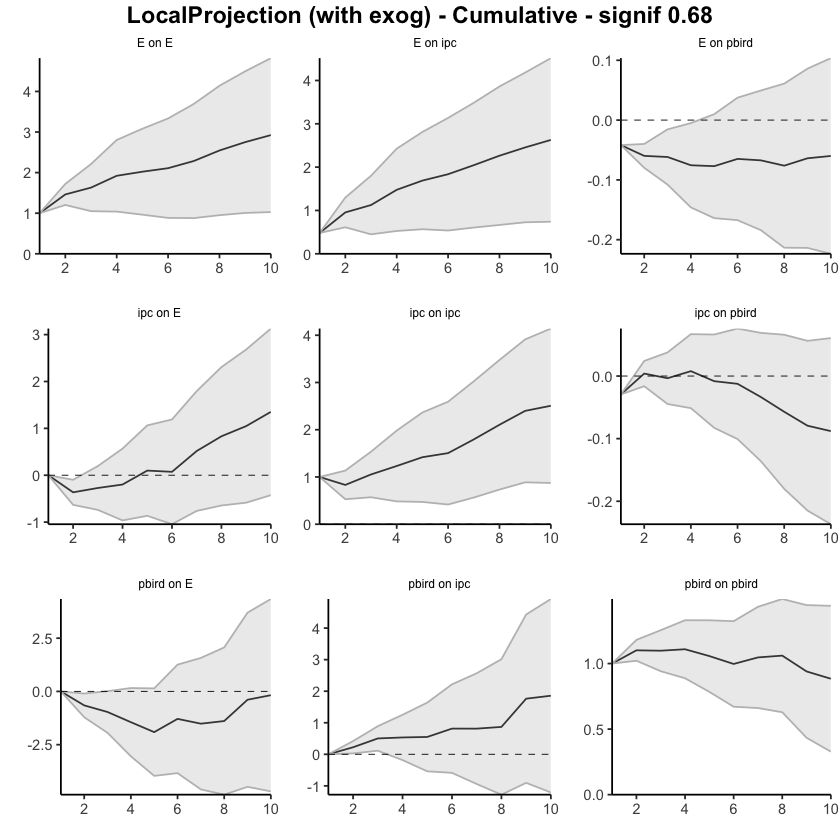

In [57]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.68, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            3        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.00000000 0.0000000  
24 ipc     E         2      -0.35997999 -0.88762924 0.1676693  
25 ipc     E         3       0.11742964 -0.25658733 0.4914466  
26 ipc     E         4       0.27170634 -0.23493234 0.7783450  
27 ipc     E         5       0.33969513 -0.06877670 0.7481670  
28 ipc     E         6      -0.00686156 -0.31046327 0.2967402  
29 ipc     E         7       0.31397182  0.02551151 0.6024321  
30 ipc     E         8       0.35187701 -0.06945990 0.7732139  
31 ipc     E         9       0.23447320 -0.06979635 0.5387427  
32 ipc     E        10       0.13580787 -0.18234226 0.4539580  
33 ipc     E        11       0.36645836  0.04792838 0.6849883

impulse response horizon irf_value   lower_bound upper_bound
45 pbird   E         1       0.00000000  0.0000000  0.0000000  
46 pbird   E         2      -0.79363371 -2.0116281  0.4243607  
47 pbird   E         3      -0.57562579 -1.5469689  0.3957173  
48 pbird   E         4      -0.33164063 -1.1673669  0.5040857  
49 pbird   E         5      -0.46022826 -1.3236314  0.4031749  
50 pbird   E         6       0.52059094 -0.4209539  1.4621357  
51 pbird   E         7      -0.48163384 -1.6915436  0.7282759  
52 pbird   E         8       0.01819087 -0.6911757  0.7275574  
53 pbird   E         9       0.97501099 -0.3843082  2.3343302  
54 pbird   E        10      -0.08382876 -1.0205736  0.8529161  
55 pbird   E        11       0.11438038 -0.8869997  1.1157605

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4822860  0.48228604 0.4822860  
2  E       ipc       2      0.4579904 -0.20577116 1.1217519  
3  E       ipc       3      0.1698925 -0.49643483 0.8362198  
4  E       ipc       4      0.3700798 -0.18804282 0.9282024  
5  E       ipc       5      0.2519137 -0.08367652 0.5875039  
6  E       ipc       6      0.1559299 -0.18955116 0.5014110  
7  E       ipc       7      0.2203502 -0.04819223 0.4888927  
8  E       ipc       8      0.2599160 -0.07256124 0.5923932  
9  E       ipc       9      0.2032392 -0.04168047 0.4481589  
10 E       ipc      10      0.1905252 -0.11527436 0.4963247  
11 E       ipc      11      0.2062215 -0.13756334 0.5500062

impulse response horizon irf_value   lower_bound upper_bound
56 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.16924874 -0.2392760  0.5777735  
58 pbird   ipc       3       0.13052443 -0.2608964  0.5219453  
59 pbird   ipc       4       0.04450976 -0.5810388  0.6700584  
60 pbird   ipc       5       0.07149350 -0.5367201  0.6797071  
61 pbird   ipc       6       0.16982367 -0.3635809  0.7032282  
62 pbird   ipc       7      -0.14249694 -0.7236622  0.4386683  
63 pbird   ipc       8      -0.25285608 -1.0865282  0.5808160  
64 pbird   ipc       9       0.93371032 -0.1782414  2.0456620  
65 pbird   ipc      10       0.03246247 -0.8298948  0.8948198  
66 pbird   ipc      11      -0.15038774 -0.7338853  0.4331098

impulse response horizon irf_value     lower_bound  upper_bound
12 E       pbird     1      -4.137582e-02 -0.041375821 -0.04137582
13 E       pbird     2      -1.728184e-02 -0.057125428  0.02256174
14 E       pbird     3      -1.355706e-03 -0.052886586  0.05017517
15 E       pbird     4      -2.541794e-02 -0.070523175  0.01968729
16 E       pbird     5      -4.099171e-03 -0.035977321  0.02777898
17 E       pbird     6       1.220416e-02 -0.018337625  0.04274594
18 E       pbird     7      -3.783760e-03 -0.030901438  0.02333392
19 E       pbird     8      -9.282006e-03 -0.049321721  0.03075771
20 E       pbird     9       1.352155e-02 -0.007675333  0.03471843
21 E       pbird    10       4.438820e-03 -0.021231968  0.03010961
22 E       pbird    11       4.756866e-05 -0.028410768  0.02850591

impulse response horizon irf_value    lower_bound upper_bound 
34 ipc     pbird     1      -0.030891630 -0.03089163 -0.030891630
35 ipc     pbird     2       0.028926930 -0.01212897  0.069982833
36 ipc     pbird     3      -0.009629485 -0.05072808  0.031469112
37 ipc     pbird     4      -0.015624670 -0.05691778  0.025668441
38 ipc     pbird     5      -0.018242842 -0.04815364  0.011667959
39 ipc     pbird     6      -0.006407811 -0.03266691  0.019851290
40 ipc     pbird     7      -0.024609310 -0.05103488  0.001816263
41 ipc     pbird     8      -0.024770529 -0.06550151  0.015960450
42 ipc     pbird     9      -0.019414170 -0.04109182  0.002263483
43 ipc     pbird    10      -0.004391245 -0.02940150  0.020619011
44 ipc     pbird    11      -0.022141739 -0.04589065  0.001607174

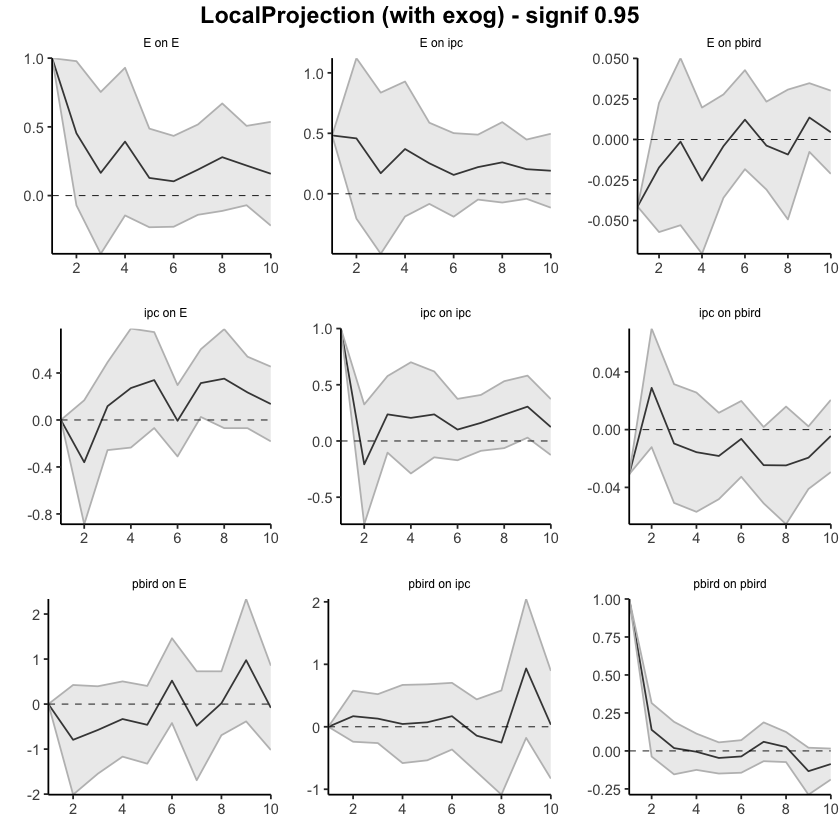

In [58]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            3        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000  0.0000000  
24 ipc     E         2      -0.35997999 -0.8876292  0.1676693  
25 ipc     E         3      -0.24255035 -1.1442166  0.6591159  
26 ipc     E         4       0.02915599 -1.3791489  1.4374609  
27 ipc     E         5       0.36885112 -1.4479256  2.1856279  
28 ipc     E         6       0.36198956 -1.7583889  2.4823680  
29 ipc     E         7       0.67596137 -1.7328774  3.0848001  
30 ipc     E         8       1.02783839 -1.8023373  3.8580140  
31 ipc     E         9       1.26231158 -1.8721336  4.3967568  
32 ipc     E        10       1.39811945 -2.0544759  4.8507148  
33 ipc     E        11       1.76457782 -2.0065475  5.5357031

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000   0.000000  0.0000000  
46 pbird   E         2      -0.7936337  -2.011628  0.4243607  
47 pbird   E         3      -1.3692595  -3.558597  0.8200779  
48 pbird   E         4      -1.7009001  -4.725964  1.3241636  
49 pbird   E         5      -2.1611284  -6.049595  1.7273385  
50 pbird   E         6      -1.6405374  -6.470549  3.1894742  
51 pbird   E         7      -2.1221713  -8.162093  3.9177501  
52 pbird   E         8      -2.1039804  -8.853268  4.6453075  
53 pbird   E         9      -1.1289694  -9.237577  6.9796377  
54 pbird   E        10      -1.2127982 -10.258150  7.8325538  
55 pbird   E        11      -1.0984178 -11.145150  8.9483143

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4822860  0.4822860  0.482286   
2  E       ipc       2      0.9402764  0.2765149  1.604038   
3  E       ipc       3      1.1101689 -0.2199199  2.440258   
4  E       ipc       4      1.4802487 -0.4079628  3.368460   
5  E       ipc       5      1.7321623 -0.4916393  3.955964   
6  E       ipc       6      1.8880923 -0.6811905  4.457375   
7  E       ipc       7      2.1084425 -0.7293827  4.946268   
8  E       ipc       8      2.3683585 -0.8019439  5.538661   
9  E       ipc       9      2.5715977 -0.8436244  5.986820   
10 E       ipc      10      2.7621229 -0.9588988  6.483145   
11 E       ipc      11      2.9683443 -1.0964621  7.033151

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.0000000  0.0000000  
57 pbird   ipc       2      0.1692487 -0.2392760  0.5777735  
58 pbird   ipc       3      0.2997732 -0.5001724  1.0997187  
59 pbird   ipc       4      0.3442829 -1.0812113  1.7697771  
60 pbird   ipc       5      0.4157764 -1.6179314  2.4494842  
61 pbird   ipc       6      0.5856001 -1.9815123  3.1527125  
62 pbird   ipc       7      0.4431032 -2.7051744  3.5913808  
63 pbird   ipc       8      0.1902471 -3.7917026  4.1721967  
64 pbird   ipc       9      1.1239574 -3.9699440  6.2178588  
65 pbird   ipc      10      1.1564199 -4.7998388  7.1126785  
66 pbird   ipc      11      1.0060321 -5.5337241  7.5457883

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04137582 -0.04137582 -0.04137582
13 E       pbird     2      -0.05865766 -0.09850125 -0.01881408
14 E       pbird     3      -0.06001337 -0.15138783  0.03136109
15 E       pbird     4      -0.08543131 -0.22191101  0.05104839
16 E       pbird     5      -0.08953048 -0.25788833  0.07882737
17 E       pbird     6      -0.07732633 -0.27622596  0.12157330
18 E       pbird     7      -0.08111009 -0.30712739  0.14490722
19 E       pbird     8      -0.09039209 -0.35644911  0.17566493
20 E       pbird     9      -0.07687055 -0.36412445  0.21038336
21 E       pbird    10      -0.07243173 -0.38535642  0.24049296
22 E       pbird    11      -0.07238416 -0.41376718  0.26899887

impulse response horizon irf_value   lower_bound upper_bound
34 ipc     pbird     1      -0.03089163 -0.03089163 -0.03089163
35 ipc     pbird     2      -0.00196470 -0.04302060  0.03909120
36 ipc     pbird     3      -0.01159419 -0.09374869  0.07056032
37 ipc     pbird     4      -0.02721886 -0.15066647  0.09622876
38 ipc     pbird     5      -0.04546170 -0.19882011  0.10789671
39 ipc     pbird     6      -0.05186951 -0.23148702  0.12774800
40 ipc     pbird     7      -0.07647882 -0.28252190  0.12956427
41 ipc     pbird     8      -0.10124935 -0.34802341  0.14552472
42 ipc     pbird     9      -0.12066352 -0.38911523  0.14778820
43 ipc     pbird    10      -0.12505476 -0.41851674  0.16840721
44 ipc     pbird    11      -0.14719650 -0.46440739  0.17001439

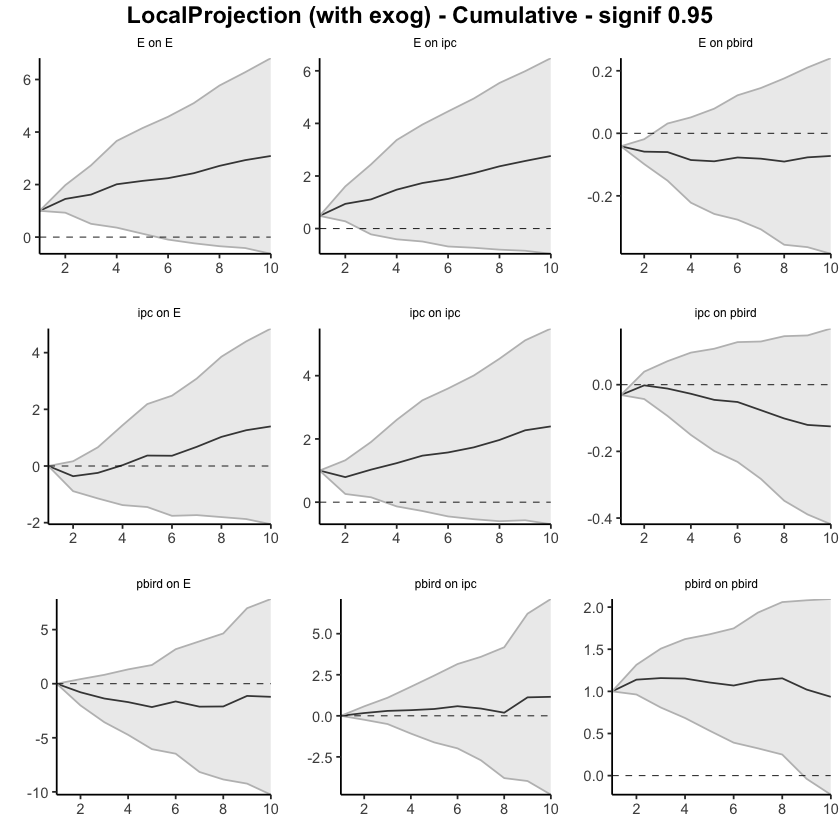

In [59]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            3        0     1          0.68    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.68

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.00000000
24 ipc     E         2      -0.35997999 -0.6291888  -0.09077119
25 ipc     E         3      -0.24255035 -0.7025841   0.21748344
26 ipc     E         4       0.02915599 -0.6893669   0.74767890
27 ipc     E         5       0.36885112 -0.5580758   1.29577802
28 ipc     E         6       0.36198956 -0.7198362   1.44381530
29 ipc     E         7       0.67596137 -0.5530380   1.90496074
30 ipc     E         8       1.02783839 -0.4161288   2.47180556
31 ipc     E         9       1.26231158 -0.3368952   2.86151833
32 ipc     E        10       1.39811945 -0.3634088   3.15964769
33 ipc     E        11       1.76457782 -0.1594657   3.68862135

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000  0.000000    0.0000000 
46 pbird   E         2      -0.7936337 -1.415059   -0.1722080 
47 pbird   E         3      -1.3692595 -2.486268   -0.2522506 
48 pbird   E         4      -1.7009001 -3.244300   -0.1575003 
49 pbird   E         5      -2.1611284 -4.145040   -0.1772167 
50 pbird   E         6      -1.6405374 -4.104829    0.8237542 
51 pbird   E         7      -2.1221713 -5.203764    0.9594213 
52 pbird   E         8      -2.1039804 -5.547495    1.3395338 
53 pbird   E         9      -1.1289694 -5.266014    3.0080750 
54 pbird   E        10      -1.2127982 -5.827774    3.4021773 
55 pbird   E        11      -1.0984178 -6.224302    4.0274659

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4822860 0.4822860   0.482286   
2  E       ipc       2      0.9402764 0.6016226   1.278930   
3  E       ipc       3      1.1101689 0.4315521   1.788786   
4  E       ipc       4      1.4802487 0.5168755   2.443622   
5  E       ipc       5      1.7321623 0.5975697   2.866755   
6  E       ipc       6      1.8880923 0.5772337   3.198951   
7  E       ipc       7      2.1084425 0.6605725   3.556312   
8  E       ipc       8      2.3683585 0.7508573   3.985860   
9  E       ipc       9      2.5715977 0.8291374   4.314058   
10 E       ipc      10      2.7621229 0.8636425   4.660603   
11 E       ipc      11      2.9683443 0.8944635   5.042225

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.00000000 0.0000000  
57 pbird   ipc       2      0.1692487 -0.03918225 0.3776797  
58 pbird   ipc       3      0.2997732 -0.10836234 0.7079087  
59 pbird   ipc       4      0.3442829 -0.38301002 1.0715759  
60 pbird   ipc       5      0.4157764 -0.62182958 1.4533824  
61 pbird   ipc       6      0.5856001 -0.72415111 1.8953513  
62 pbird   ipc       7      0.4431032 -1.16316092 2.0493672  
63 pbird   ipc       8      0.1902471 -1.84135989 2.2218541  
64 pbird   ipc       9      1.1239574 -1.47497188 3.7228867  
65 pbird   ipc      10      1.1564199 -1.88248762 4.1953274  
66 pbird   ipc      11      1.0060321 -2.33057818 4.3426424

impulse response horizon irf_value   lower_bound upper_bound 
12 E       pbird     1      -0.04137582 -0.04137582 -0.041375821
13 E       pbird     2      -0.05865766 -0.07898602 -0.038329304
14 E       pbird     3      -0.06001337 -0.10663299 -0.013393745
15 E       pbird     4      -0.08543131 -0.15506381 -0.015798813
16 E       pbird     5      -0.08953048 -0.17542734 -0.003633621
17 E       pbird     6      -0.07732633 -0.17880573  0.024153076
18 E       pbird     7      -0.08111009 -0.19642504  0.034204866
19 E       pbird     8      -0.09039209 -0.22613547  0.045351286
20 E       pbird     9      -0.07687055 -0.22342866  0.069687567
21 E       pbird    10      -0.07243173 -0.23208718  0.087223728
22 E       pbird    11      -0.07238416 -0.24655917  0.101790856

impulse response horizon irf_value   lower_bound upper_bound
34 ipc     pbird     1      -0.03089163 -0.03089163 -0.03089163
35 ipc     pbird     2      -0.00196470 -0.02291159  0.01898219
36 ipc     pbird     3      -0.01159419 -0.05350975  0.03032138
37 ipc     pbird     4      -0.02721886 -0.09020233  0.03576462
38 ipc     pbird     5      -0.04546170 -0.12370579  0.03278239
39 ipc     pbird     6      -0.05186951 -0.14351110  0.03977208
40 ipc     pbird     7      -0.07647882 -0.18160284  0.02864521
41 ipc     pbird     8      -0.10124935 -0.22715448  0.02465579
42 ipc     pbird     9      -0.12066352 -0.25762868  0.01630165
43 ipc     pbird    10      -0.12505476 -0.27478026  0.02467074
44 ipc     pbird    11      -0.14719650 -0.30903879  0.01464579

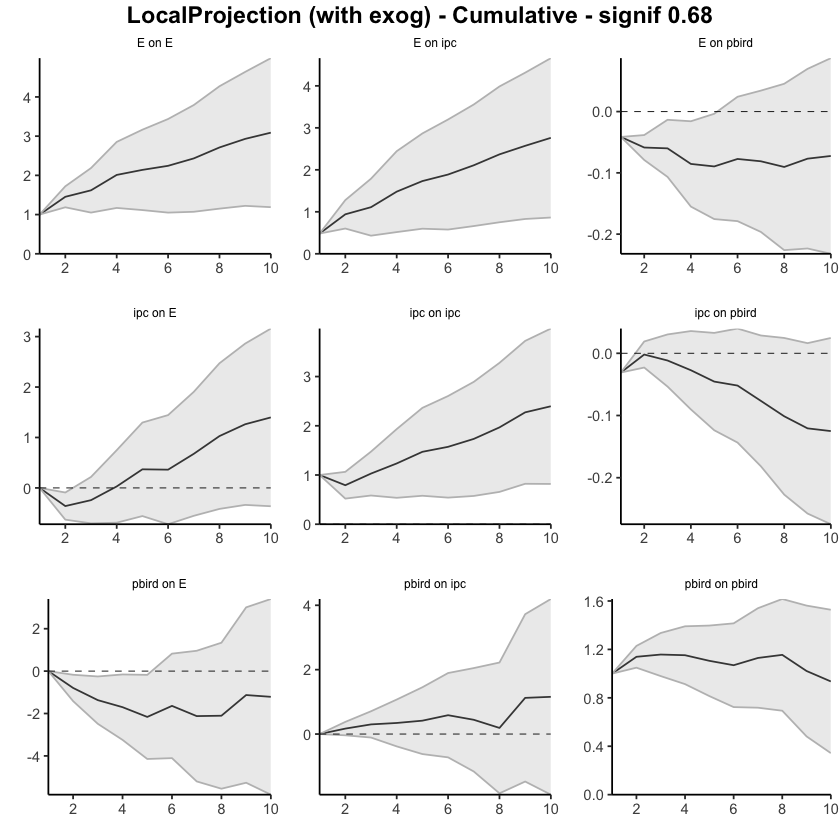

In [60]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.68, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.00000000 0.0000000  
24 ipc     E         2      -0.36748942 -0.90029616 0.1653173  
25 ipc     E         3       0.08396835 -0.28312322 0.4510599  
26 ipc     E         4       0.07635450 -0.51409766 0.6668067  
27 ipc     E         5       0.30977833 -0.08621841 0.7057751  
28 ipc     E         6      -0.04450464 -0.34995211 0.2609428  
29 ipc     E         7       0.43450900  0.10836566 0.7606523  
30 ipc     E         8       0.32857181 -0.06918682 0.7263304  
31 ipc     E         9       0.23017450 -0.08530229 0.5456513  
32 ipc     E        10       0.31230589  0.02579165 0.5988201  
33 ipc     E        11       0.35200048  0.05479253 0.6492084

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000  0.0000000  0.0000000  
46 pbird   E         2      -0.6675376 -1.7440060  0.4089307  
47 pbird   E         3      -0.3157437 -1.1769676  0.5454802  
48 pbird   E         4      -0.4266471 -1.6220982  0.7688041  
49 pbird   E         5      -0.4449584 -1.3059970  0.4160803  
50 pbird   E         6       0.6059037 -0.3359030  1.5477104  
51 pbird   E         7      -0.2149289 -1.2331948  0.8033371  
52 pbird   E         8       0.1795756 -0.4807728  0.8399240  
53 pbird   E         9       1.0381717 -0.1671167  2.2434602  
54 pbird   E        10       0.2482853 -0.5801686  1.0767393  
55 pbird   E        11       0.1655945 -0.7796461  1.1108352

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4811070  0.48110698 0.4811070  
2  E       ipc       2      0.4725830 -0.22451792 1.1696838  
3  E       ipc       3      0.1766230 -0.46877106 0.8220171  
4  E       ipc       4      0.3517061 -0.19608458 0.8994967  
5  E       ipc       5      0.2071844 -0.13691834 0.5512872  
6  E       ipc       6      0.1497906 -0.19948647 0.4990677  
7  E       ipc       7      0.2049127 -0.06480059 0.4746259  
8  E       ipc       8      0.2161579 -0.09294835 0.5252641  
9  E       ipc       9      0.1970275 -0.05900077 0.4530557  
10 E       ipc      10      0.1693841 -0.13710285 0.4758711  
11 E       ipc      11      0.1924160 -0.09225774 0.4770897

impulse response horizon irf_value  lower_bound upper_bound
56 pbird   ipc       1      0.00000000  0.00000000 0.0000000  
57 pbird   ipc       2      0.21452069 -0.16358460 0.5926260  
58 pbird   ipc       3      0.25803026 -0.11734786 0.6334084  
59 pbird   ipc       4      0.06521911 -0.55855935 0.6889976  
60 pbird   ipc       5      0.04912722 -0.65843148 0.7566859  
61 pbird   ipc       6      0.29299172 -0.32243067 0.9084141  
62 pbird   ipc       7      0.04140531 -0.64556432 0.7283749  
63 pbird   ipc       8      0.08076017 -0.62409534 0.7856157  
64 pbird   ipc       9      0.91640469 -0.09744163 1.9302510  
65 pbird   ipc      10      0.12634429 -0.65404934 0.9067379  
66 pbird   ipc      11      0.15477161 -0.49669597 0.8062392

impulse response horizon irf_value     lower_bound upper_bound
12 E       pbird     1      -0.0417111168 -0.04171112 -0.04171112
13 E       pbird     2      -0.0183177987 -0.05615573  0.01952013
14 E       pbird     3      -0.0043722564 -0.06016489  0.05142038
15 E       pbird     4      -0.0165154666 -0.06121969  0.02818876
16 E       pbird     5      -0.0019668657 -0.03338280  0.02944907
17 E       pbird     6       0.0135684306 -0.01633935  0.04347621
18 E       pbird     7      -0.0010482665 -0.02988243  0.02778590
19 E       pbird     8      -0.0083899331 -0.04855125  0.03177138
20 E       pbird     9       0.0120539770 -0.01189369  0.03600165
21 E       pbird    10       0.0035633660 -0.02381187  0.03093861
22 E       pbird    11      -0.0008808603 -0.02878401  0.02702229

impulse response horizon irf_value    lower_bound  upper_bound 
34 ipc     pbird     1      -0.029259909 -0.029259909 -0.029259909
35 ipc     pbird     2       0.034712639 -0.004188138  0.073613417
36 ipc     pbird     3      -0.005482584 -0.047917061  0.036951894
37 ipc     pbird     4       0.013847747 -0.019857433  0.047552927
38 ipc     pbird     5      -0.013998608 -0.044400227  0.016403011
39 ipc     pbird     6      -0.006316854 -0.034391950  0.021758242
40 ipc     pbird     7      -0.023876393 -0.053107894  0.005355108
41 ipc     pbird     8      -0.024948007 -0.065292483  0.015396470
42 ipc     pbird     9      -0.021755608 -0.045629524  0.002118309
43 ipc     pbird    10      -0.008924253 -0.035246001  0.017397495
44 ipc     pbird    11      -0.017721674 -0.040883643  0.005440295

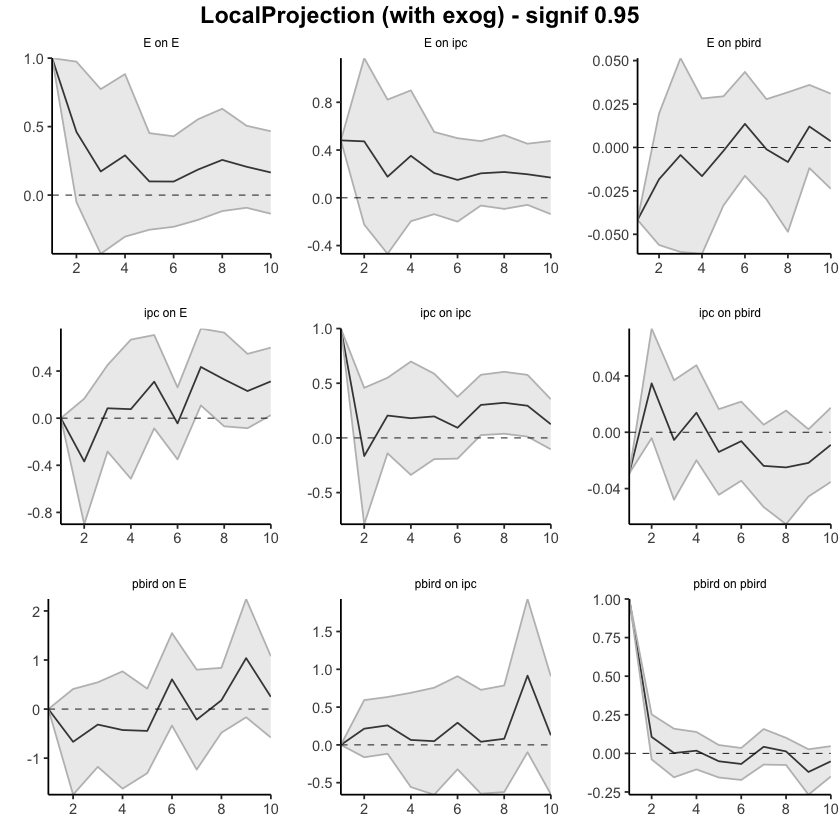

In [61]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000  0.0000000  
24 ipc     E         2      -0.36748942 -0.9002962  0.1653173  
25 ipc     E         3      -0.28352107 -1.1834194  0.6163772  
26 ipc     E         4      -0.20716657 -1.6975170  1.2831839  
27 ipc     E         5       0.10261176 -1.7837355  1.9889590  
28 ipc     E         6       0.05810712 -2.1336876  2.2499018  
29 ipc     E         7       0.49261612 -2.0253219  3.0105541  
30 ipc     E         8       0.82118792 -2.0945087  3.7368846  
31 ipc     E         9       1.05136242 -2.1798110  4.2825359  
32 ipc     E        10       1.36366831 -2.1540194  4.8813560  
33 ipc     E        11       1.71566879 -2.0992268  5.5305644

impulse response horizon irf_value    lower_bound upper_bound
45 pbird   E         1       0.000000000  0.000000   0.0000000  
46 pbird   E         2      -0.667537635 -1.744006   0.4089307  
47 pbird   E         3      -0.983281352 -2.920974   0.9544109  
48 pbird   E         4      -1.409928411 -4.543072   1.7232150  
49 pbird   E         5      -1.854886772 -5.849069   2.1392953  
50 pbird   E         6      -1.248983065 -6.184972   3.6870057  
51 pbird   E         7      -1.463911955 -7.418167   4.4903428  
52 pbird   E         8      -1.284336351 -7.898939   5.3302667  
53 pbird   E         9      -0.246164605 -8.066056   7.5737270  
54 pbird   E        10       0.002120725 -8.646225   8.6504663  
55 pbird   E        11       0.167715274 -9.425871   9.7613015

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4811070  0.4811070  0.481107   
2  E       ipc       2      0.9536899  0.2565891  1.650791   
3  E       ipc       3      1.1303130 -0.2121820  2.472808   
4  E       ipc       4      1.4820190 -0.4082666  3.372305   
5  E       ipc       5      1.6892035 -0.5451849  3.923592   
6  E       ipc       6      1.8389941 -0.7446714  4.422660   
7  E       ipc       7      2.0439068 -0.8094720  4.897286   
8  E       ipc       8      2.2600646 -0.9024203  5.422550   
9  E       ipc       9      2.4570921 -0.9614211  5.875605   
10 E       ipc      10      2.6264762 -1.0985239  6.351476   
11 E       ipc      11      2.8188922 -1.1907817  6.828566

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.0000000  0.000000   
57 pbird   ipc       2      0.2145207 -0.1635846  0.592626   
58 pbird   ipc       3      0.4725510 -0.2809325  1.226034   
59 pbird   ipc       4      0.5377701 -0.8394918  1.915032   
60 pbird   ipc       5      0.5868973 -1.4979233  2.671718   
61 pbird   ipc       6      0.8798890 -1.8203540  3.580132   
62 pbird   ipc       7      0.9212943 -2.4659183  4.308507   
63 pbird   ipc       8      1.0020545 -3.0900136  5.094123   
64 pbird   ipc       9      1.9184592 -3.1874553  7.024374   
65 pbird   ipc      10      2.0448035 -3.8415046  7.931112   
66 pbird   ipc      11      2.1995751 -4.3382006  8.737351

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04171112 -0.04171112 -0.04171112
13 E       pbird     2      -0.06002892 -0.09786685 -0.02219098
14 E       pbird     3      -0.06440117 -0.15803174  0.02922940
15 E       pbird     4      -0.08091664 -0.21925143  0.05741815
16 E       pbird     5      -0.08288350 -0.25263423  0.08686722
17 E       pbird     6      -0.06931507 -0.26897358  0.13034343
18 E       pbird     7      -0.07036334 -0.29885601  0.15812933
19 E       pbird     8      -0.07875327 -0.34740726  0.18990071
20 E       pbird     9      -0.06669930 -0.35930095  0.22590236
21 E       pbird    10      -0.06313593 -0.38311282  0.25684096
22 E       pbird    11      -0.06401679 -0.41189683  0.28386325

impulse response horizon irf_value     lower_bound upper_bound
34 ipc     pbird     1      -2.925991e-02 -0.02925991 -0.02925991
35 ipc     pbird     2       5.452730e-03 -0.03344805  0.04435351
36 ipc     pbird     3      -2.985345e-05 -0.08136511  0.08130540
37 ipc     pbird     4       1.381789e-02 -0.10122254  0.12885833
38 ipc     pbird     5      -1.807139e-04 -0.14562277  0.14526134
39 ipc     pbird     6      -6.497568e-03 -0.18001472  0.16701958
40 ipc     pbird     7      -3.037396e-02 -0.23312261  0.17237469
41 ipc     pbird     8      -5.532197e-02 -0.29841509  0.18777116
42 ipc     pbird     9      -7.707758e-02 -0.34404462  0.18988947
43 ipc     pbird    10      -8.600183e-02 -0.37929062  0.20728696
44 ipc     pbird    11      -1.037235e-01 -0.42017426  0.21272726

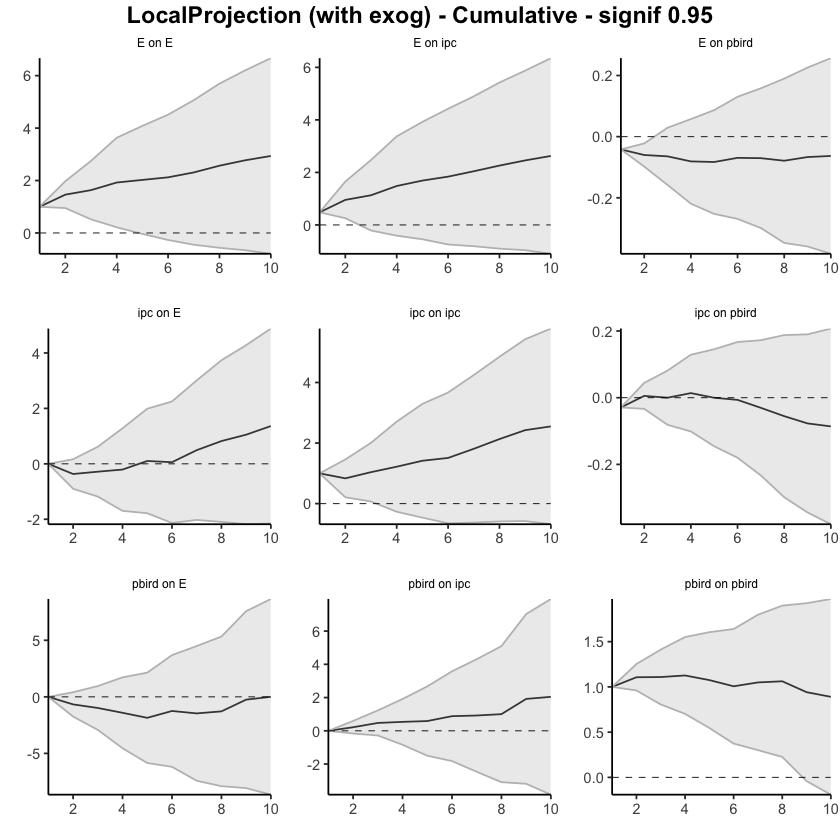

In [62]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.68    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   1   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.68

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.00000000
24 ipc     E         2      -0.36748942 -0.6393296  -0.09564925
25 ipc     E         3      -0.28352107 -0.7426529   0.17561072
26 ipc     E         4      -0.20716657 -0.9675495   0.55321632
27 ipc     E         5       0.10261176 -0.8598103   1.06503381
28 ipc     E         6       0.05810712 -1.0601555   1.17636971
29 ipc     E         7       0.49261612 -0.7920461   1.77727837
30 ipc     E         8       0.82118792 -0.6664124   2.30878825
31 ipc     E         9       1.05136242 -0.5971955   2.69992030
32 ipc     E        10       1.36366831 -0.4310703   3.15840692
33 ipc     E        11       1.71566879 -0.2307065   3.66204411

impulse response horizon irf_value    lower_bound upper_bound 
45 pbird   E         1       0.000000000  0.000000    0.000000000
46 pbird   E         2      -0.667537635 -1.216756   -0.118319088
47 pbird   E         3      -0.983281352 -1.971900    0.005337145
48 pbird   E         4      -1.409928411 -3.008471    0.188614141
49 pbird   E         5      -1.854886772 -3.892735    0.182961207
50 pbird   E         6      -1.248983065 -3.767345    1.269378551
51 pbird   E         7      -1.463911955 -4.501797    1.573973103
52 pbird   E         8      -1.284336351 -4.659134    2.090461147
53 pbird   E         9      -0.246164605 -4.235905    3.743576003
54 pbird   E        10       0.002120725 -4.410300    4.414541920
55 pbird   E        11       0.167715274 -4.726972    5.062402100

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4811070 0.4811070   0.481107   
2  E       ipc       2      0.9536899 0.5980262   1.309354   
3  E       ipc       3      1.1303130 0.4453666   1.815259   
4  E       ipc       4      1.4820190 0.5175876   2.446450   
5  E       ipc       5      1.6892035 0.5492094   2.829198   
6  E       ipc       6      1.8389941 0.5207974   3.157191   
7  E       ipc       7      2.0439068 0.5881013   3.499712   
8  E       ipc       8      2.2600646 0.6465519   3.873577   
9  E       ipc       9      2.4570921 0.7129527   4.201231   
10 E       ipc      10      2.6264762 0.7259659   4.526986   
11 E       ipc      11      2.8188922 0.7731402   4.864644

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.00000000 0.0000000  
57 pbird   ipc       2      0.2145207  0.02160983 0.4074316  
58 pbird   ipc       3      0.4725510  0.08812064 0.8569813  
59 pbird   ipc       4      0.5377701 -0.16491456 1.2404547  
60 pbird   ipc       5      0.5868973 -0.47678668 1.6505813  
61 pbird   ipc       6      0.8798890 -0.49778598 2.2575640  
62 pbird   ipc       7      0.9212943 -0.80687538 2.6494640  
63 pbird   ipc       8      1.0020545 -1.08573536 3.0898444  
64 pbird   ipc       9      1.9184592 -0.68659921 4.5235176  
65 pbird   ipc      10      2.0448035 -0.95841493 5.0480219  
66 pbird   ipc      11      2.1995751 -1.13602475 5.5351749

impulse response horizon irf_value   lower_bound upper_bound 
12 E       pbird     1      -0.04171112 -0.04171112 -0.041711117
13 E       pbird     2      -0.06002892 -0.07933398 -0.040723848
14 E       pbird     3      -0.06440117 -0.11217187 -0.016630473
15 E       pbird     4      -0.08091664 -0.15149561 -0.010337664
16 E       pbird     5      -0.08288350 -0.16949102  0.003724008
17 E       pbird     6      -0.06931507 -0.17118166  0.032551511
18 E       pbird     7      -0.07036334 -0.18694123  0.046214552
19 E       pbird     8      -0.07875327 -0.21582163  0.058315085
20 E       pbird     9      -0.06669930 -0.21598585  0.082587261
21 E       pbird    10      -0.06313593 -0.22638945  0.100117587
22 E       pbird    11      -0.06401679 -0.24150661  0.113473025

impulse response horizon irf_value     lower_bound upper_bound
34 ipc     pbird     1      -2.925991e-02 -0.02925991 -0.02925991
35 ipc     pbird     2       5.452730e-03 -0.01439461  0.02530007
36 ipc     pbird     3      -2.985345e-05 -0.04152743  0.04146773
37 ipc     pbird     4       1.381789e-02 -0.04487621  0.07251199
38 ipc     pbird     5      -1.807139e-04 -0.07438584  0.07402442
39 ipc     pbird     6      -6.497568e-03 -0.09502673  0.08203159
40 ipc     pbird     7      -3.037396e-02 -0.13381715  0.07306923
41 ipc     pbird     8      -5.532197e-02 -0.17934907  0.06870514
42 ipc     pbird     9      -7.707758e-02 -0.21328525  0.05913010
43 ipc     pbird    10      -8.600183e-02 -0.23563897  0.06363531
44 ipc     pbird    11      -1.037235e-01 -0.26517797  0.05773097

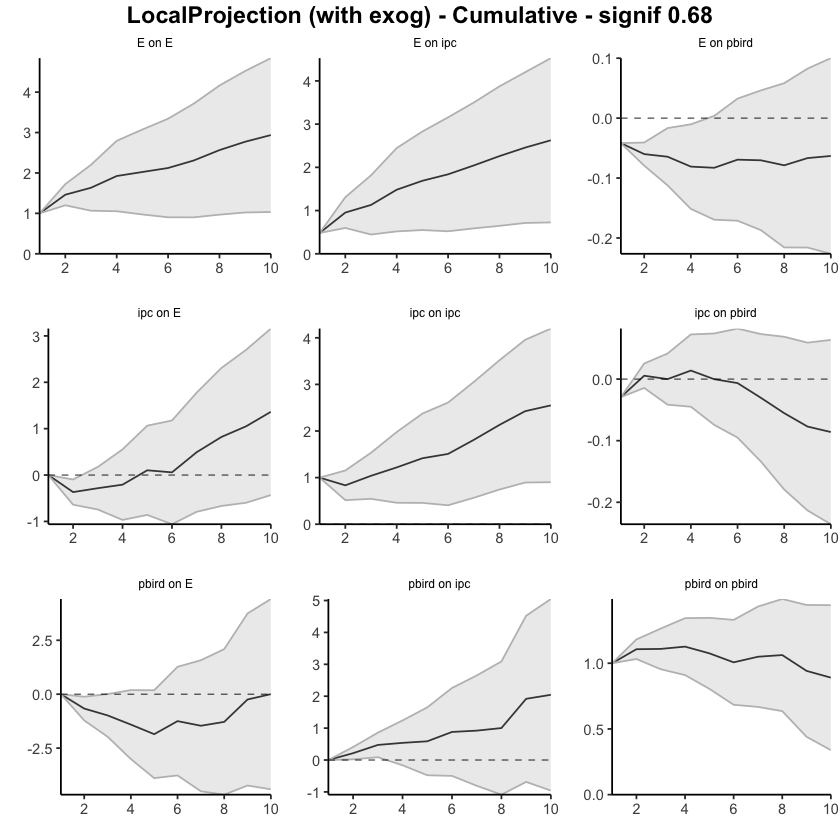

In [63]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.68, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            3        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   1   2   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.00000000 0.0000000  
24 ipc     E         2      -0.35966781 -0.91492696 0.1955913  
25 ipc     E         3       0.10034867 -0.25640179 0.4570991  
26 ipc     E         4       0.27318073 -0.18183053 0.7281920  
27 ipc     E         5       0.36169950 -0.04573501 0.7691340  
28 ipc     E         6      -0.03296033 -0.33705388 0.2711332  
29 ipc     E         7       0.29476096 -0.01065454 0.6001765  
30 ipc     E         8       0.36658613 -0.05507422 0.7882465  
31 ipc     E         9       0.23136125 -0.06772924 0.5304517  
32 ipc     E        10       0.14030405 -0.15234762 0.4329557  
33 ipc     E        11       0.37054665  0.05351829 0.6875750

impulse response horizon irf_value   lower_bound upper_bound
45 pbird   E         1       0.00000000  0.0000000  0.0000000  
46 pbird   E         2      -0.84120565 -2.0361728  0.3537615  
47 pbird   E         3      -0.58777991 -1.5768108  0.4012510  
48 pbird   E         4      -0.37195680 -1.2141622  0.4702486  
49 pbird   E         5      -0.53542524 -1.4082830  0.3374326  
50 pbird   E         6       0.48472215 -0.4542790  1.4237233  
51 pbird   E         7      -0.54181992 -1.6514712  0.5678314  
52 pbird   E         8       0.03147470 -0.6646379  0.7275873  
53 pbird   E         9       1.07534390 -0.3090145  2.4597023  
54 pbird   E        10       0.06285884 -1.0950691  1.2207868  
55 pbird   E        11       0.18977034 -0.6488889  1.0284296

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4821919  0.48219189 0.4821919  
2  E       ipc       2      0.4558209 -0.26943508 1.1810768  
3  E       ipc       3      0.1744615 -0.43362755 0.7825505  
4  E       ipc       4      0.3691687 -0.18067846 0.9190158  
5  E       ipc       5      0.2464376 -0.08693634 0.5798115  
6  E       ipc       6      0.1564002 -0.18399248 0.4967928  
7  E       ipc       7      0.2180447 -0.04802592 0.4841154  
8  E       ipc       8      0.2576313 -0.05964498 0.5749075  
9  E       ipc       9      0.2072910 -0.03423818 0.4488202  
10 E       ipc      10      0.1829691 -0.10158871 0.4675269  
11 E       ipc      11      0.1945035 -0.13434265 0.5233496

impulse response horizon irf_value   lower_bound upper_bound
56 pbird   ipc       1       0.00000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.14520239 -0.2815824  0.5719872  
58 pbird   ipc       3       0.09708600 -0.3169894  0.5111614  
59 pbird   ipc       4       0.07666530 -0.5320215  0.6853521  
60 pbird   ipc       5       0.07290597 -0.5834341  0.7292460  
61 pbird   ipc       6       0.19261443 -0.3739176  0.7591465  
62 pbird   ipc       7      -0.13808810 -0.6644599  0.3882837  
63 pbird   ipc       8      -0.28182210 -1.0561668  0.4925226  
64 pbird   ipc       9       0.96637592 -0.1437805  2.0765324  
65 pbird   ipc      10       0.12050263 -0.9331928  1.1741981  
66 pbird   ipc      11      -0.02473314 -0.6112112  0.5617449

impulse response horizon irf_value    lower_bound  upper_bound
12 E       pbird     1      -0.040307913 -0.040307913 -0.04030791
13 E       pbird     2      -0.019230467 -0.060460300  0.02199937
14 E       pbird     3      -0.004256657 -0.058892189  0.05037887
15 E       pbird     4      -0.018775016 -0.066611700  0.02906167
16 E       pbird     5      -0.004607507 -0.035204738  0.02598972
17 E       pbird     6       0.013938821 -0.016351244  0.04422889
18 E       pbird     7      -0.002186456 -0.030338178  0.02596527
19 E       pbird     8      -0.008649540 -0.049048839  0.03174976
20 E       pbird     9       0.012563052 -0.009282838  0.03440894
21 E       pbird    10       0.004139184 -0.021958098  0.03023647
22 E       pbird    11      -0.001199549 -0.030348089  0.02794899

impulse response horizon irf_value    lower_bound upper_bound 
34 ipc     pbird     1      -0.029674563 -0.02967456 -0.029674563
35 ipc     pbird     2       0.027235055 -0.01583517  0.070305279
36 ipc     pbird     3      -0.008612251 -0.05049241  0.033267905
37 ipc     pbird     4       0.011926079 -0.02368890  0.047541056
38 ipc     pbird     5      -0.015471750 -0.04548761  0.014544109
39 ipc     pbird     6      -0.007988643 -0.03551433  0.019537041
40 ipc     pbird     7      -0.026505156 -0.05494616  0.001935843
41 ipc     pbird     8      -0.025678321 -0.06645006  0.015093416
42 ipc     pbird     9      -0.019897532 -0.04210701  0.002311943
43 ipc     pbird    10      -0.004299150 -0.02926438  0.020666083
44 ipc     pbird    11      -0.018931527 -0.04294219  0.005079137

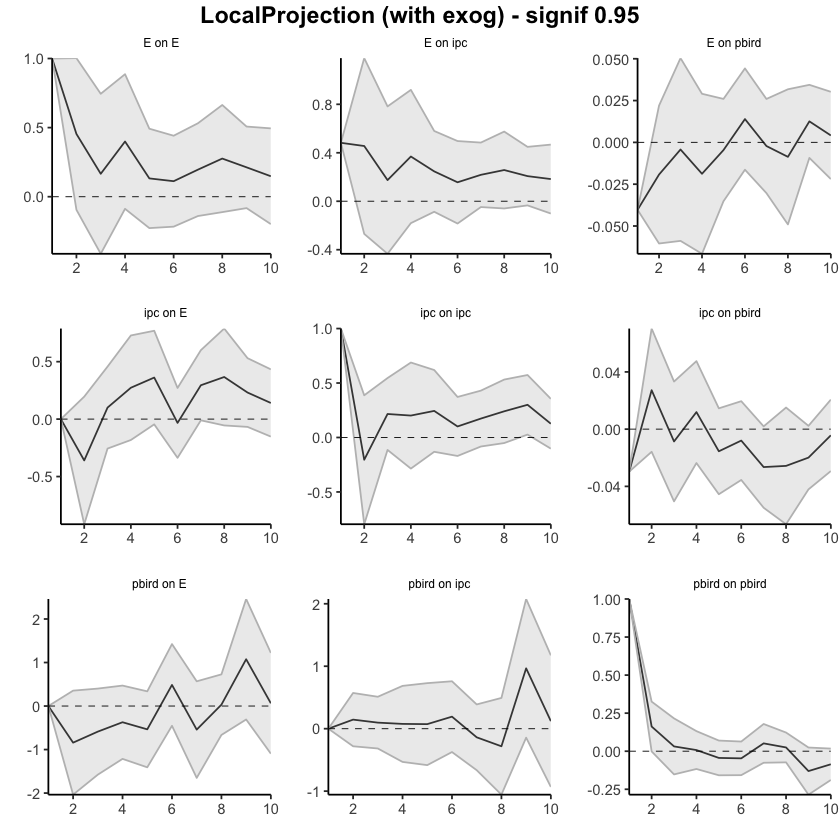

In [64]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            3        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   1   2   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.000000   0.0000000  
24 ipc     E         2      -0.35966781 -0.914927   0.1955913  
25 ipc     E         3      -0.25931914 -1.171329   0.6526905  
26 ipc     E         4       0.01386159 -1.353159   1.3808825  
27 ipc     E         5       0.37556109 -1.398894   2.1500165  
28 ipc     E         6       0.34260077 -1.735948   2.4211497  
29 ipc     E         7       0.63736173 -1.746603   3.0213262  
30 ipc     E         8       1.00394786 -1.801677   3.8095726  
31 ipc     E         9       1.23530911 -1.869406   4.3400244  
32 ipc     E        10       1.37561316 -2.021754   4.7729801  
33 ipc     E        11       1.74615981 -1.968235   5.4605551

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000   0.000000  0.0000000  
46 pbird   E         2      -0.8412056  -2.036173  0.3537615  
47 pbird   E         3      -1.4289856  -3.612984  0.7550124  
48 pbird   E         4      -1.8009424  -4.827146  1.2252610  
49 pbird   E         5      -2.3363676  -6.235429  1.5626936  
50 pbird   E         6      -1.8516454  -6.689708  2.9864169  
51 pbird   E         7      -2.3934654  -8.341179  3.5542483  
52 pbird   E         8      -2.3619907  -9.005817  4.2818355  
53 pbird   E         9      -1.2866468  -9.314831  6.7415379  
54 pbird   E        10      -1.2237879 -10.409901  7.9623247  
55 pbird   E        11      -1.0340176 -11.058789  8.9907542

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4821919  0.4821919  0.4821919  
2  E       ipc       2      0.9380127  0.2127568  1.6632687  
3  E       ipc       3      1.1124742 -0.2208707  2.4458192  
4  E       ipc       4      1.4816429 -0.4015492  3.3648349  
5  E       ipc       5      1.7280804 -0.4884855  3.9446464  
6  E       ipc       6      1.8844806 -0.6724780  4.4414393  
7  E       ipc       7      2.1025253 -0.7205040  4.9255546  
8  E       ipc       8      2.3601566 -0.7801489  5.5004622  
9  E       ipc       9      2.5674477 -0.8143871  5.9492824  
10 E       ipc      10      2.7504167 -0.9159758  6.4168093  
11 E       ipc      11      2.9449202 -1.0503185  6.9401589

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.0000000  0.0000000  
57 pbird   ipc       2      0.1452024 -0.2815824  0.5719872  
58 pbird   ipc       3      0.2422884 -0.5985718  1.0831486  
59 pbird   ipc       4      0.3189537 -1.1305933  1.7685007  
60 pbird   ipc       5      0.3918597 -1.7140274  2.4977467  
61 pbird   ipc       6      0.5844741 -2.0879450  3.2568932  
62 pbird   ipc       7      0.4463860 -2.7524049  3.6451769  
63 pbird   ipc       8      0.1645639 -3.8085717  4.1376995  
64 pbird   ipc       9      1.1309398 -3.9523522  6.2142319  
65 pbird   ipc      10      1.2514424 -4.8855450  7.3884299  
66 pbird   ipc      11      1.2267093 -5.4967562  7.9501748

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04030791 -0.04030791 -0.04030791
13 E       pbird     2      -0.05953838 -0.10076821 -0.01830855
14 E       pbird     3      -0.06379504 -0.15966040  0.03207033
15 E       pbird     4      -0.08257005 -0.22627210  0.06113199
16 E       pbird     5      -0.08717756 -0.26147684  0.08712172
17 E       pbird     6      -0.07323874 -0.27782808  0.13135060
18 E       pbird     7      -0.07542520 -0.30816626  0.15731587
19 E       pbird     8      -0.08407474 -0.35721510  0.18906563
20 E       pbird     9      -0.07151168 -0.36649794  0.22347457
21 E       pbird    10      -0.06737250 -0.38845604  0.25371104
22 E       pbird    11      -0.06857205 -0.41880413  0.28166003

impulse response horizon irf_value     lower_bound upper_bound
34 ipc     pbird     1      -0.0296745629 -0.02967456 -0.02967456
35 ipc     pbird     2      -0.0024395082 -0.04550973  0.04063072
36 ipc     pbird     3      -0.0110517597 -0.09600214  0.07389862
37 ipc     pbird     4       0.0008743193 -0.11969104  0.12143968
38 ipc     pbird     5      -0.0145974310 -0.16517865  0.13598379
39 ipc     pbird     6      -0.0225860739 -0.20069297  0.15552083
40 ipc     pbird     7      -0.0490912302 -0.25563913  0.15745667
41 ipc     pbird     8      -0.0747695510 -0.32208919  0.17255009
42 ipc     pbird     9      -0.0946670831 -0.36419620  0.17486203
43 ipc     pbird    10      -0.0989662326 -0.39346058  0.19552811
44 ipc     pbird    11      -0.1178977593 -0.43640277  0.20060725

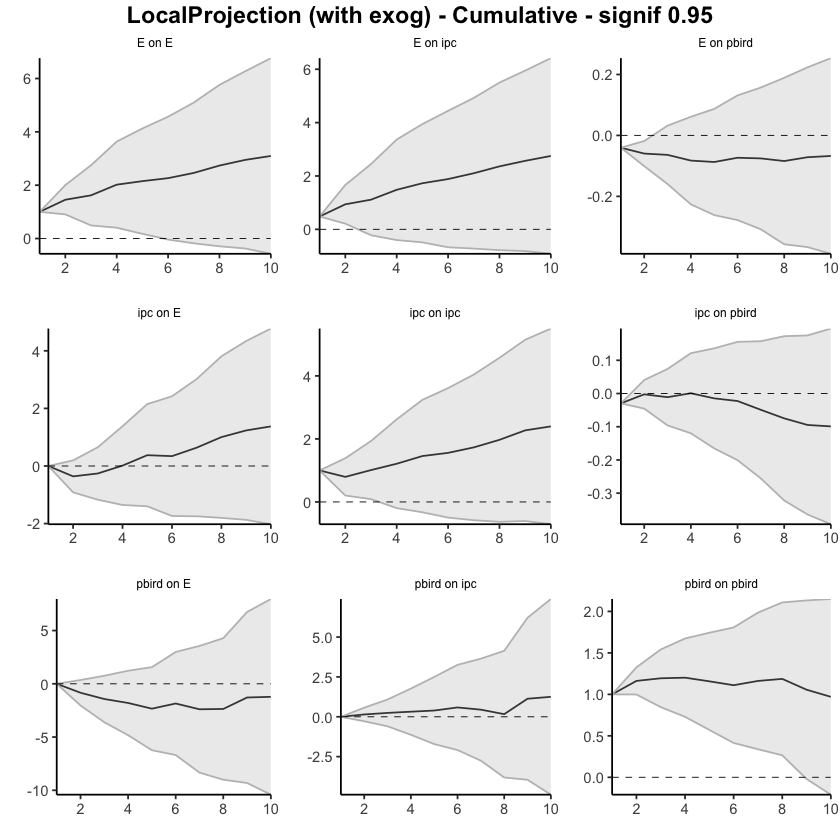

In [65]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            3        0     1          0.68    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   1   1   2   2   2   1   2   2   
3 pbird    1   1   1   2   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.68

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.00000000
24 ipc     E         2      -0.35966781 -0.6429633  -0.07637233
25 ipc     E         3      -0.25931914 -0.7246302   0.20599189
26 ipc     E         4       0.01386159 -0.6835980   0.71132122
27 ipc     E         5       0.37556109 -0.5297733   1.28089547
28 ipc     E         6       0.34260077 -0.7178834   1.40308491
29 ipc     E         7       0.63736173 -0.5789467   1.85367011
30 ipc     E         8       1.00394786 -0.4274934   2.43538907
31 ipc     E         9       1.23530911 -0.3487293   2.81934751
32 ipc     E        10       1.37561316 -0.3577373   3.10896364
33 ipc     E        11       1.74615981 -0.1489398   3.64125945

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000  0.000000    0.0000000 
46 pbird   E         2      -0.8412056 -1.450883   -0.2315286 
47 pbird   E         3      -1.4289856 -2.543270   -0.3147009 
48 pbird   E         4      -1.8009424 -3.344924   -0.2569610 
49 pbird   E         5      -2.3363676 -4.325685   -0.3470507 
50 pbird   E         6      -1.8516454 -4.320045    0.6167537 
51 pbird   E         7      -2.3934654 -5.428013    0.6410824 
52 pbird   E         8      -2.3619907 -5.751698    1.0277166 
53 pbird   E         9      -1.2866468 -5.382659    2.8093658 
54 pbird   E        10      -1.2237879 -5.910580    3.4630042 
55 pbird   E        11      -1.0340176 -6.148697    4.0806619

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4821919 0.4821919   0.4821919  
2  E       ipc       2      0.9380127 0.5679842   1.3080413  
3  E       ipc       3      1.1124742 0.4321962   1.7927523  
4  E       ipc       4      1.4816429 0.5208306   2.4424552  
5  E       ipc       5      1.7280804 0.5971794   2.8589814  
6  E       ipc       6      1.8844806 0.5799099   3.1890513  
7  E       ipc       7      2.1025253 0.6622043   3.5428464  
8  E       ipc       8      2.3601566 0.7579599   3.9623533  
9  E       ipc       9      2.5674477 0.8420218   4.2928736  
10 E       ipc      10      2.7504167 0.8798083   4.6210252  
11 E       ipc      11      2.9449202 0.9065331   4.9833073

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.00000000 0.0000000  
57 pbird   ipc       2      0.1452024 -0.07254495 0.3629497  
58 pbird   ipc       3      0.2422884 -0.18672190 0.6712987  
59 pbird   ipc       4      0.3189537 -0.42061111 1.0585185  
60 pbird   ipc       5      0.3918597 -0.68257250 1.4662918  
61 pbird   ipc       6      0.5844741 -0.77900504 1.9479532  
62 pbird   ipc       7      0.4463860 -1.18565018 2.0784222  
63 pbird   ipc       8      0.1645639 -1.86254609 2.1916739  
64 pbird   ipc       9      1.1309398 -1.46257653 3.7244562  
65 pbird   ipc      10      1.2514424 -1.87967362 4.3825585  
66 pbird   ipc      11      1.2267093 -2.20363023 4.6570488

impulse response horizon irf_value   lower_bound upper_bound 
12 E       pbird     1      -0.04030791 -0.04030791 -0.040307913
13 E       pbird     2      -0.05953838 -0.08057401 -0.038502751
14 E       pbird     3      -0.06379504 -0.11270594 -0.014884137
15 E       pbird     4      -0.08257005 -0.15588743 -0.009252682
16 E       pbird     5      -0.08717756 -0.17610576  0.001750643
17 E       pbird     6      -0.07323874 -0.17762106  0.031143579
18 E       pbird     7      -0.07542520 -0.19417064  0.043320246
19 E       pbird     8      -0.08407474 -0.22343207  0.055282595
20 E       pbird     9      -0.07151168 -0.22201488  0.078991509
21 E       pbird    10      -0.06737250 -0.23119063  0.096445633
22 E       pbird    11      -0.06857205 -0.24726189  0.110117787

impulse response horizon irf_value     lower_bound upper_bound
34 ipc     pbird     1      -0.0296745629 -0.02967456 -0.02967456
35 ipc     pbird     2      -0.0024395082 -0.02441411  0.01953510
36 ipc     pbird     3      -0.0110517597 -0.05439379  0.03229027
37 ipc     pbird     4       0.0008743193 -0.06063862  0.06238726
38 ipc     pbird     5      -0.0145974310 -0.09142458  0.06222972
39 ipc     pbird     6      -0.0225860739 -0.11345694  0.06828479
40 ipc     pbird     7      -0.0490912302 -0.15447281  0.05629035
41 ipc     pbird     8      -0.0747695510 -0.20095304  0.05141394
42 ipc     pbird     9      -0.0946670831 -0.23218194  0.04284777
43 ipc     pbird    10      -0.0989662326 -0.24921845  0.05128598
44 ipc     pbird    11      -0.1178977593 -0.28040032  0.04460480

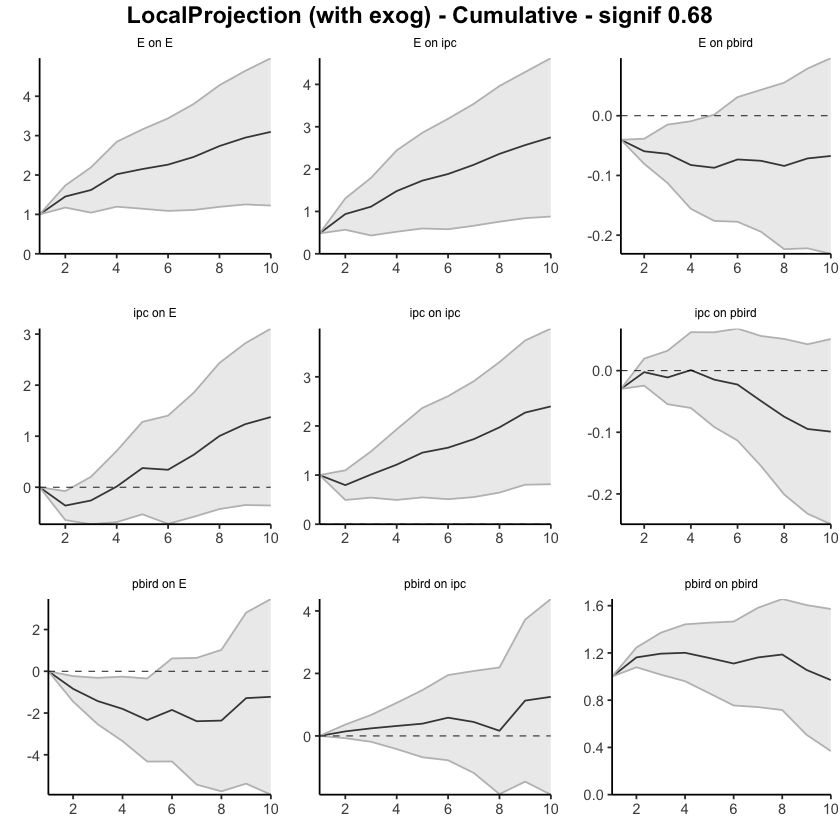

In [66]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.68, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   2   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   2   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   2   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.00000000 0.0000000  
24 ipc     E         2      -0.37338120 -0.92869369 0.1819313  
25 ipc     E         3       0.07887111 -0.38729427 0.5450365  
26 ipc     E         4       0.07933808 -0.49949712 0.6581733  
27 ipc     E         5       0.31782851 -0.08154466 0.7172017  
28 ipc     E         6      -0.05476223 -0.38773612 0.2782117  
29 ipc     E         7       0.42711147  0.09876941 0.7554535  
30 ipc     E         8       0.32512985 -0.06898363 0.7192433  
31 ipc     E         9       0.23717727 -0.08515762 0.5595122  
32 ipc     E        10       0.13126852 -0.19071910 0.4532561  
33 ipc     E        11       0.33716859  0.05599366 0.6183435

impulse response horizon irf_value   lower_bound upper_bound
45 pbird   E         1       0.00000000  0.0000000  0.0000000  
46 pbird   E         2      -0.67556908 -1.7578458  0.4067076  
47 pbird   E         3      -0.34271213 -1.1883727  0.5029484  
48 pbird   E         4      -0.42080340 -1.6374443  0.7958375  
49 pbird   E         5      -0.40069949 -1.2607846  0.4593856  
50 pbird   E         6       0.56856276 -0.3413779  1.4785034  
51 pbird   E         7      -0.14820319 -1.1472865  0.8508801  
52 pbird   E         8       0.22910437 -0.4615035  0.9197123  
53 pbird   E         9       1.04039940 -0.1770901  2.2578889  
54 pbird   E        10       0.08180859 -0.6946905  0.8583077  
55 pbird   E        11       0.19254570 -0.7383533  1.1234447

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4816538  0.48165383 0.4816538  
2  E       ipc       2      0.4789386 -0.24788023 1.2057575  
3  E       ipc       3      0.1797672 -0.40719843 0.7667328  
4  E       ipc       4      0.3504021 -0.20947319 0.9102775  
5  E       ipc       5      0.2013940 -0.15065212 0.5534402  
6  E       ipc       6      0.1426441 -0.20871608 0.4940044  
7  E       ipc       7      0.1989937 -0.07876313 0.4767504  
8  E       ipc       8      0.2113361 -0.10689857 0.5295708  
9  E       ipc       9      0.1870968 -0.06874792 0.4429416  
10 E       ipc      10      0.1726817 -0.13697884 0.4823423  
11 E       ipc      11      0.2073964 -0.06610179 0.4808947

impulse response horizon irf_value  lower_bound upper_bound
56 pbird   ipc       1      0.00000000  0.00000000 0.0000000  
57 pbird   ipc       2      0.21695059 -0.18943072 0.6233319  
58 pbird   ipc       3      0.21611579 -0.13875760 0.5709892  
59 pbird   ipc       4      0.07448505 -0.55140020 0.7003703  
60 pbird   ipc       5      0.09574529 -0.64891895 0.8404095  
61 pbird   ipc       6      0.27950947 -0.35217560 0.9111945  
62 pbird   ipc       7      0.08806675 -0.60501059 0.7811441  
63 pbird   ipc       8      0.11853464 -0.54638274 0.7834520  
64 pbird   ipc       9      0.91957083 -0.07231243 1.9114541  
65 pbird   ipc      10      0.14743856 -0.54777813 0.8426553  
66 pbird   ipc      11      0.16313309 -0.50299316 0.8292593

impulse response horizon irf_value     lower_bound upper_bound
12 E       pbird     1      -0.0422754642 -0.04227546 -0.04227546
13 E       pbird     2      -0.0195681024 -0.05828644  0.01915023
14 E       pbird     3      -0.0044035948 -0.05911324  0.05030605
15 E       pbird     4      -0.0152005695 -0.06045717  0.03005603
16 E       pbird     5      -0.0023297778 -0.03304401  0.02838445
17 E       pbird     6       0.0137365687 -0.01687529  0.04434843
18 E       pbird     7      -0.0009855975 -0.03107130  0.02910010
19 E       pbird     8      -0.0087731130 -0.04898995  0.03144372
20 E       pbird     9       0.0128068259 -0.01161936  0.03723301
21 E       pbird    10       0.0035787338 -0.02468605  0.03184351
22 E       pbird    11      -0.0029951365 -0.03122879  0.02523851

impulse response horizon irf_value    lower_bound upper_bound 
34 ipc     pbird     1      -0.033184872 -0.03318487 -0.033184872
35 ipc     pbird     2       0.034137613 -0.00452596  0.072801186
36 ipc     pbird     3      -0.003998558 -0.04851306  0.040515943
37 ipc     pbird     4       0.012399988 -0.02090349  0.045703469
38 ipc     pbird     5      -0.013655006 -0.04315575  0.015845736
39 ipc     pbird     6      -0.005929008 -0.03452311  0.022665097
40 ipc     pbird     7      -0.023605231 -0.05349257  0.006282109
41 ipc     pbird     8      -0.025565463 -0.06562514  0.014494219
42 ipc     pbird     9      -0.021370305 -0.04518315  0.002442538
43 ipc     pbird    10      -0.009752678 -0.03645616  0.016950800
44 ipc     pbird    11      -0.016909350 -0.04057343  0.006754733

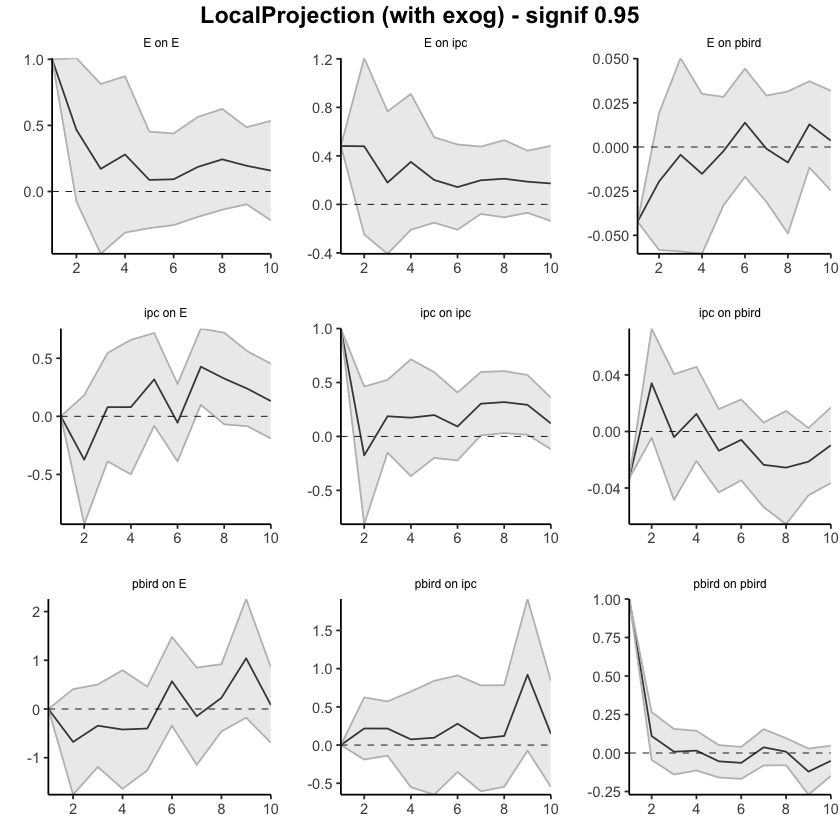

In [67]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   2   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   2   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   2   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000  0.0000000  
24 ipc     E         2      -0.37338120 -0.9286937  0.1819313  
25 ipc     E         3      -0.29451009 -1.3159880  0.7269678  
26 ipc     E         4      -0.21517201 -1.8154851  1.3851410  
27 ipc     E         5       0.10265649 -1.8970297  2.1023427  
28 ipc     E         6       0.04789427 -2.2847659  2.3805544  
29 ipc     E         7       0.47500574 -2.1859964  3.1360079  
30 ipc     E         8       0.80013559 -2.2549801  3.8552513  
31 ipc     E         9       1.03731286 -2.3401377  4.4147634  
32 ipc     E        10       1.16858138 -2.5308568  4.8680196  
33 ipc     E        11       1.50574997 -2.4748631  5.4863631

impulse response horizon irf_value   lower_bound upper_bound
45 pbird   E         1       0.00000000  0.000000   0.0000000  
46 pbird   E         2      -0.67556908 -1.757846   0.4067076  
47 pbird   E         3      -1.01828122 -2.946218   0.9096561  
48 pbird   E         4      -1.43908462 -4.583663   1.7054936  
49 pbird   E         5      -1.83978411 -5.844447   2.1648792  
50 pbird   E         6      -1.27122136 -6.185825   3.6433825  
51 pbird   E         7      -1.41942454 -7.333112   4.4942626  
52 pbird   E         8      -1.19032018 -7.794615   5.4139749  
53 pbird   E         9      -0.14992078 -7.971705   7.6718638  
54 pbird   E        10      -0.06811219 -8.666396   8.5301715  
55 pbird   E        11       0.12443352 -9.404749   9.6536162

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4816538  0.4816538  0.4816538  
2  E       ipc       2      0.9605924  0.2337736  1.6874113  
3  E       ipc       3      1.1403596 -0.1734248  2.4541441  
4  E       ipc       4      1.4907618 -0.3828980  3.3644216  
5  E       ipc       5      1.6921558 -0.5335501  3.9178618  
6  E       ipc       6      1.8348000 -0.7422662  4.4118662  
7  E       ipc       7      2.0337936 -0.8210294  4.8886166  
8  E       ipc       8      2.2451297 -0.9279279  5.4181874  
9  E       ipc       9      2.4322266 -0.9966758  5.8611290  
10 E       ipc      10      2.6049083 -1.1336547  6.3434713  
11 E       ipc      11      2.8123047 -1.1997565  6.8243660

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.0000000  0.0000000  
57 pbird   ipc       2      0.2169506 -0.1894307  0.6233319  
58 pbird   ipc       3      0.4330664 -0.3281883  1.1943211  
59 pbird   ipc       4      0.5075514 -0.8795885  1.8946914  
60 pbird   ipc       5      0.6032967 -1.5285075  2.7351009  
61 pbird   ipc       6      0.8828062 -1.8806831  3.6462955  
62 pbird   ipc       7      0.9708729 -2.4856937  4.4274395  
63 pbird   ipc       8      1.0894076 -3.0320764  5.2108916  
64 pbird   ipc       9      2.0089784 -3.1043888  7.1223456  
65 pbird   ipc      10      2.1564170 -3.6521670  7.9650009  
66 pbird   ipc      11      2.3195501 -4.1551601  8.7942602

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04227546 -0.04227546 -0.04227546
13 E       pbird     2      -0.06184357 -0.10056190 -0.02312523
14 E       pbird     3      -0.06624716 -0.15967514  0.02718081
15 E       pbird     4      -0.08144773 -0.22013231  0.05723684
16 E       pbird     5      -0.08377751 -0.25317632  0.08562130
17 E       pbird     6      -0.07004094 -0.27005161  0.12996973
18 E       pbird     7      -0.07102654 -0.30112290  0.15906983
19 E       pbird     8      -0.07979965 -0.35011285  0.19051355
20 E       pbird     9      -0.06699282 -0.36173221  0.22774656
21 E       pbird    10      -0.06341409 -0.38641826  0.25959007
22 E       pbird    11      -0.06640923 -0.41764704  0.28482859

impulse response horizon irf_value     lower_bound upper_bound
34 ipc     pbird     1      -0.0331848720 -0.03318487 -0.03318487
35 ipc     pbird     2       0.0009527413 -0.03771083  0.03961631
36 ipc     pbird     3      -0.0030458168 -0.08622389  0.08013226
37 ipc     pbird     4       0.0093541713 -0.10712738  0.12583573
38 ipc     pbird     5      -0.0043008343 -0.15028313  0.14168146
39 ipc     pbird     6      -0.0102298427 -0.18480624  0.16434656
40 ipc     pbird     7      -0.0338350740 -0.23829882  0.17062867
41 ipc     pbird     8      -0.0594005369 -0.30392396  0.18512289
42 ipc     pbird     9      -0.0807708416 -0.34910711  0.18756543
43 ipc     pbird    10      -0.0905235194 -0.38556326  0.20451623
44 ipc     pbird    11      -0.1074328697 -0.42613670  0.21127096

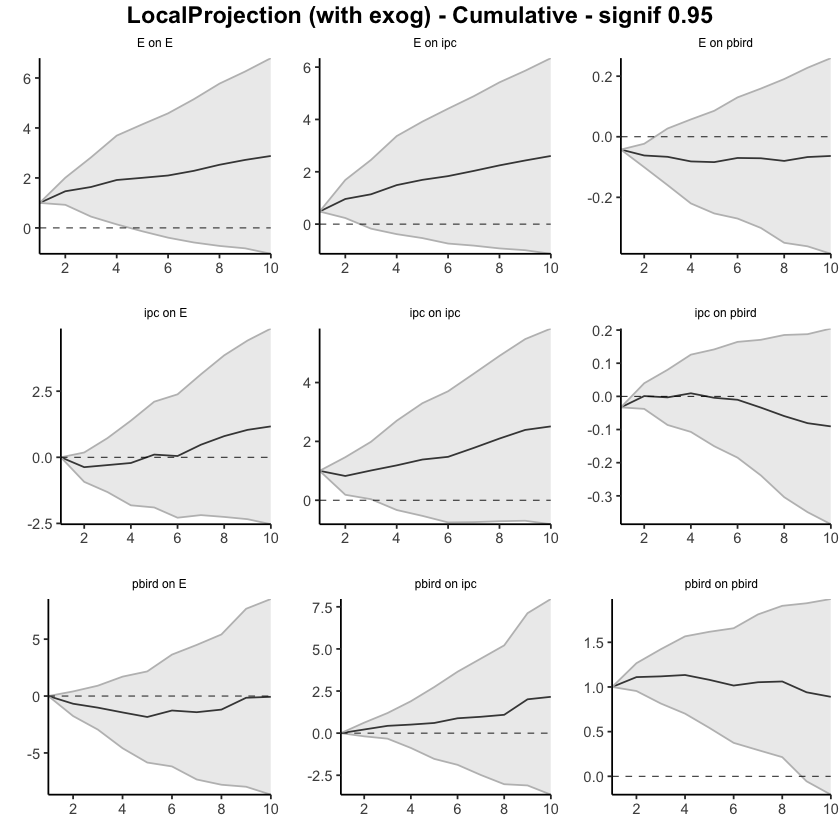

In [68]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            2        0     1          0.68    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   2   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   2   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   1   1   2   1   1   1   2   1   
2 ipc      2   2   1   1   2   1   1   1   2   1   
3 pbird    1   1   1   2   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.68

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.00000000
24 ipc     E         2      -0.37338120 -0.6567039  -0.09005851
25 ipc     E         3      -0.29451009 -0.8156723   0.22665208
26 ipc     E         4      -0.21517201 -1.0316583   0.60131424
27 ipc     E         5       0.10265649 -0.9175916   1.12290457
28 ipc     E         6       0.04789427 -1.1422384   1.23802698
29 ipc     E         7       0.47500574 -0.8826484   1.83265991
30 ipc     E         8       0.80013559 -0.7585969   2.35886807
31 ipc     E         9       1.03731286 -0.6858762   2.76050192
32 ipc     E        10       1.16858138 -0.7188871   3.05604984
33 ipc     E        11       1.50574997 -0.5251751   3.53667503

impulse response horizon irf_value   lower_bound upper_bound
45 pbird   E         1       0.00000000  0.000000    0.00000000
46 pbird   E         2      -0.67556908 -1.227751   -0.12338708
47 pbird   E         3      -1.01828122 -2.001923   -0.03463975
48 pbird   E         4      -1.43908462 -3.043461    0.16529202
49 pbird   E         5      -1.83978411 -3.882980    0.20341144
50 pbird   E         6      -1.27122136 -3.778672    1.23622961
51 pbird   E         7      -1.41942454 -4.436612    1.59776278
52 pbird   E         8      -1.19032018 -4.559858    2.17921813
53 pbird   E         9      -0.14992078 -4.140627    3.84078564
54 pbird   E        10      -0.06811219 -4.454992    4.31876724
55 pbird   E        11       0.12443352 -4.737394    4.98626139

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4816538 0.4816538   0.4816538  
2  E       ipc       2      0.9605924 0.5897665   1.3314184  
3  E       ipc       3      1.1403596 0.4700614   1.8106578  
4  E       ipc       4      1.4907618 0.5348129   2.4467107  
5  E       ipc       5      1.6921558 0.5565916   2.8277201  
6  E       ipc       6      1.8348000 0.5199703   3.1496297  
7  E       ipc       7      2.0337936 0.5772513   3.4903360  
8  E       ipc       8      2.2451297 0.6262228   3.8640367  
9  E       ipc       9      2.4322266 0.6827866   4.1816666  
10 E       ipc      10      2.6049083 0.6974782   4.5123384  
11 E       ipc      11      2.8123047 0.7653347   4.8592748

impulse response horizon irf_value lower_bound  upper_bound
56 pbird   ipc       1      0.0000000  0.000000000 0.0000000  
57 pbird   ipc       2      0.2169506  0.009613186 0.4242880  
58 pbird   ipc       3      0.4330664  0.044671124 0.8214616  
59 pbird   ipc       4      0.5075514 -0.200173037 1.2152759  
60 pbird   ipc       5      0.6032967 -0.484358477 1.6909519  
61 pbird   ipc       6      0.8828062 -0.527137310 2.2927497  
62 pbird   ipc       7      0.9708729 -0.792681450 2.7344273  
63 pbird   ipc       8      1.0894076 -1.013390375 3.1922055  
64 pbird   ipc       9      2.0089784 -0.599882433 4.6178392  
65 pbird   ipc      10      2.1564170 -0.807146264 5.1199802  
66 pbird   ipc      11      2.3195501 -0.983873507 5.6229736

impulse response horizon irf_value   lower_bound upper_bound 
12 E       pbird     1      -0.04227546 -0.04227546 -0.042275464
13 E       pbird     2      -0.06184357 -0.08159782 -0.042089314
14 E       pbird     3      -0.06624716 -0.11391450 -0.018579827
15 E       pbird     4      -0.08144773 -0.15220517 -0.010690294
16 E       pbird     5      -0.08377751 -0.17020547  0.002650454
17 E       pbird     6      -0.07004094 -0.17208720  0.032005318
18 E       pbird     7      -0.07102654 -0.18842264  0.046369568
19 E       pbird     8      -0.07979965 -0.21771455  0.058115248
20 E       pbird     9      -0.06699282 -0.21737006  0.083384414
21 E       pbird    10      -0.06341409 -0.22821213  0.101383953
22 E       pbird    11      -0.06640923 -0.24561219  0.112793740

impulse response horizon irf_value     lower_bound upper_bound
34 ipc     pbird     1      -0.0331848720 -0.03318487 -0.03318487
35 ipc     pbird     2       0.0009527413 -0.01877357  0.02067905
36 ipc     pbird     3      -0.0030458168 -0.04548361  0.03939198
37 ipc     pbird     4       0.0093541713 -0.05007519  0.06878354
38 ipc     pbird     5      -0.0043008343 -0.07878160  0.07017993
39 ipc     pbird     6      -0.0102298427 -0.09929944  0.07883975
40 ipc     pbird     7      -0.0338350740 -0.13815331  0.07048316
41 ipc     pbird     8      -0.0594005369 -0.18415739  0.06535631
42 ipc     pbird     9      -0.0807708416 -0.21767710  0.05613542
43 ipc     pbird    10      -0.0905235194 -0.24105400  0.06000696
44 ipc     pbird    11      -0.1074328697 -0.27003686  0.05517112

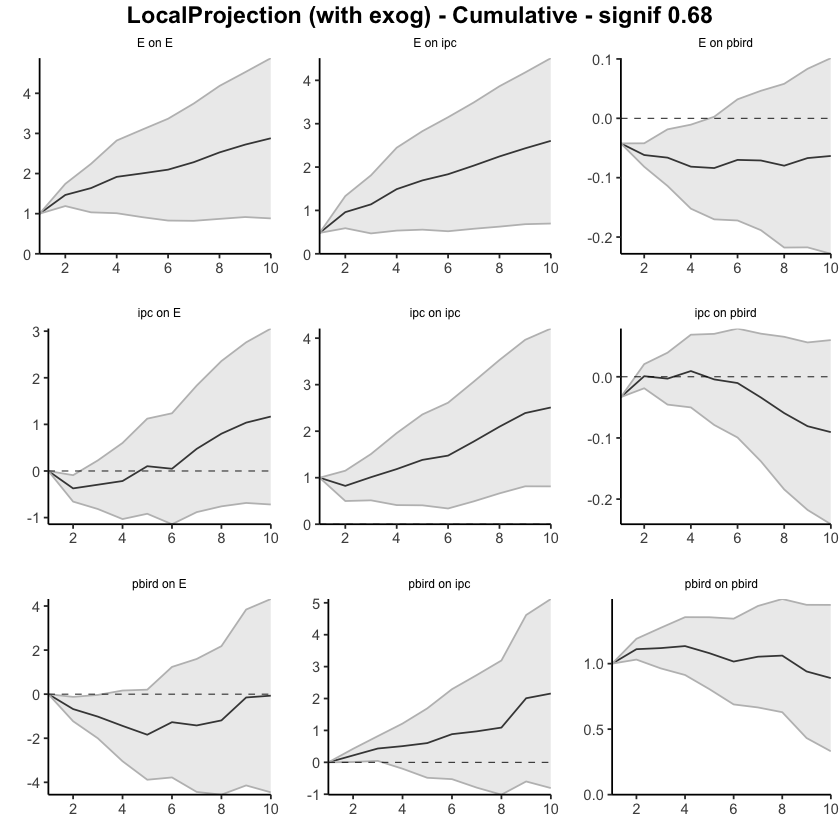

In [69]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.68, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            3        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   2   1   2   2   2   2   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   2   1   2   2   2   2   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   2   1   2   2   2   2   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

LocalProjection (with exog) - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.00000000 0.0000000  
24 ipc     E         2      -0.36937687 -0.92989828 0.1911445  
25 ipc     E         3       0.08324509 -0.38689569 0.5533859  
26 ipc     E         4       0.25988844 -0.24250132 0.7622782  
27 ipc     E         5       0.35023514 -0.06960372 0.7700740  
28 ipc     E         6      -0.05239621 -0.37697944 0.2721870  
29 ipc     E         7       0.26874037 -0.03893281 0.5764136  
30 ipc     E         8       0.34869859 -0.05452819 0.7519254  
31 ipc     E         9       0.24591059 -0.08583803 0.5776592  
32 ipc     E        10       0.13298013 -0.18027791 0.4462382  
33 ipc     E        11       0.35033905  0.04272354 0.6579546

impulse response horizon irf_value    lower_bound upper_bound
45 pbird   E         1       0.000000000  0.0000000  0.0000000  
46 pbird   E         2      -0.802248064 -1.9805672  0.3760711  
47 pbird   E         3      -0.479636743 -1.4323796  0.4731061  
48 pbird   E         4      -0.306990484 -1.1434362  0.5294552  
49 pbird   E         5      -0.357066693 -1.1912056  0.4770722  
50 pbird   E         6       0.536903329 -0.3401670  1.4139737  
51 pbird   E         7      -0.305173960 -1.3720174  0.7616694  
52 pbird   E         8       0.218122340 -0.4892684  0.9255131  
53 pbird   E         9       1.062289896 -0.2408584  2.3654381  
54 pbird   E        10      -0.006839691 -0.8759148  0.8622354  
55 pbird   E        11       0.210126382 -0.7240010  1.1442537

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4718639  0.47186394 0.4718639  
2  E       ipc       2      0.4616560 -0.28614764 1.2094596  
3  E       ipc       3      0.1722016 -0.40351105 0.7479142  
4  E       ipc       4      0.3751255 -0.22992517 0.9801762  
5  E       ipc       5      0.2328799 -0.09499944 0.5607592  
6  E       ipc       6      0.1475018 -0.19431396 0.4893176  
7  E       ipc       7      0.2117811 -0.04524600 0.4688082  
8  E       ipc       8      0.2525194 -0.06605172 0.5710905  
9  E       ipc       9      0.1961319 -0.06352663 0.4557905  
10 E       ipc      10      0.1870307 -0.10947961 0.4835410  
11 E       ipc      11      0.2022021 -0.12235427 0.5267585

impulse response horizon irf_value    lower_bound upper_bound
56 pbird   ipc       1       0.000000000  0.0000000  0.0000000  
57 pbird   ipc       2       0.187570625 -0.2340219  0.6091631  
58 pbird   ipc       3       0.150132258 -0.2379752  0.5382397  
59 pbird   ipc       4      -0.008229279 -0.6008857  0.5844271  
60 pbird   ipc       5       0.237737096 -0.4337320  0.9092062  
61 pbird   ipc       6       0.252383996 -0.2839904  0.7887584  
62 pbird   ipc       7      -0.017013226 -0.5402186  0.5061922  
63 pbird   ipc       8      -0.108366668 -0.8190577  0.6023244  
64 pbird   ipc       9       0.770782329 -0.1362534  1.6778181  
65 pbird   ipc      10       0.119559253 -0.6215662  0.8606847  
66 pbird   ipc      11      -0.057305509 -0.6566156  0.5420046

impulse response horizon irf_value    lower_bound upper_bound
12 E       pbird     1      -0.041465638 -0.04146564 -0.04146564
13 E       pbird     2      -0.019676550 -0.05890019  0.01954709
14 E       pbird     3      -0.004612215 -0.05826056  0.04903613
15 E       pbird     4      -0.025600544 -0.06737122  0.01617014
16 E       pbird     5      -0.004795537 -0.03480966  0.02521859
17 E       pbird     6       0.014350166 -0.01650671  0.04520704
18 E       pbird     7      -0.001643133 -0.03072345  0.02743719
19 E       pbird     8      -0.008362760 -0.04817808  0.03145256
20 E       pbird     9       0.012837617 -0.01107674  0.03675198
21 E       pbird    10       0.003457945 -0.02364530  0.03056119
22 E       pbird    11      -0.002949232 -0.03204305  0.02614458

impulse response horizon irf_value    lower_bound upper_bound 
34 ipc     pbird     1      -0.034436885 -0.03443688 -0.034436885
35 ipc     pbird     2       0.029120843 -0.01072267  0.068964358
36 ipc     pbird     3      -0.007142585 -0.05084940  0.036564234
37 ipc     pbird     4      -0.007829752 -0.04666669  0.031007185
38 ipc     pbird     5      -0.014116114 -0.04299518  0.014762955
39 ipc     pbird     6      -0.006995144 -0.03505059  0.021060304
40 ipc     pbird     7      -0.025851518 -0.05458183  0.002878794
41 ipc     pbird     8      -0.025638584 -0.06591927  0.014642106
42 ipc     pbird     9      -0.021464553 -0.04411550  0.001186396
43 ipc     pbird    10      -0.007956396 -0.03407084  0.018158049
44 ipc     pbird    11      -0.018891267 -0.04315090  0.005368365

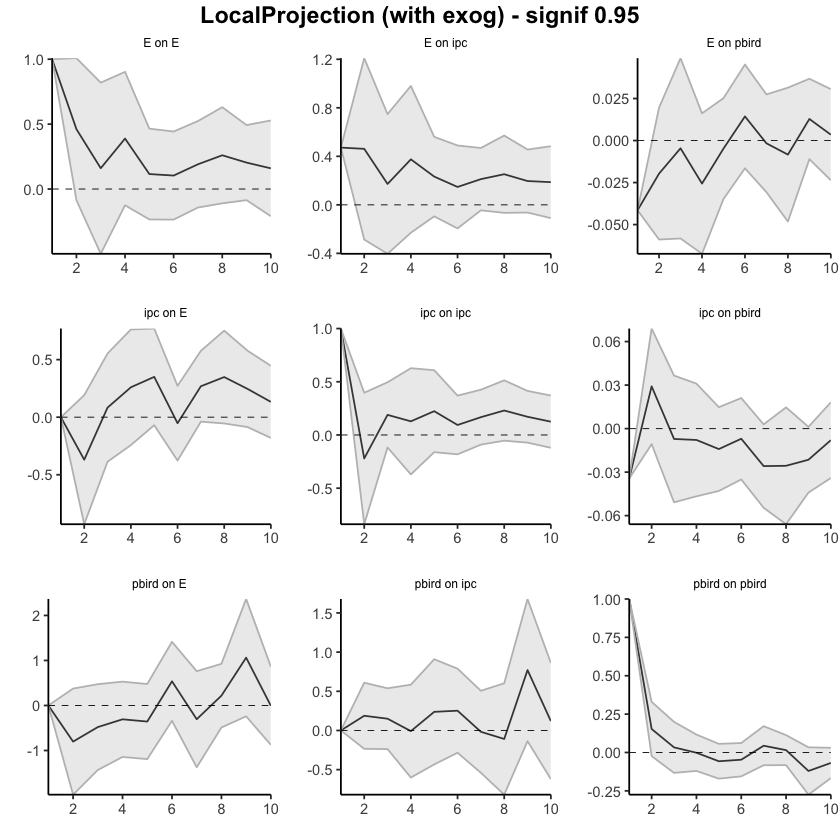

In [70]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.95)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            3        0     1          0.95    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   2   1   2   2   2   2   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   2   1   2   2   2   2   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   2   1   2   2   2   2   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.95

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000  0.0000000  
24 ipc     E         2      -0.36937687 -0.9298983  0.1911445  
25 ipc     E         3      -0.28613178 -1.3167940  0.7445304  
26 ipc     E         4      -0.02624334 -1.5592953  1.5068086  
27 ipc     E         5       0.32399180 -1.6288990  2.2768826  
28 ipc     E         6       0.27159559 -2.0058784  2.5490696  
29 ipc     E         7       0.54033596 -2.0448113  3.1254832  
30 ipc     E         8       0.88903456 -2.0993394  3.8774086  
31 ipc     E         9       1.13494515 -2.1851775  4.4550678  
32 ipc     E        10       1.26792527 -2.3654554  4.9013059  
33 ipc     E        11       1.61826433 -2.3227318  5.5592605

impulse response horizon irf_value  lower_bound upper_bound
45 pbird   E         1       0.0000000  0.000000   0.0000000  
46 pbird   E         2      -0.8022481 -1.980567   0.3760711  
47 pbird   E         3      -1.2818848 -3.412947   0.8491772  
48 pbird   E         4      -1.5888753 -4.556383   1.3786324  
49 pbird   E         5      -1.9459420 -5.747589   1.8557046  
50 pbird   E         6      -1.4090387 -6.087756   3.2696783  
51 pbird   E         7      -1.7142126 -7.459773   4.0313477  
52 pbird   E         8      -1.4960903 -7.949041   4.9568608  
53 pbird   E         9      -0.4338004 -8.189900   7.3222989  
54 pbird   E        10      -0.4406401 -9.065814   8.1845343  
55 pbird   E        11      -0.2305137 -9.789815   9.3287881

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4718639  0.4718639  0.4718639  
2  E       ipc       2      0.9335199  0.1857163  1.6813235  
3  E       ipc       3      1.1057215 -0.2177948  2.4292377  
4  E       ipc       4      1.4808470 -0.4477199  3.4094139  
5  E       ipc       5      1.7137269 -0.5427194  3.9701731  
6  E       ipc       6      1.8612287 -0.7370333  4.4594907  
7  E       ipc       7      2.0730098 -0.7822793  4.9282989  
8  E       ipc       8      2.3255292 -0.8483310  5.4993894  
9  E       ipc       9      2.5216611 -0.9118577  5.9551798  
10 E       ipc      10      2.7086918 -1.0213373  6.4387208  
11 E       ipc      11      2.9108939 -1.1436916  6.9654793

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.0000000  0.0000000  
57 pbird   ipc       2      0.1875706 -0.2340219  0.6091631  
58 pbird   ipc       3      0.3377029 -0.4719971  1.1474028  
59 pbird   ipc       4      0.3294736 -1.0728828  1.7318300  
60 pbird   ipc       5      0.5672107 -1.5066147  2.6410361  
61 pbird   ipc       6      0.8195947 -1.7906051  3.4297945  
62 pbird   ipc       7      0.8025815 -2.3308237  3.9359867  
63 pbird   ipc       8      0.6942148 -3.1498814  4.5383110  
64 pbird   ipc       9      1.4649971 -3.2861348  6.2161291  
65 pbird   ipc      10      1.5845564 -3.9077011  7.0768138  
66 pbird   ipc      11      1.5272509 -4.5643166  7.6188184

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04146564 -0.04146564 -0.04146564
13 E       pbird     2      -0.06114219 -0.10036583 -0.02191855
14 E       pbird     3      -0.06575440 -0.15862639  0.02711759
15 E       pbird     4      -0.09135495 -0.22599762  0.04328772
16 E       pbird     5      -0.09615048 -0.26080728  0.06850631
17 E       pbird     6      -0.08180032 -0.27731399  0.11371335
18 E       pbird     7      -0.08344345 -0.30803744  0.14115054
19 E       pbird     8      -0.09180621 -0.35621552  0.17260310
20 E       pbird     9      -0.07896859 -0.36729226  0.20935508
21 E       pbird    10      -0.07551065 -0.39093757  0.23991627
22 E       pbird    11      -0.07845988 -0.42298061  0.26606085

impulse response horizon irf_value    lower_bound upper_bound
34 ipc     pbird     1      -0.034436885 -0.03443688 -0.03443688
35 ipc     pbird     2      -0.005316042 -0.04515956  0.03452747
36 ipc     pbird     3      -0.012458627 -0.09600896  0.07109171
37 ipc     pbird     4      -0.020288379 -0.14267565  0.10209889
38 ipc     pbird     5      -0.034404492 -0.18567083  0.11686185
39 ipc     pbird     6      -0.041399636 -0.22072142  0.13792215
40 ipc     pbird     7      -0.067251154 -0.27530326  0.14080095
41 ipc     pbird     8      -0.092889738 -0.34122253  0.15544305
42 ipc     pbird     9      -0.114354291 -0.38533803  0.15662945
43 ipc     pbird    10      -0.122310688 -0.41940887  0.17478750
44 ipc     pbird    11      -0.141201955 -0.46255977  0.18015586

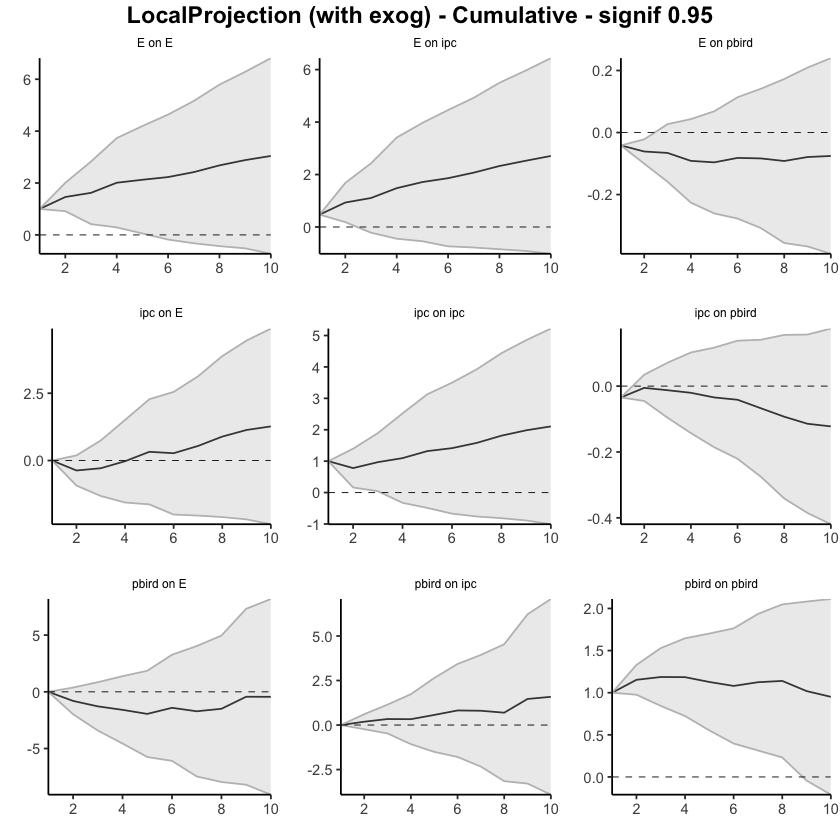

In [71]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.95, cumulative=TRUE)

Run configurations:

lags_endog_lin lags_criterion max_lags trend shock_type confint hor use_nw
1 NA             AIC            3        0     1          0.68    10  TRUE  
  nw_prewhite nw_lag adjust_se use_twosls model_type starts ends column_names 
1 TRUE        10     FALSE     FALSE      0          1      259  E, ipc, pbird
  endog
1 3

Lags for Shock: E

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   2   1   2   2   2   2   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

Lags for Shock: ipc

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   2   1   2   2   2   2   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

Lags for Shock: pbird

Variable H_1 H_2 H_3 H_4 H_5 H_6 H_7 H_8 H_9 H_10
1 E        2   2   3   1   2   2   1   1   2   1   
2 ipc      3   2   2   1   2   2   2   2   2   2   
3 pbird    1   1   3   2   1   1   2   1   1   1

LocalProjection (with exog) - Cumulative - signif 0.68

impulse response horizon irf_value   lower_bound upper_bound
23 ipc     E         1       0.00000000  0.0000000   0.00000000
24 ipc     E         2      -0.36937687 -0.6553572  -0.08339656
25 ipc     E         3      -0.28613178 -0.8119798   0.23971627
26 ipc     E         4      -0.02624334 -0.8084127   0.75592601
27 ipc     E         5       0.32399180 -0.6723811   1.32036466
28 ipc     E         6       0.27159559 -0.8903810   1.43357214
29 ipc     E         7       0.54033596 -0.7786167   1.85928863
30 ipc     E         8       0.88903456 -0.6356461   2.41371517
31 ipc     E         9       1.13494515 -0.5589950   2.82888526
32 ipc     E        10       1.26792527 -0.5858404   3.12169091
33 ipc     E        11       1.61826433 -0.3924480   3.62897666

impulse response horizon irf_value  lower_bound upper_bound 
45 pbird   E         1       0.0000000  0.000000    0.000000000
46 pbird   E         2      -0.8022481 -1.403431   -0.201064834
47 pbird   E         3      -1.2818848 -2.369161   -0.194608271
48 pbird   E         4      -1.5888753 -3.102910   -0.074840738
49 pbird   E         5      -1.9459420 -3.885558   -0.006326371
50 pbird   E         6      -1.4090387 -3.796139    0.978061834
51 pbird   E         7      -1.7142126 -4.645621    1.217195734
52 pbird   E         8      -1.4960903 -4.788412    1.796231704
53 pbird   E         9      -0.4338004 -4.390994    3.523393155
54 pbird   E        10      -0.4406401 -4.841239    3.959959120
55 pbird   E        11      -0.2305137 -5.107708    4.646681092

impulse response horizon irf_value lower_bound upper_bound
1  E       ipc       1      0.4718639 0.4718639   0.4718639  
2  E       ipc       2      0.9335199 0.5519874   1.3150524  
3  E       ipc       3      1.1057215 0.4304581   1.7809848  
4  E       ipc       4      1.4808470 0.4968843   2.4648097  
5  E       ipc       5      1.7137269 0.5624788   2.8649749  
6  E       ipc       6      1.8612287 0.5355848   3.1868726  
7  E       ipc       7      2.0730098 0.6162296   3.5297899  
8  E       ipc       8      2.3255292 0.7062127   3.9448456  
9  E       ipc       9      2.5216611 0.7698658   4.2734564  
10 E       ipc      10      2.7086918 0.8056157   4.6117678  
11 E       ipc      11      2.9108939 0.8422278   4.9795599

impulse response horizon irf_value lower_bound upper_bound
56 pbird   ipc       1      0.0000000  0.00000000 0.0000000  
57 pbird   ipc       2      0.1875706 -0.02752758 0.4026688  
58 pbird   ipc       3      0.3377029 -0.07540935 0.7508151  
59 pbird   ipc       4      0.3294736 -0.38601433 1.0449615  
60 pbird   ipc       5      0.5672107 -0.49086350 1.6252849  
61 pbird   ipc       6      0.8195947 -0.51213991 2.1513293  
62 pbird   ipc       7      0.8025815 -0.79609465 2.4012576  
63 pbird   ipc       8      0.6942148 -1.26705878 2.6554884  
64 pbird   ipc       9      1.4649971 -0.95904980 3.8890441  
65 pbird   ipc      10      1.5845564 -1.21761579 4.3867286  
66 pbird   ipc      11      1.5272509 -1.58069174 4.6351935

impulse response horizon irf_value   lower_bound upper_bound
12 E       pbird     1      -0.04146564 -0.04146564 -0.04146564
13 E       pbird     2      -0.06114219 -0.08115425 -0.04113013
14 E       pbird     3      -0.06575440 -0.11313807 -0.01837073
15 E       pbird     4      -0.09135495 -0.16005019 -0.02265971
16 E       pbird     5      -0.09615048 -0.18015905 -0.01214191
17 E       pbird     6      -0.08180032 -0.18155219  0.01795156
18 E       pbird     7      -0.08344345 -0.19803222  0.03114532
19 E       pbird     8      -0.09180621 -0.22670892  0.04309650
20 E       pbird     9      -0.07896859 -0.22607251  0.06813532
21 E       pbird    10      -0.07551065 -0.23644275  0.08542145
22 E       pbird    11      -0.07845988 -0.25423576  0.09731600

impulse response horizon irf_value    lower_bound upper_bound
34 ipc     pbird     1      -0.034436885 -0.03443688 -0.03443688
35 ipc     pbird     2      -0.005316042 -0.02564437  0.01501228
36 ipc     pbird     3      -0.012458627 -0.05508635  0.03016909
37 ipc     pbird     4      -0.020288379 -0.08273086  0.04215411
38 ipc     pbird     5      -0.034404492 -0.11158120  0.04277221
39 ipc     pbird     6      -0.041399636 -0.13289034  0.05009107
40 ipc     pbird     7      -0.067251154 -0.17340019  0.03889788
41 ipc     pbird     8      -0.092889738 -0.21959014  0.03381067
42 ipc     pbird     9      -0.114354291 -0.25261130  0.02390272
43 ipc     pbird    10      -0.122310688 -0.27389139  0.02927002
44 ipc     pbird    11      -0.141201955 -0.30516002  0.02275612

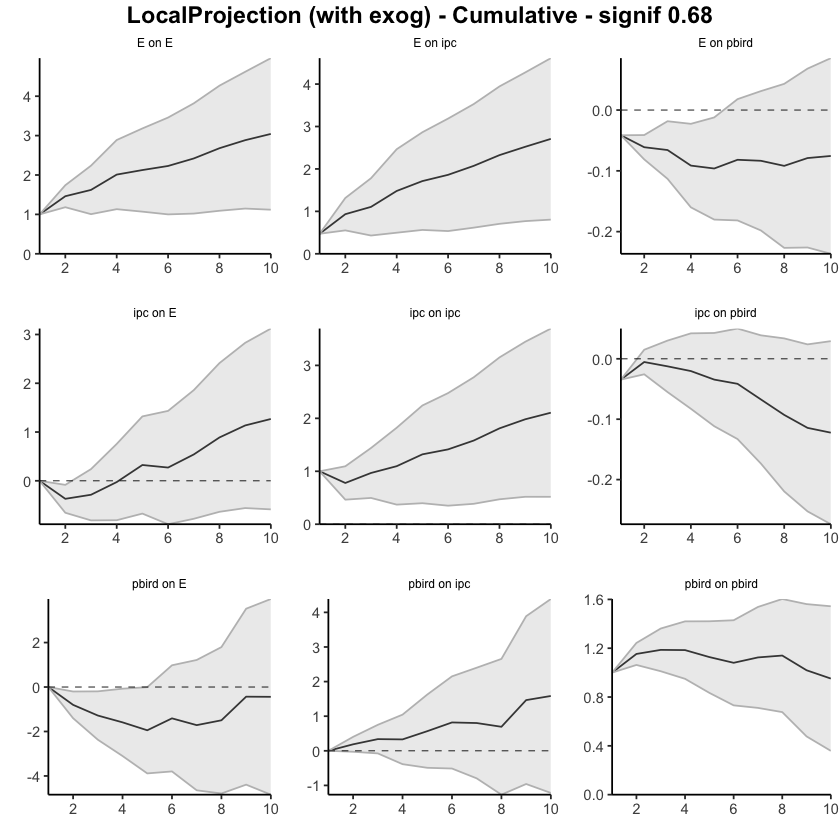

In [72]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.68, cumulative=TRUE)